In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from trace_process import *

In [21]:
MTU = 1514
MB = 1024 * 1024
KB = 1024
GB = 1024 * 1024 * 1024
SECONDS = 1e9
MILLI_SECONDS = 1e6
MICRO_SECONDS = 1e3
NANO_SECONDS = 1
IPS = [237, 212, 144]
SPARK_MASTER = 237
TARGET_IP = 229

PACKETS = "../data/36/node-3/train/packets"
ALLOCS = "../data/23/node-2/train/allocations"
READS = "../data/23/node-2/train/disk_read"


In [3]:
def get_packets(file_path, timefactor=SECONDS, volumefactor=KB):
    df = pd.read_csv(
        file_path, 
        header=None,
        index_col=False,
        names=['timestamp', 'size', 'src_ip', 'dest_ip', 'src_port', 'dest_port', 'dir'], 
        dtype={"dir": "int8"},
    )
    # df = df[df['dir'] == 1]
    df['timestamp'] = (df['timestamp'] - df['timestamp'].min()) / timefactor
    df['size'] = df['size'] / volumefactor
    df = df.sort_values(by='timestamp')
    return df

In [11]:
def get_trace(file_path, timefactor=SECONDS, volumefactor=KB):
    df = pd.read_csv(
        file_path, 
        header=None,
        index_col=False,
        names=['timestamp', 'size'],
        sep='\t'
    )
    df['timestamp'] = (df['timestamp'] - df['timestamp'].min()) / timefactor
    df['size'] = df['size'] / volumefactor
    df = df.sort_values(by='timestamp')
    return df

In [4]:
df = get_packets(PACKETS, volumefactor=KB, timefactor=MILLI_SECONDS)

In [5]:
df = df[(df['src_ip'] == TARGET_IP) | (df['dest_ip'] == TARGET_IP)]
df = df[(df['src_ip'].isin(IPS)) | (df['dest_ip'].isin(IPS))]

In [46]:
l = list(set([(a[0], a[1], a[2], a[3]) for a in df[['src_ip', 'dest_ip', 'src_port', 'dest_port']].values]))
l = reversed(l)

In [6]:
RES = 50
TIMERES = 'Milliseconds'
TIMERESL = 'm'

229 212 7074 42638
237 229 7073 55752
229 144 60866 7074
229 144 42724 7074
237 229 7073 36776
229 237 55738 7073
229 237 44430 7073
144 229 40428 7075
212 229 59666 7074
229 237 41458 7074
212 229 60736 7074
237 229 7074 38060
144 229 7074 58634
237 229 7073 55766
144 229 7074 46730
229 237 44400 7073
229 144 7075 49868
229 212 44496 7074
229 212 49512 7074
229 237 44398 7073
229 237 52352 7074


/tmp/ipykernel_1049598/3350972554.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(50, 10))


144 229 7074 59258
144 229 7074 58648
144 229 48286 7074
144 229 7074 33866
237 229 7077 54450
229 212 7074 43386
229 237 54450 7077
212 229 42640 7074
229 144 33866 7074
229 237 38060 7074
229 144 7075 40428
229 212 50656 7074
212 229 42638 7074
229 237 42020 7074
229 144 7074 52850
229 144 7074 40198
212 229 43376 7074
212 229 7074 44496
144 229 52850 7074
229 144 58634 7074
212 229 7074 50656
229 144 7074 49748
237 229 7073 44400
212 229 54284 7075
229 144 46730 7074
212 229 45426 7074
237 229 7073 44416
144 229 7074 39700
237 229 7073 44398
237 229 7074 42020
229 237 55752 7073
144 229 7074 42724
144 229 7074 58018
229 237 36778 7073
229 212 7075 54284
237 229 7073 44414
229 144 7074 48286
229 237 36776 7073
229 212 7074 45426
229 212 7075 39854
229 144 7074 53424
212 229 39854 7075
229 237 44416 7073
237 229 7073 44430
237 229 7074 52352
229 237 44414 7073
229 212 7074 60736
144 229 7074 60866
229 144 39700 7074
229 144 58648 7074
237 229 7074 41458
229 144 7074 32878
144 229 4986

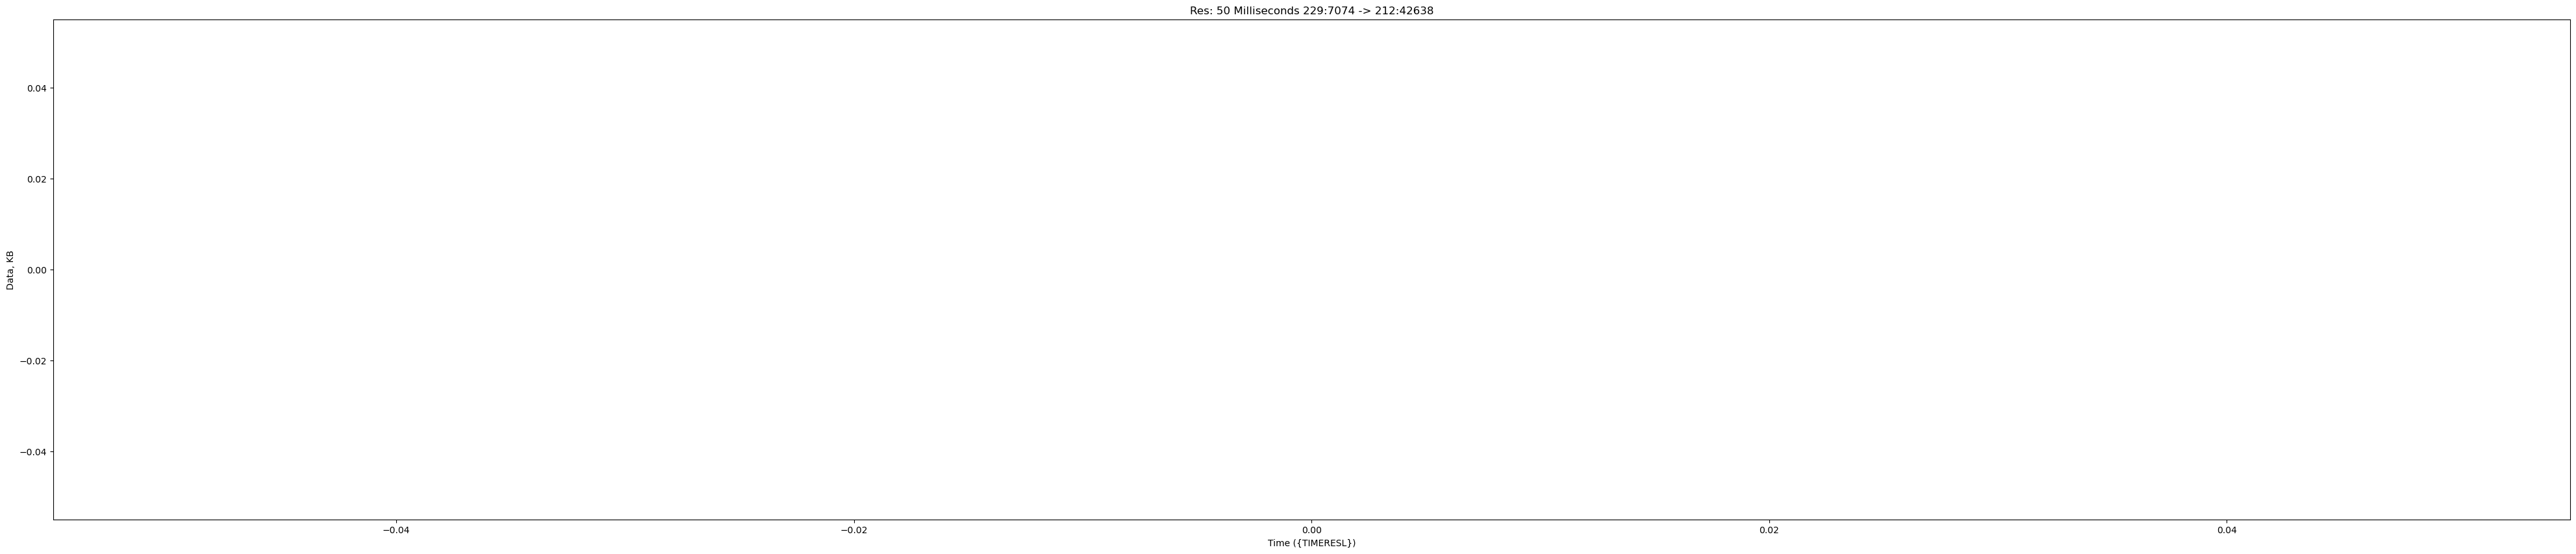

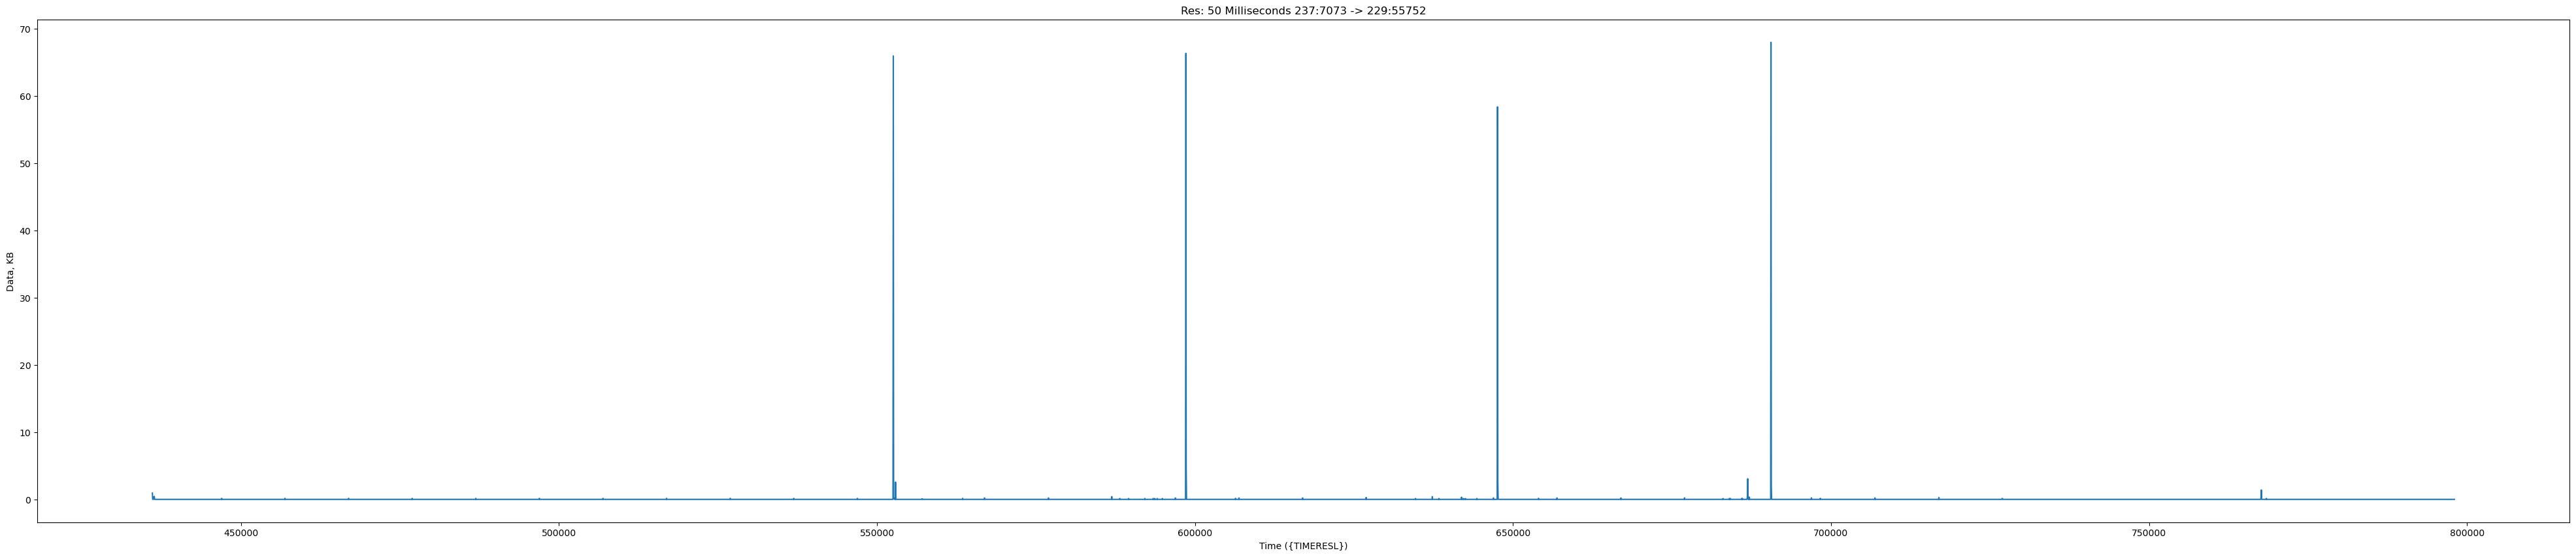

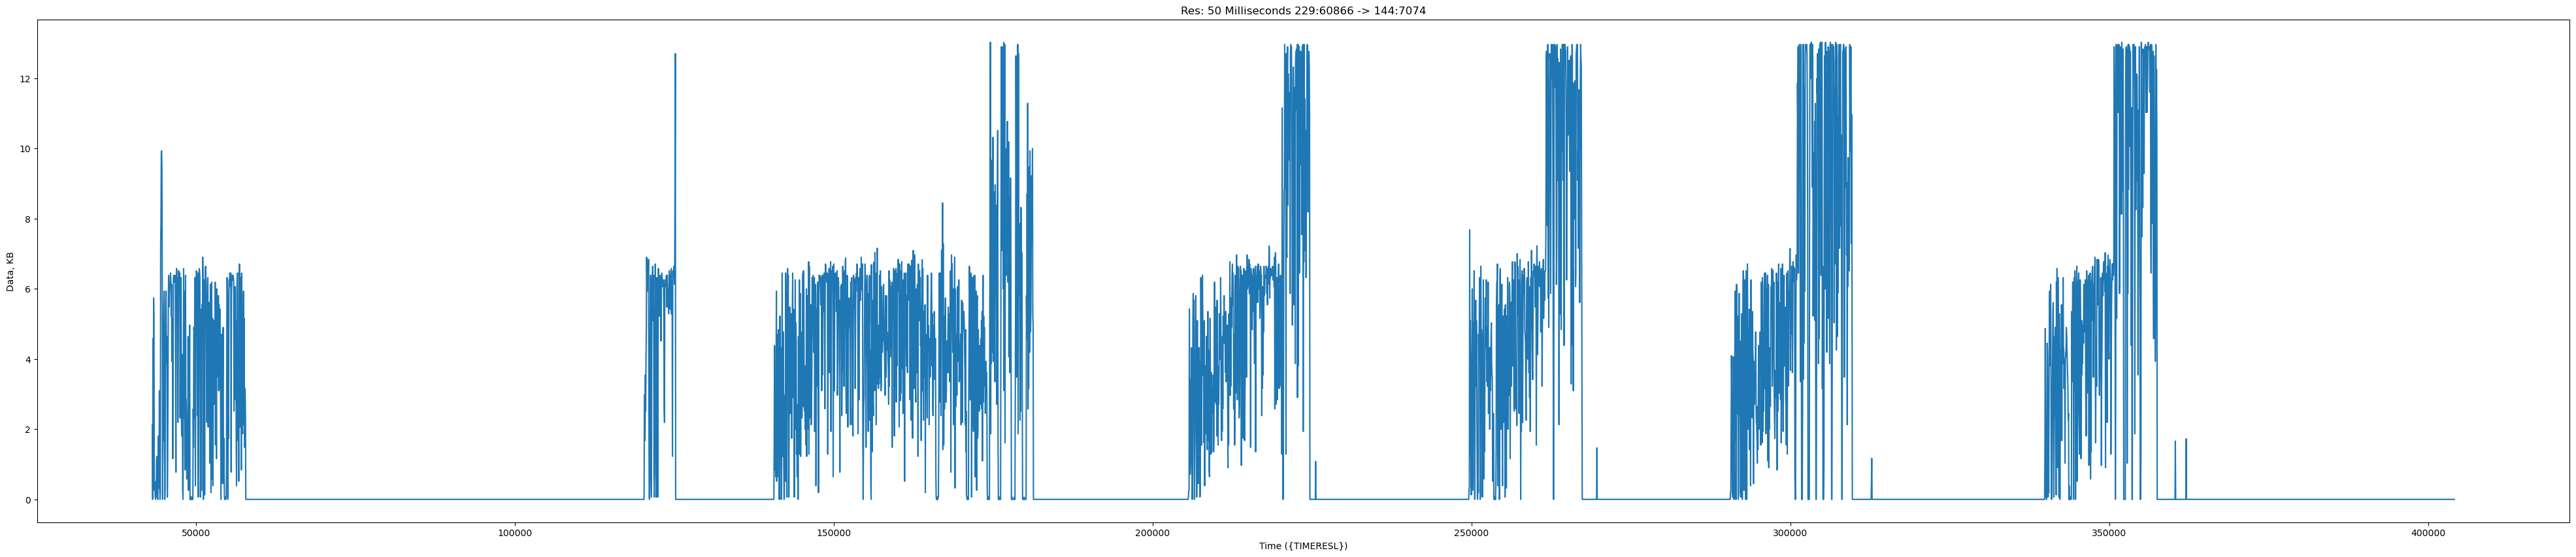

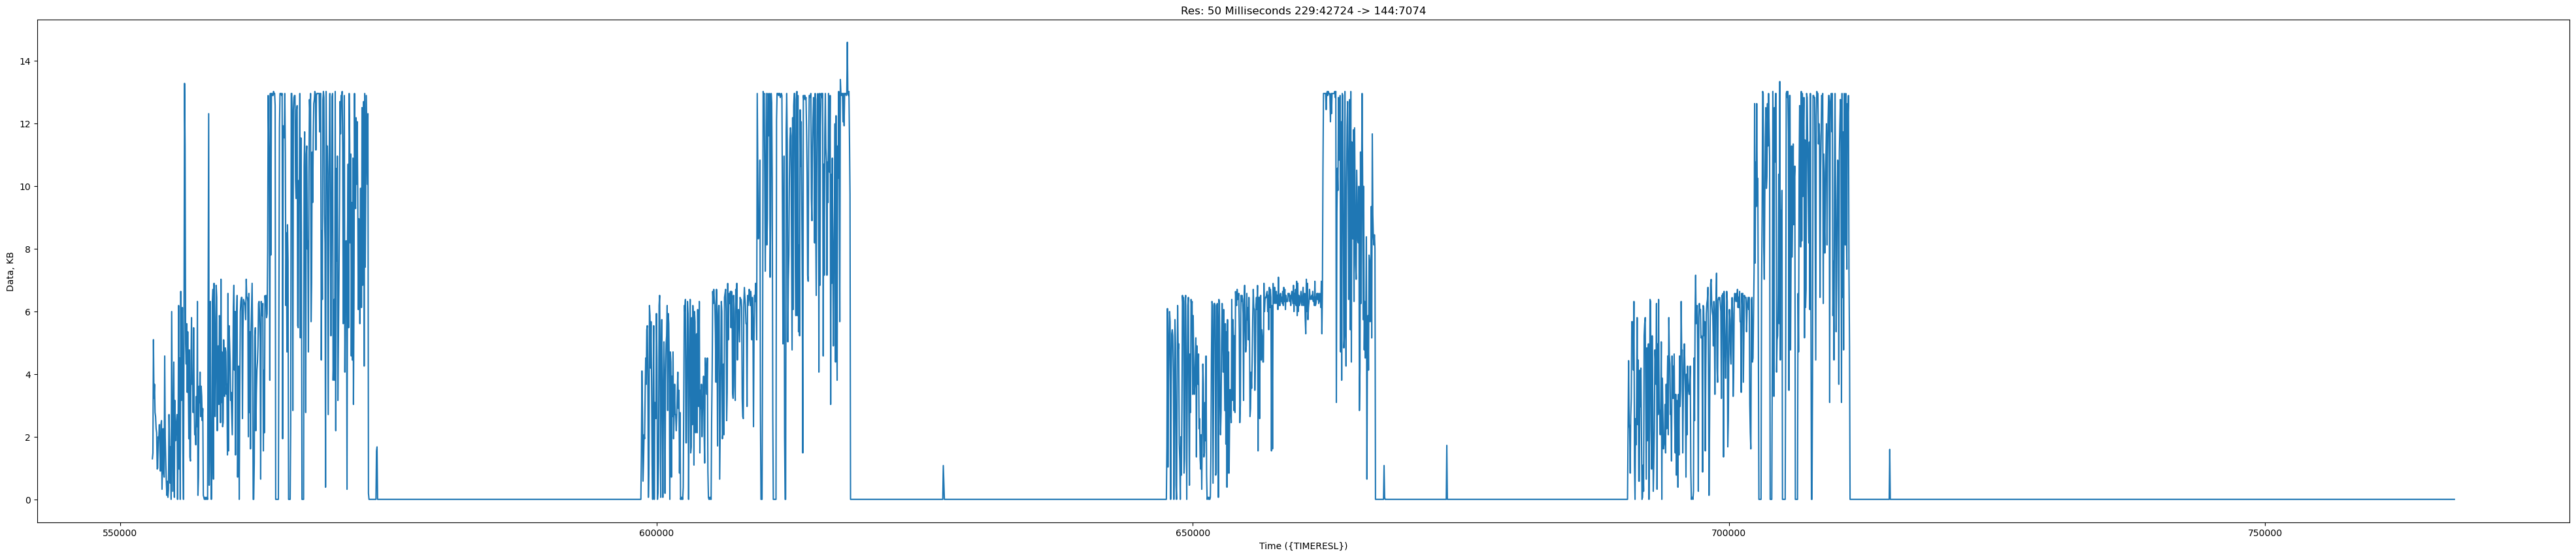

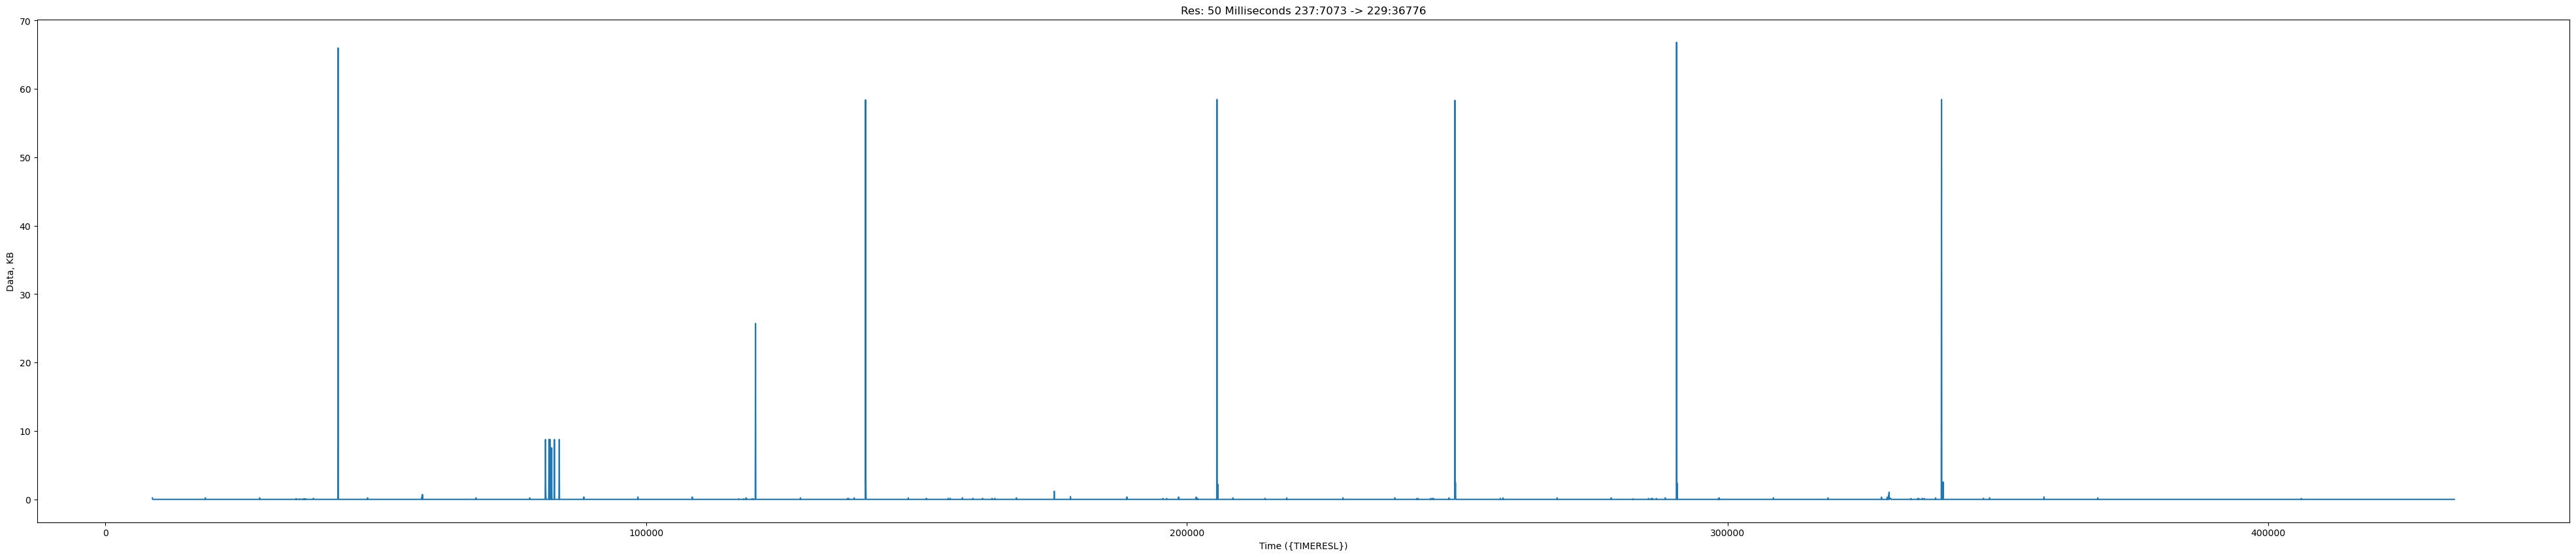

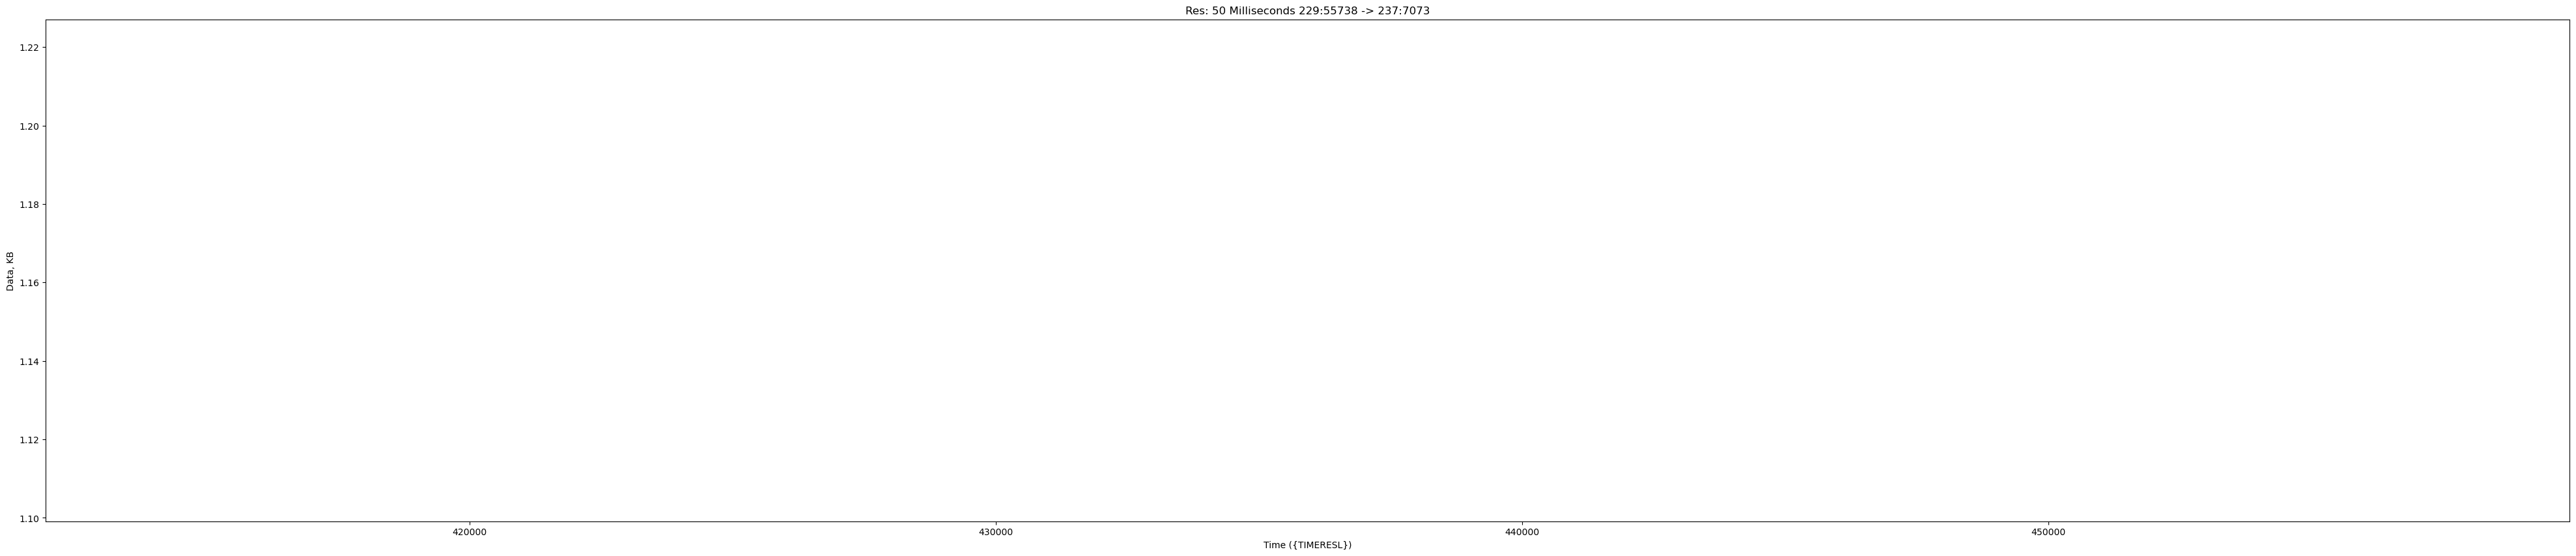

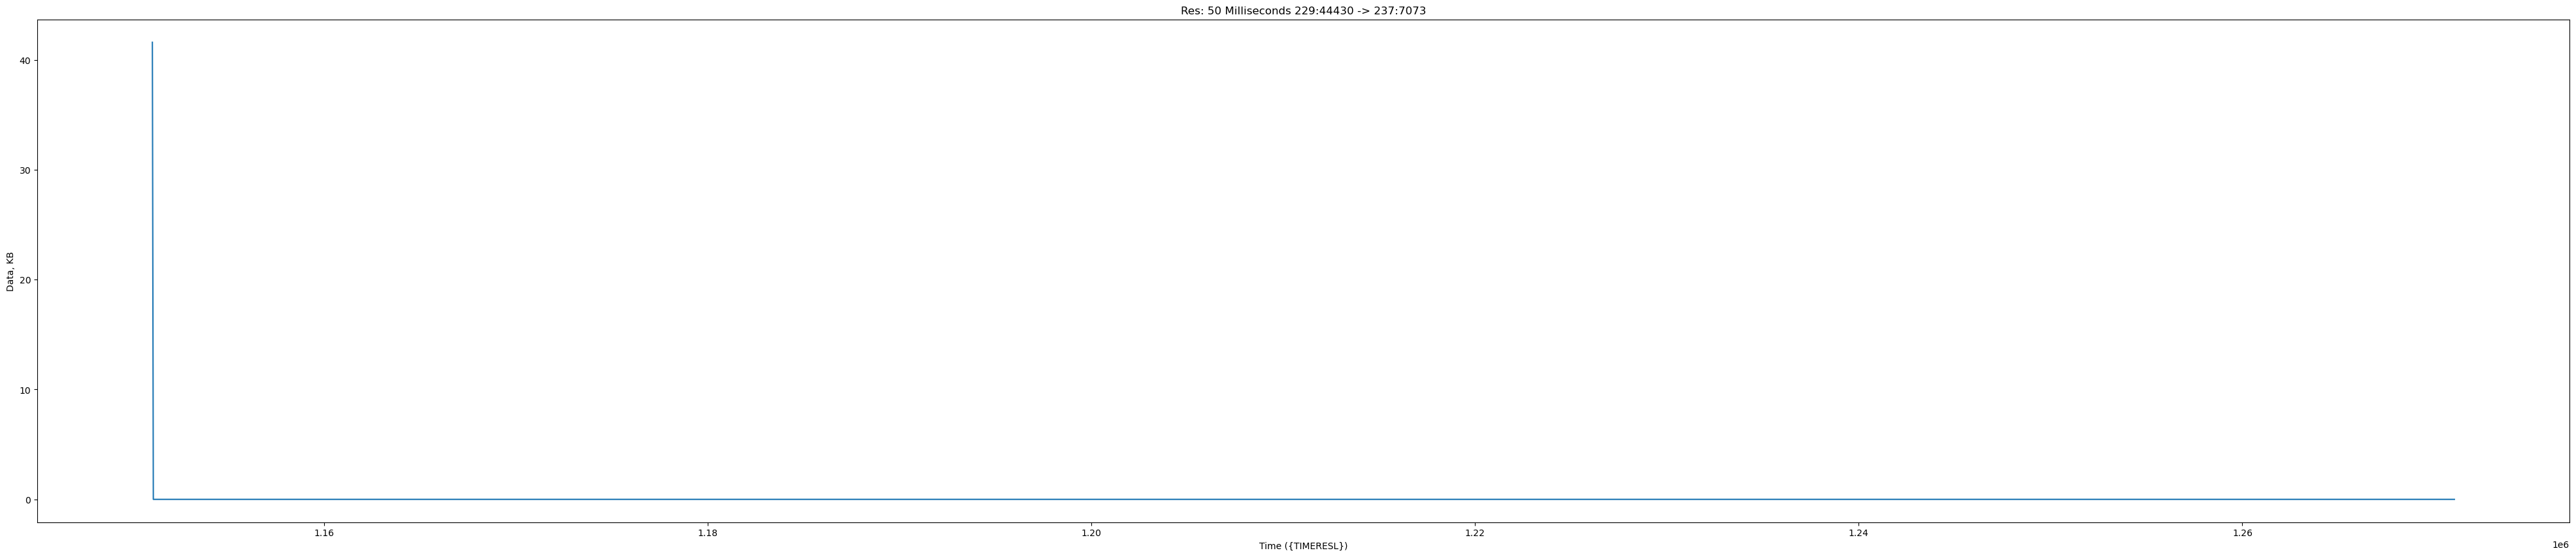

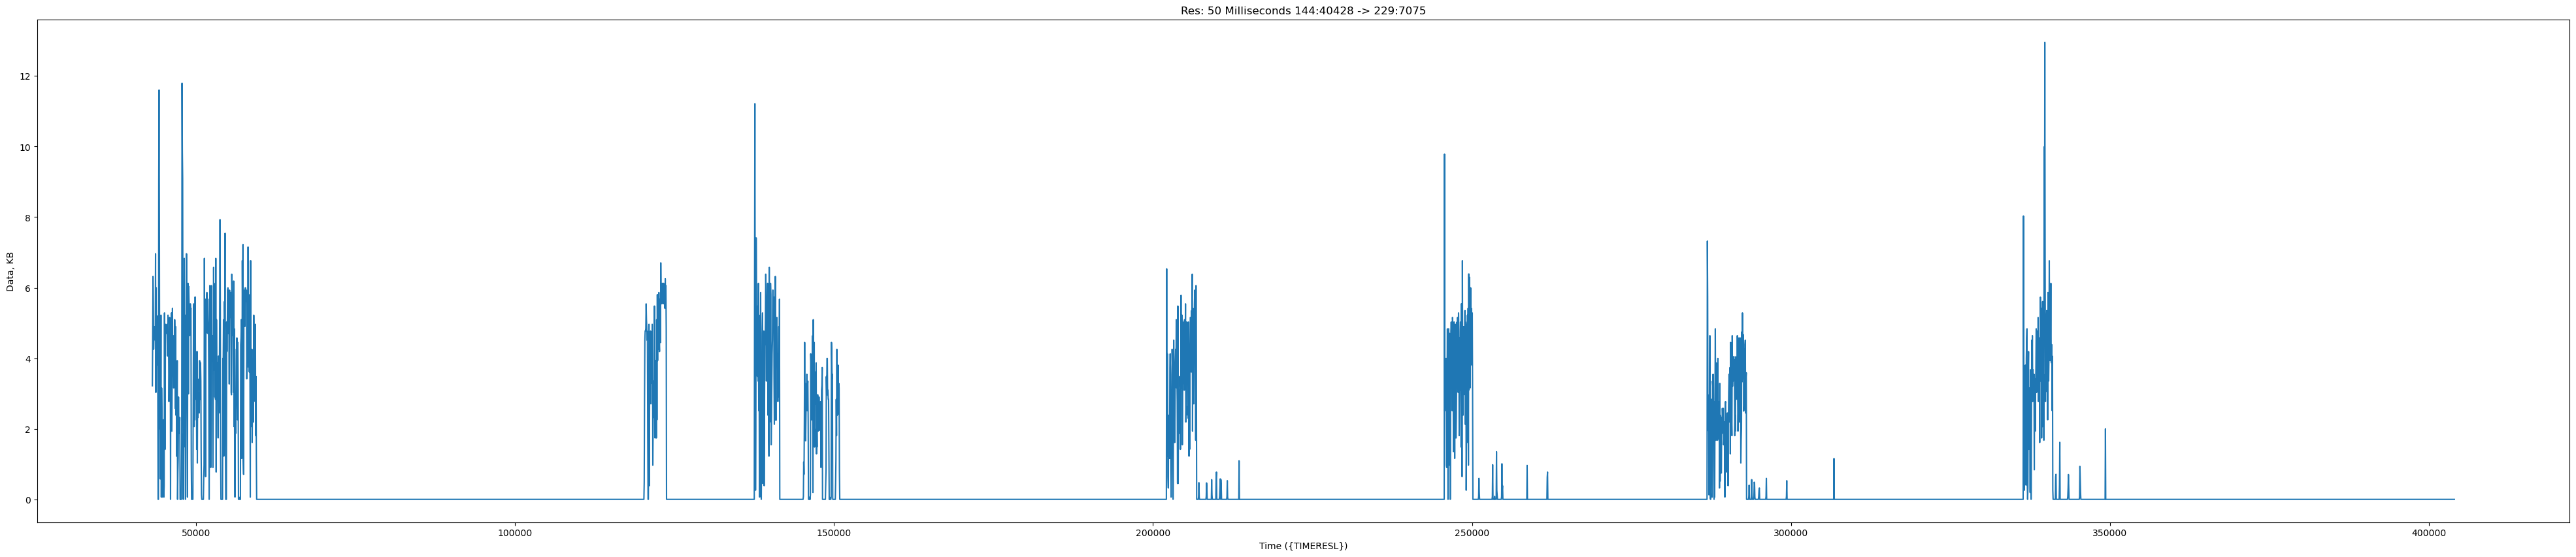

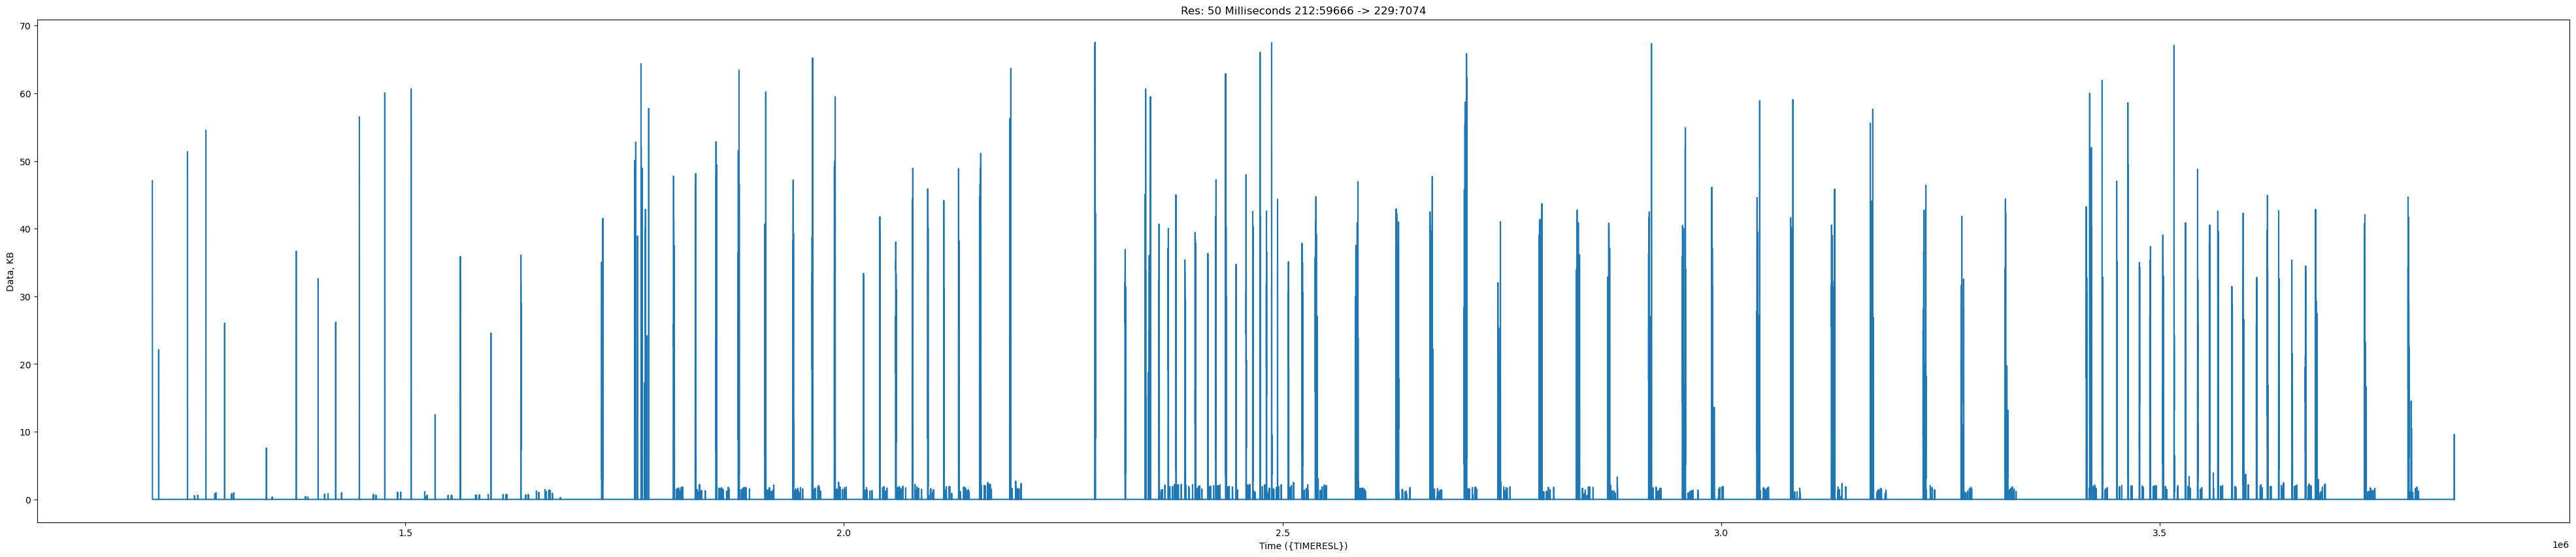

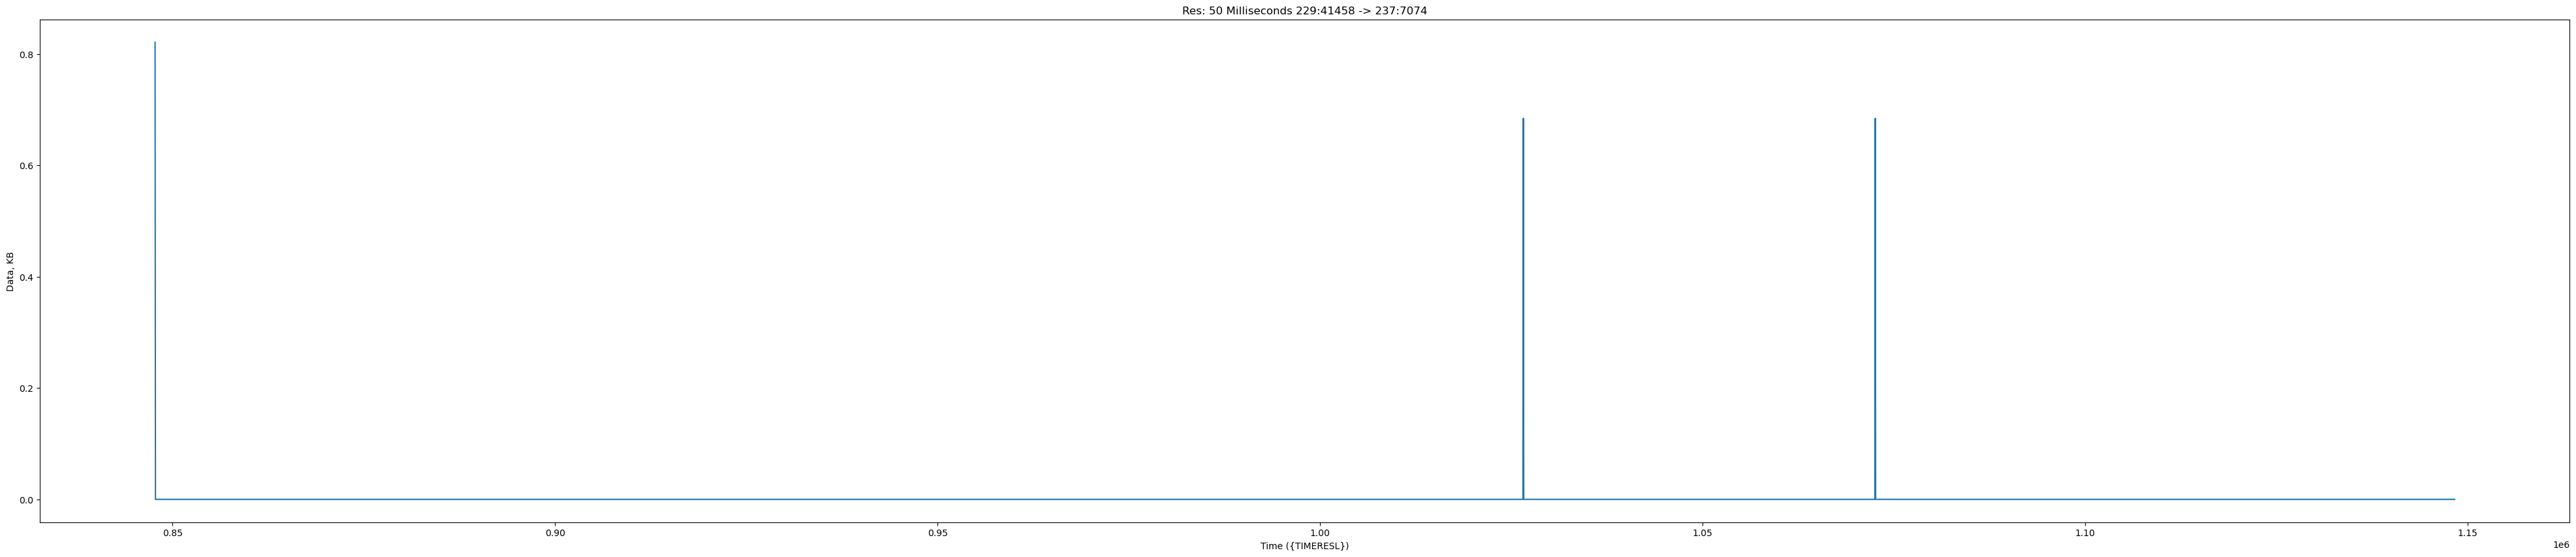

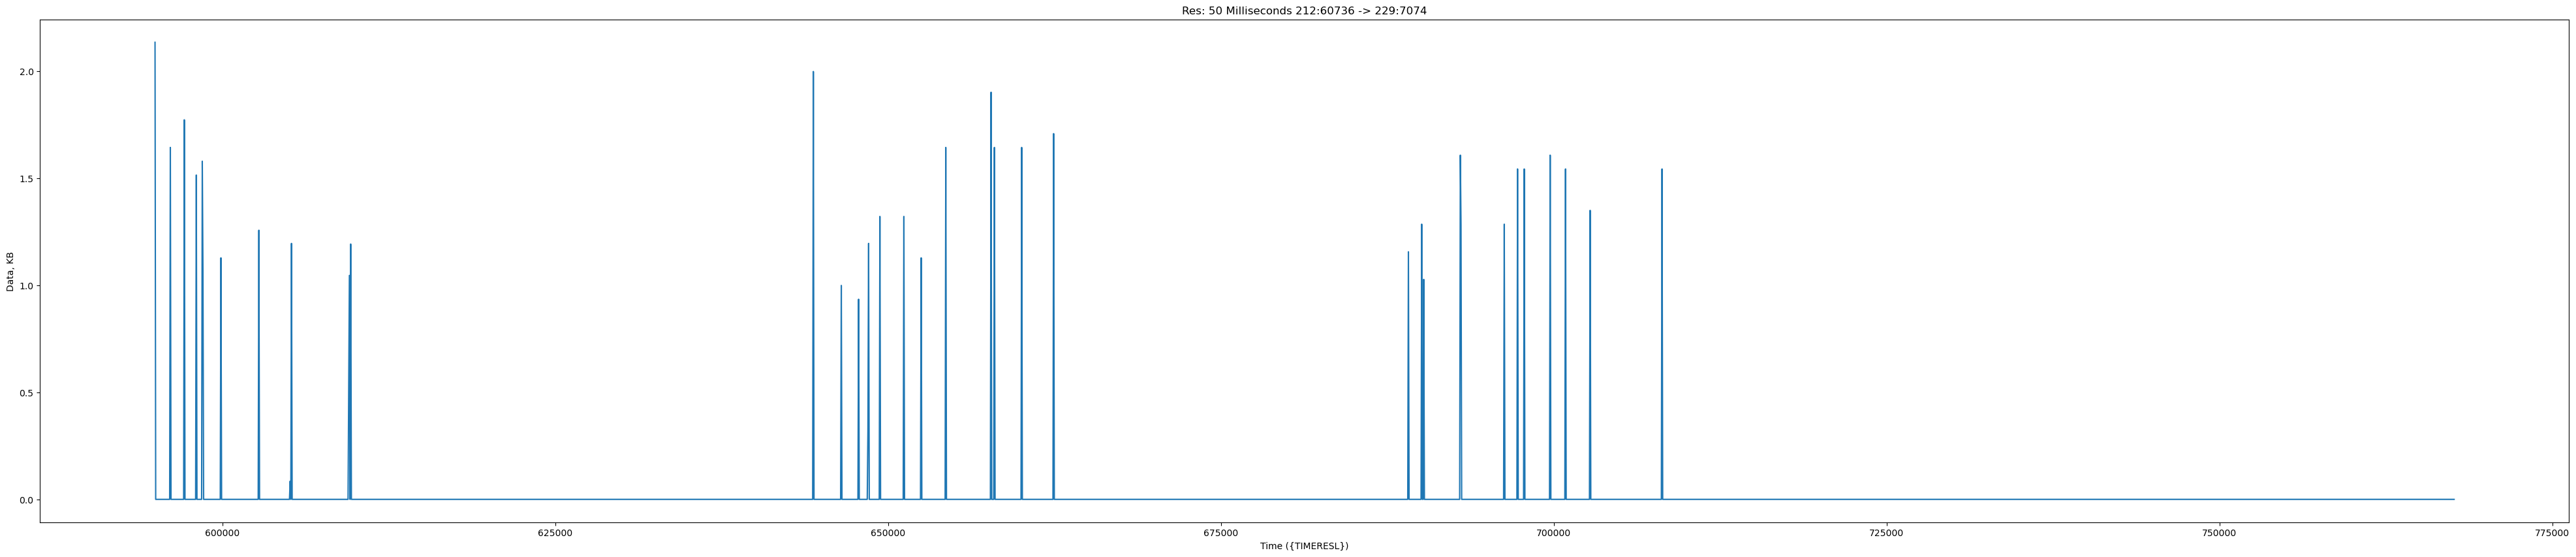

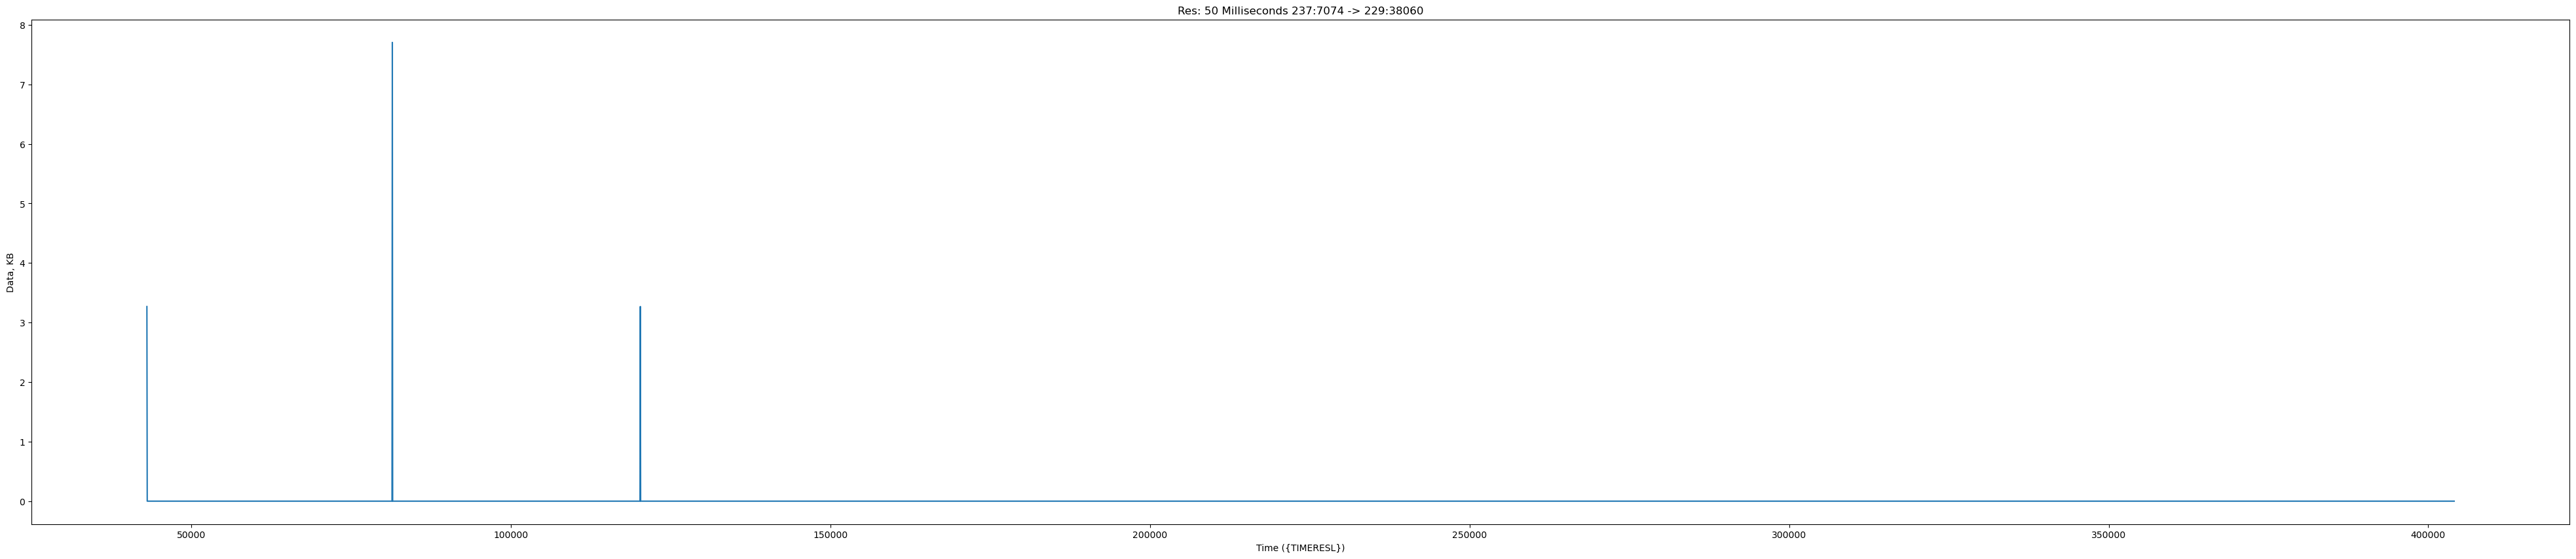

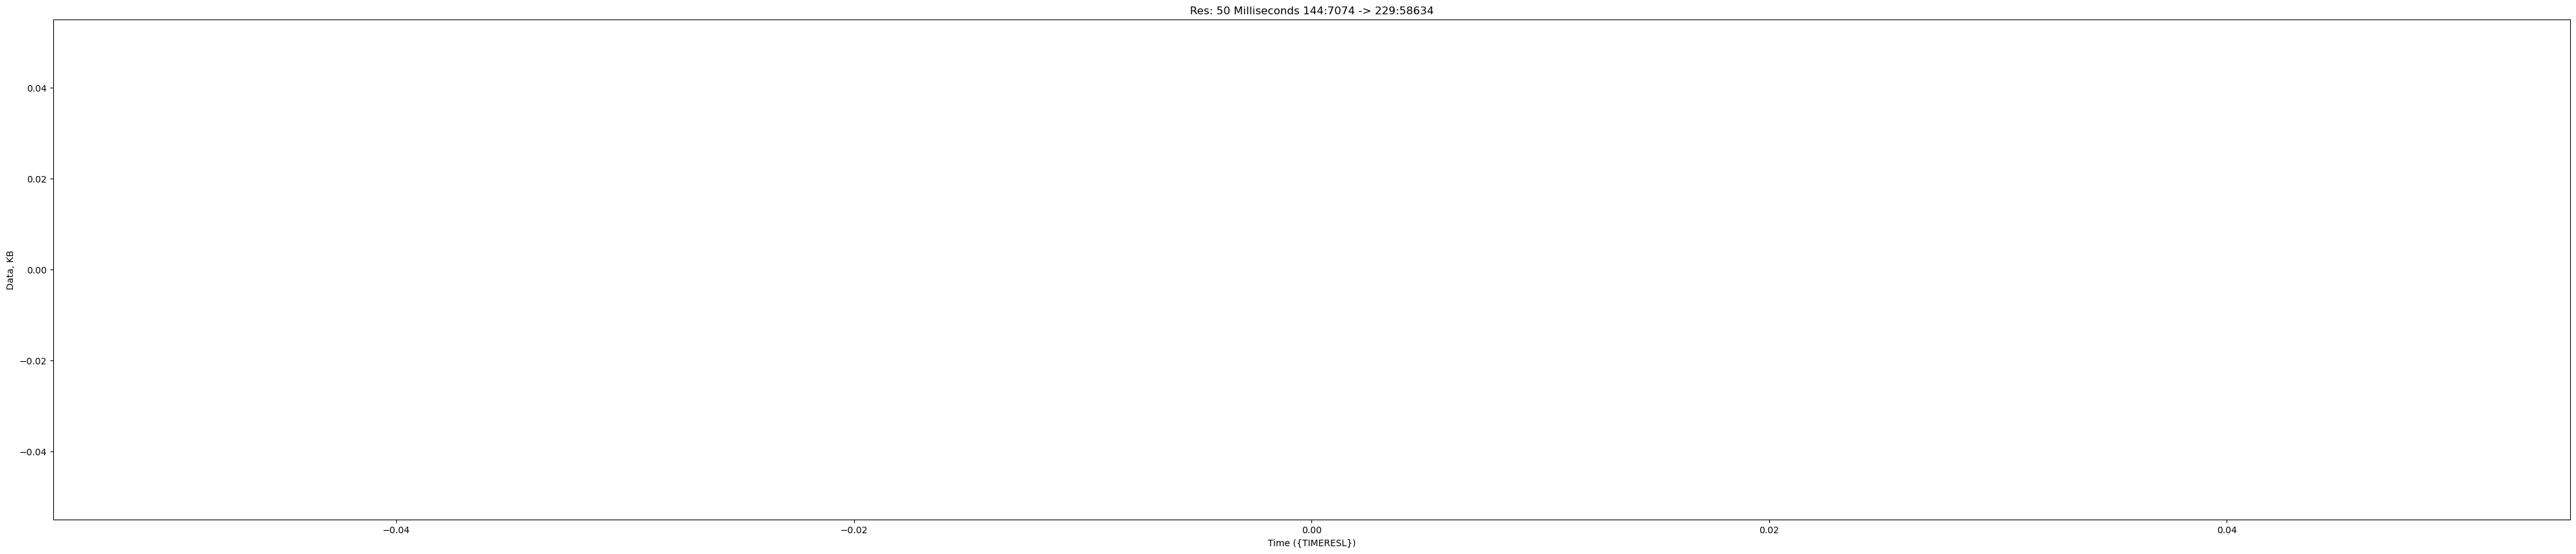

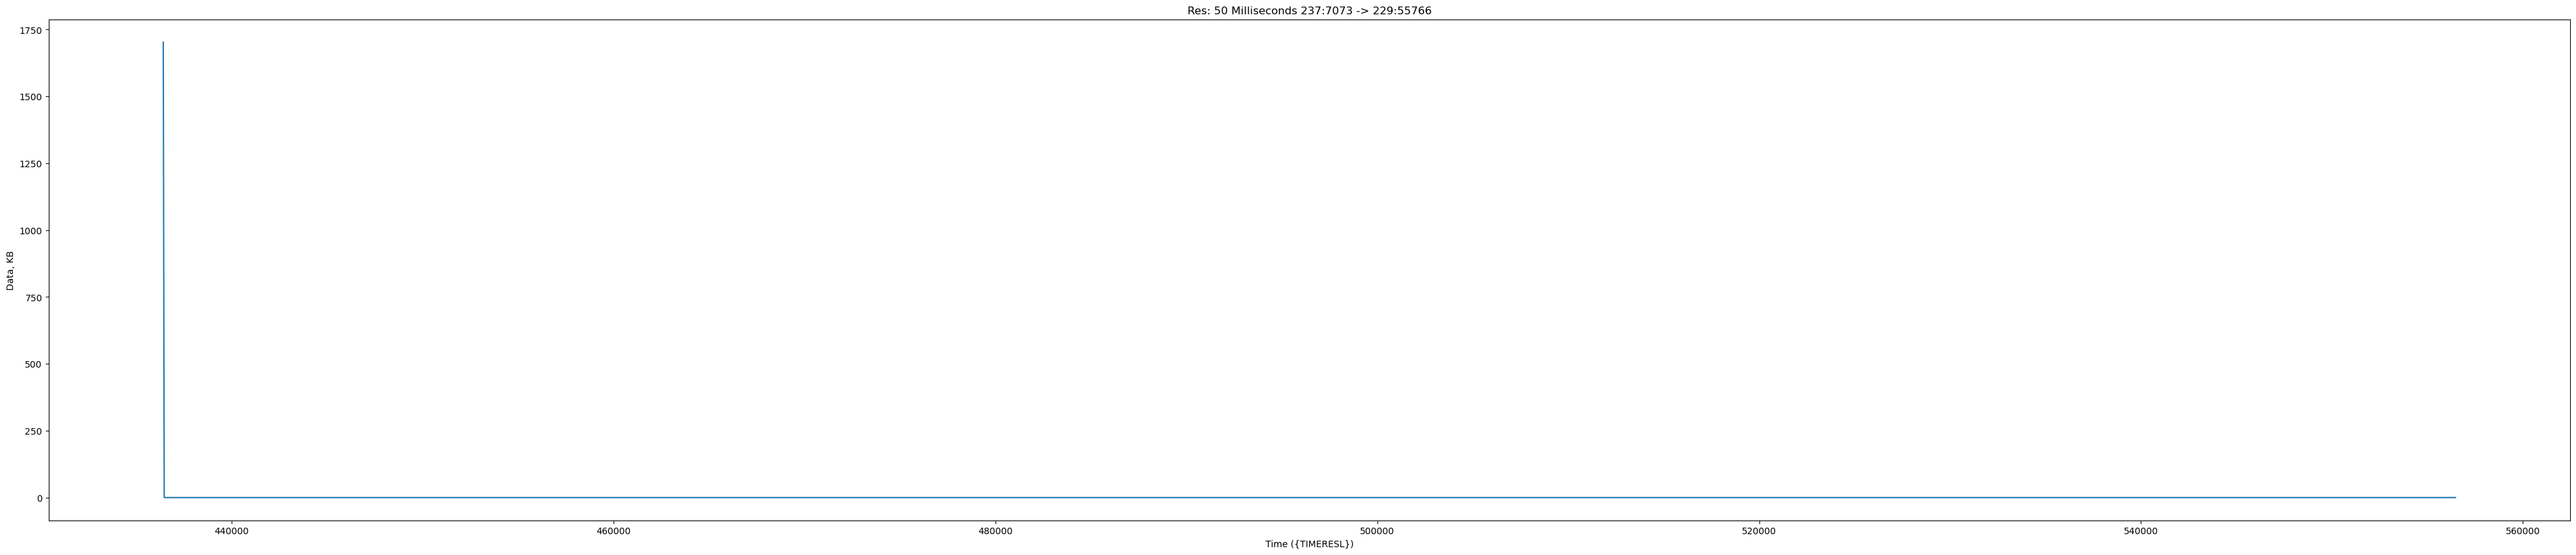

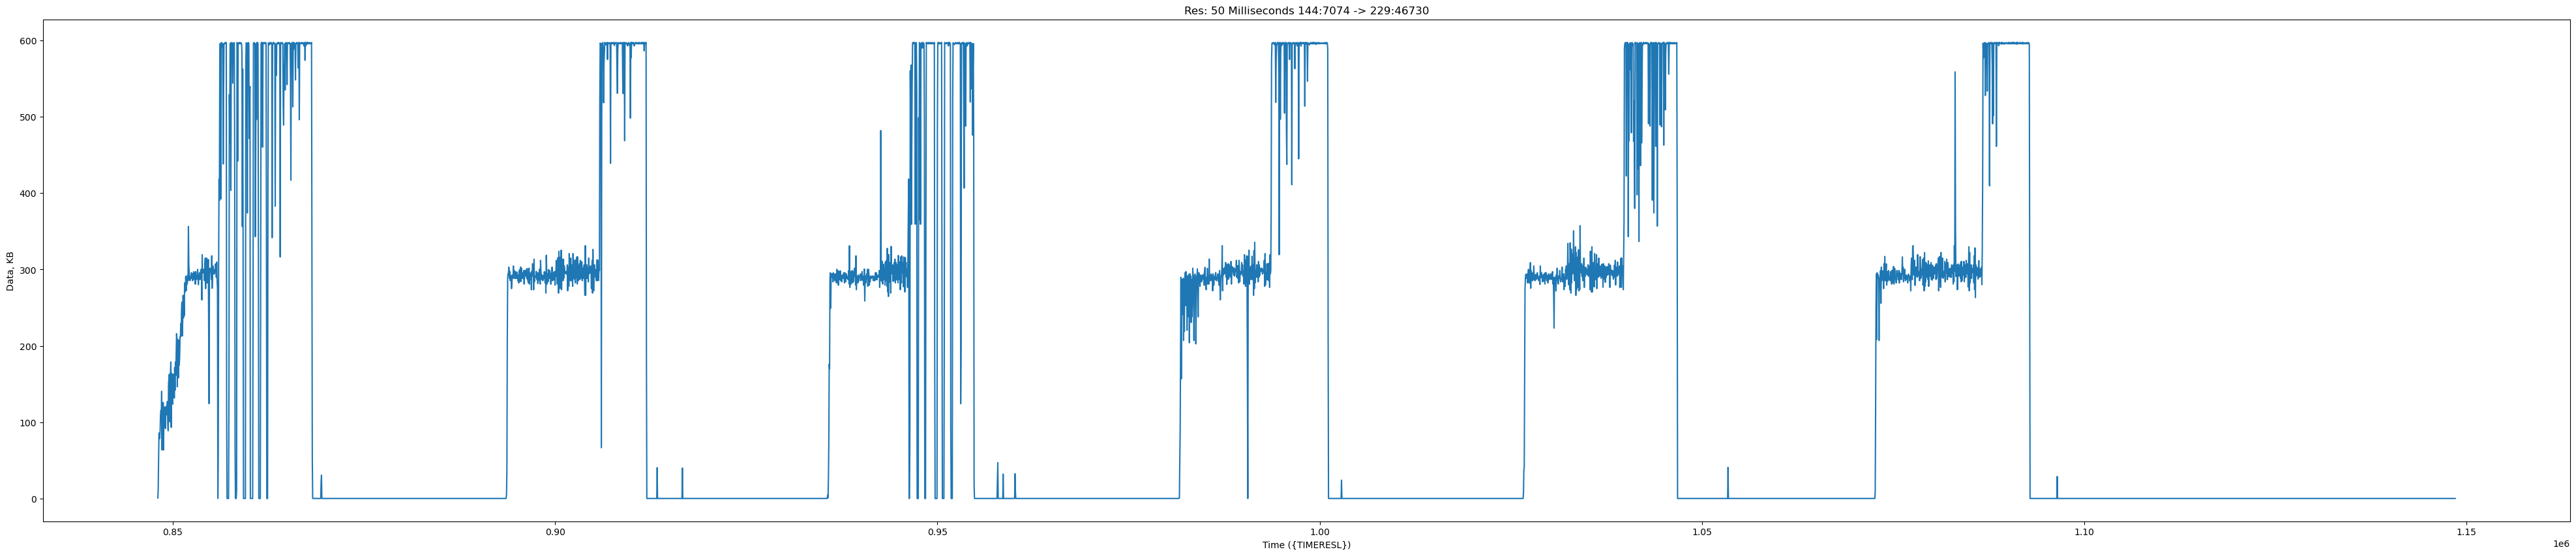

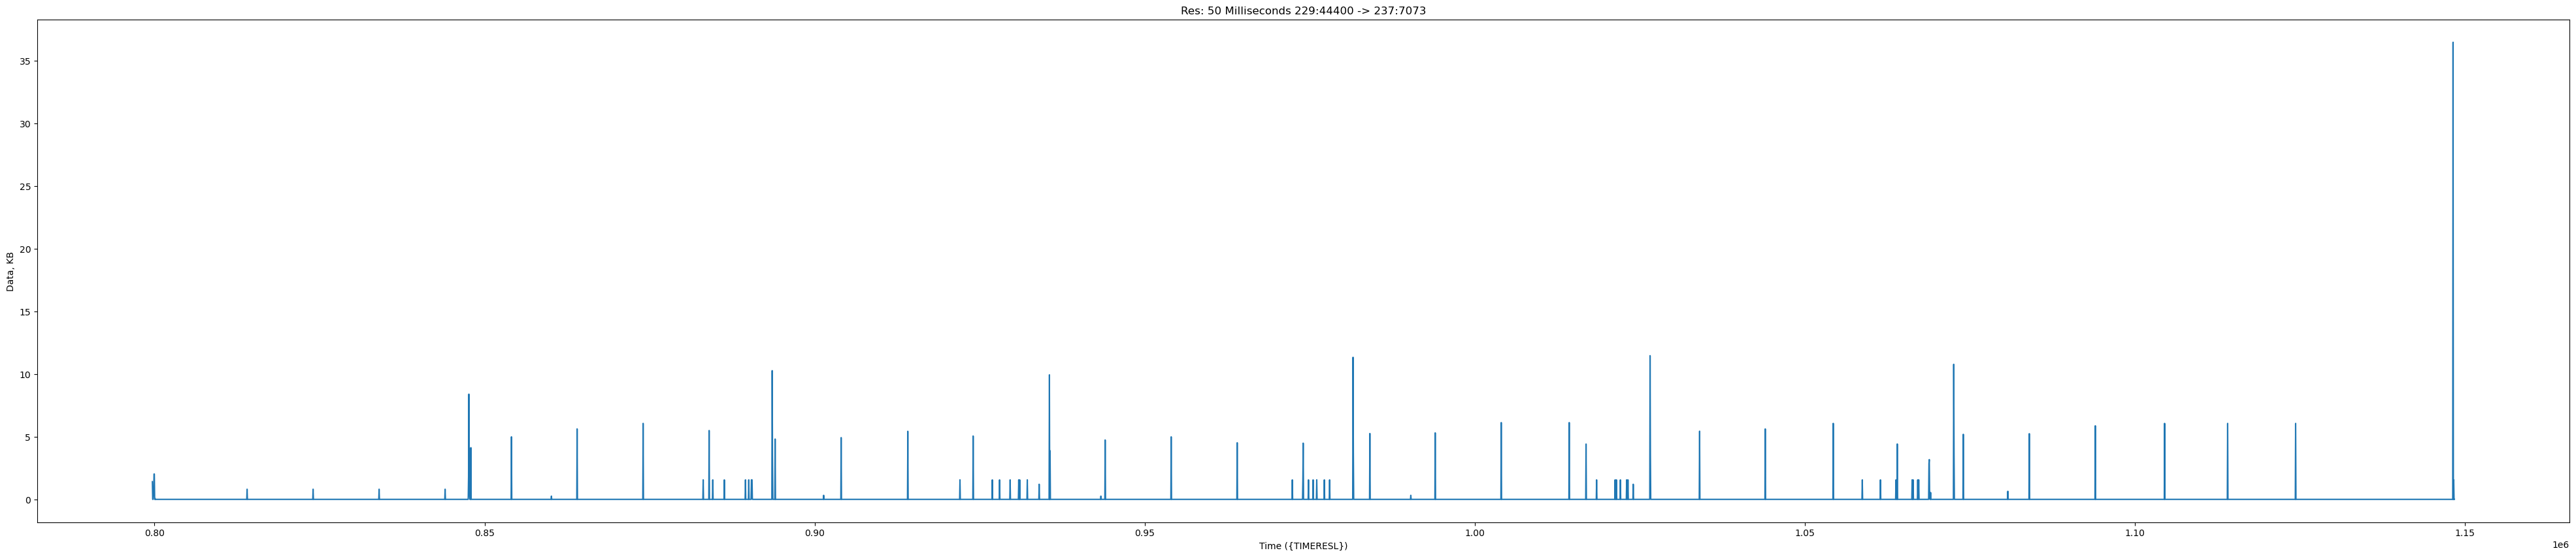

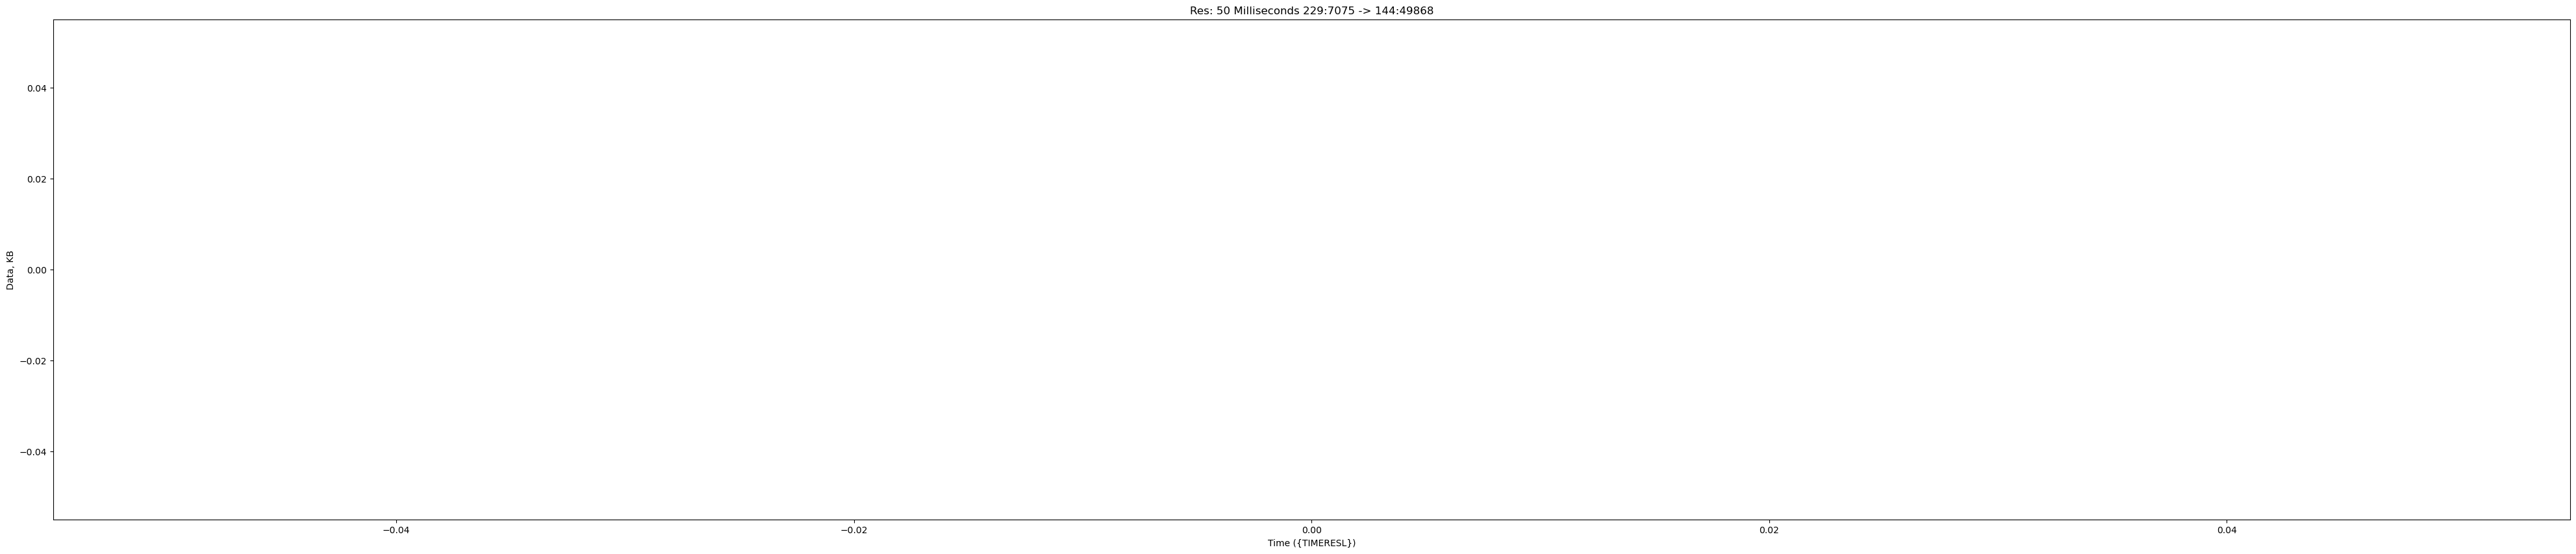

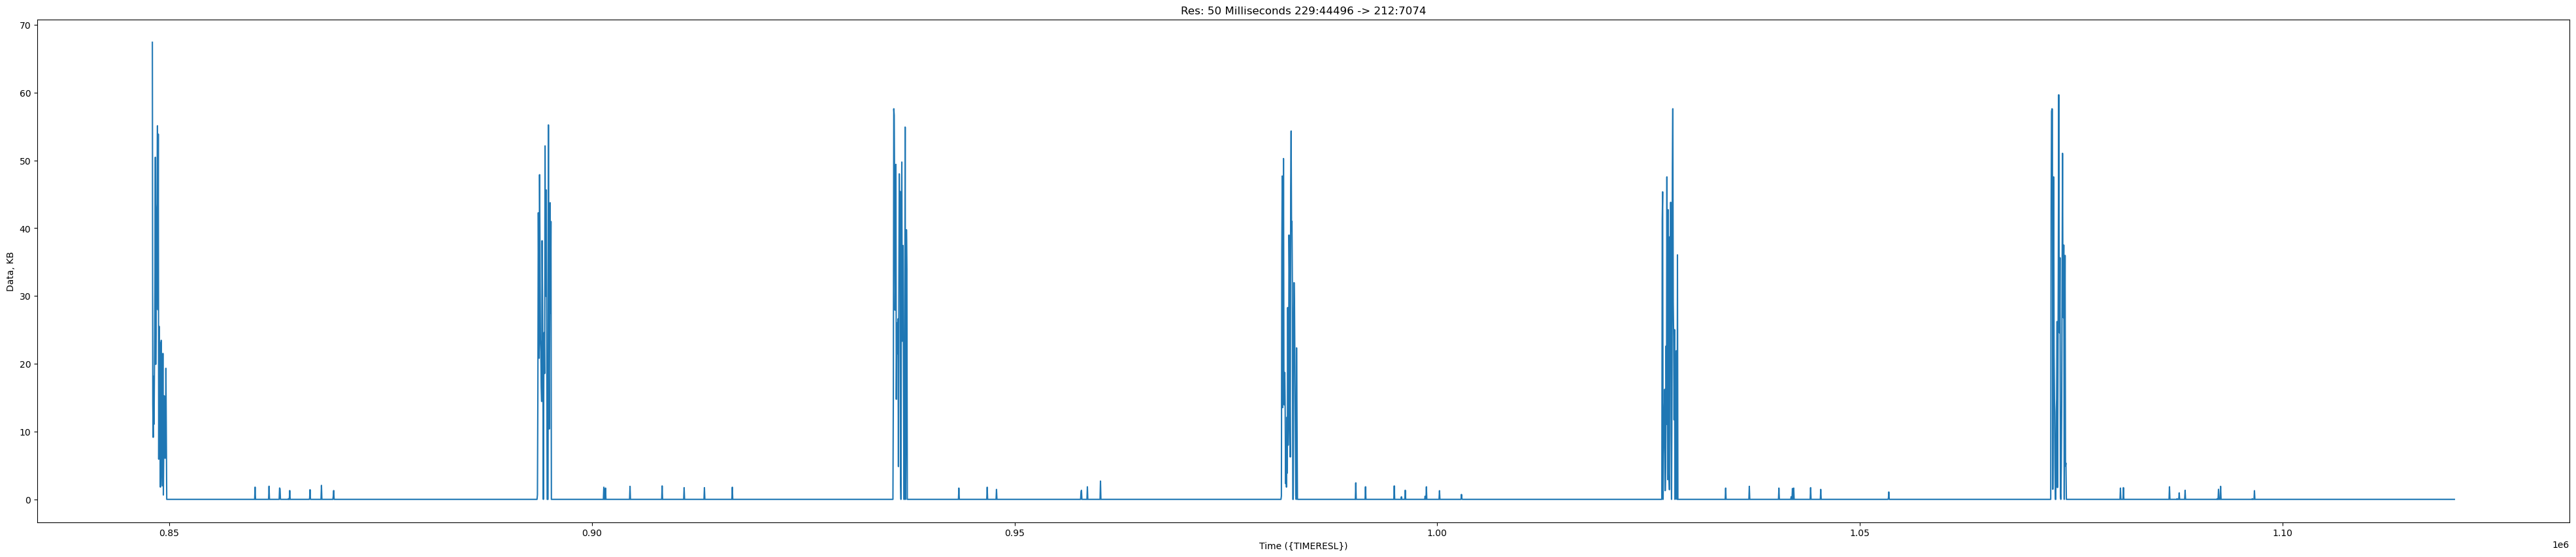

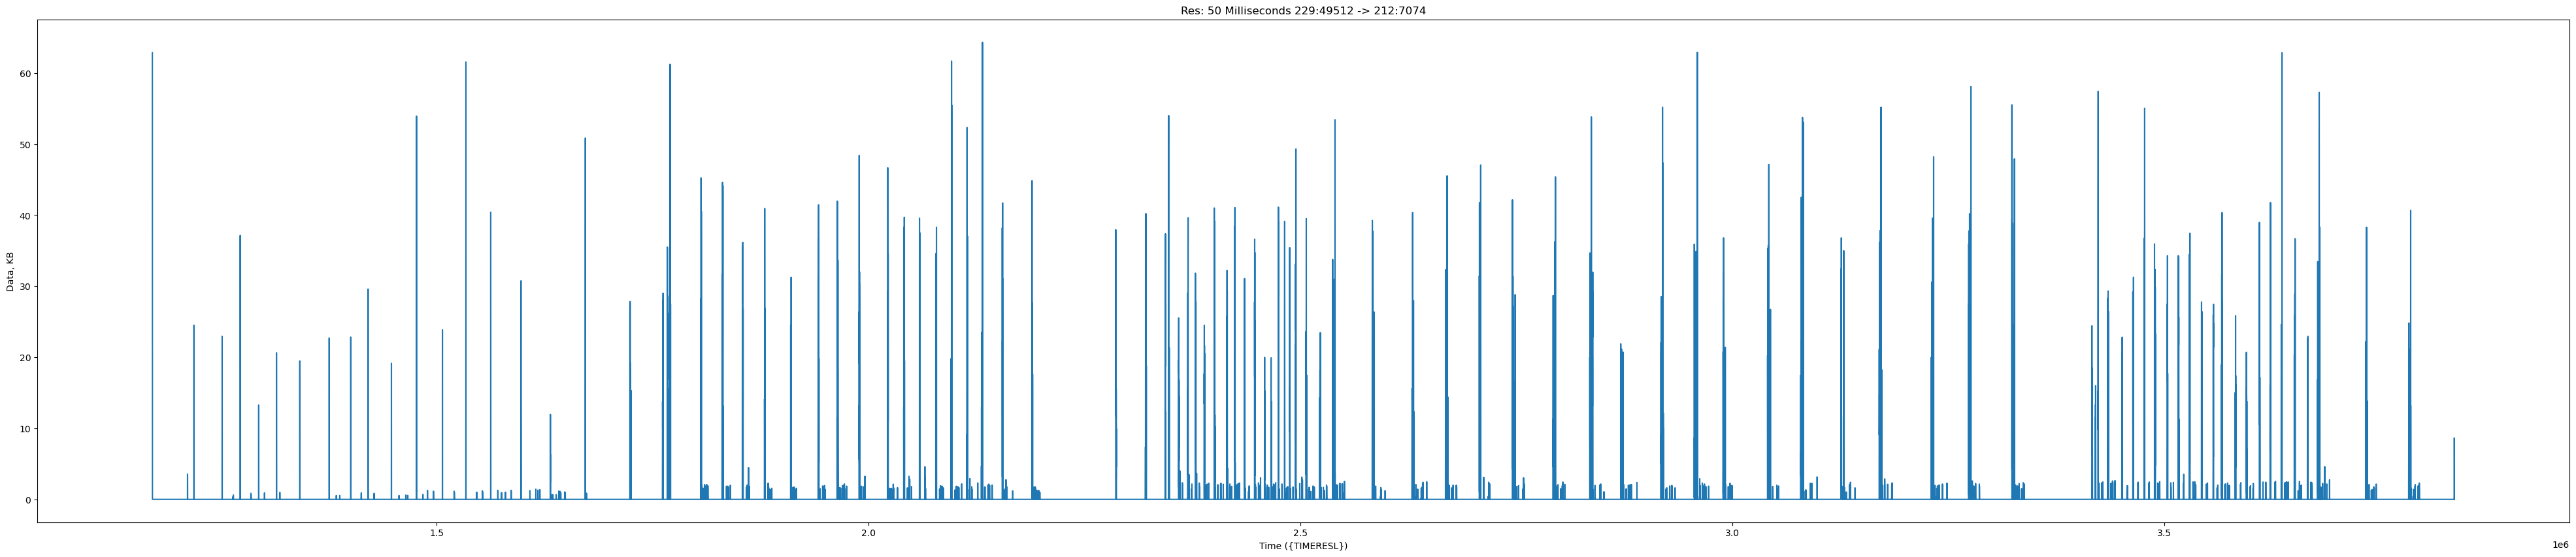

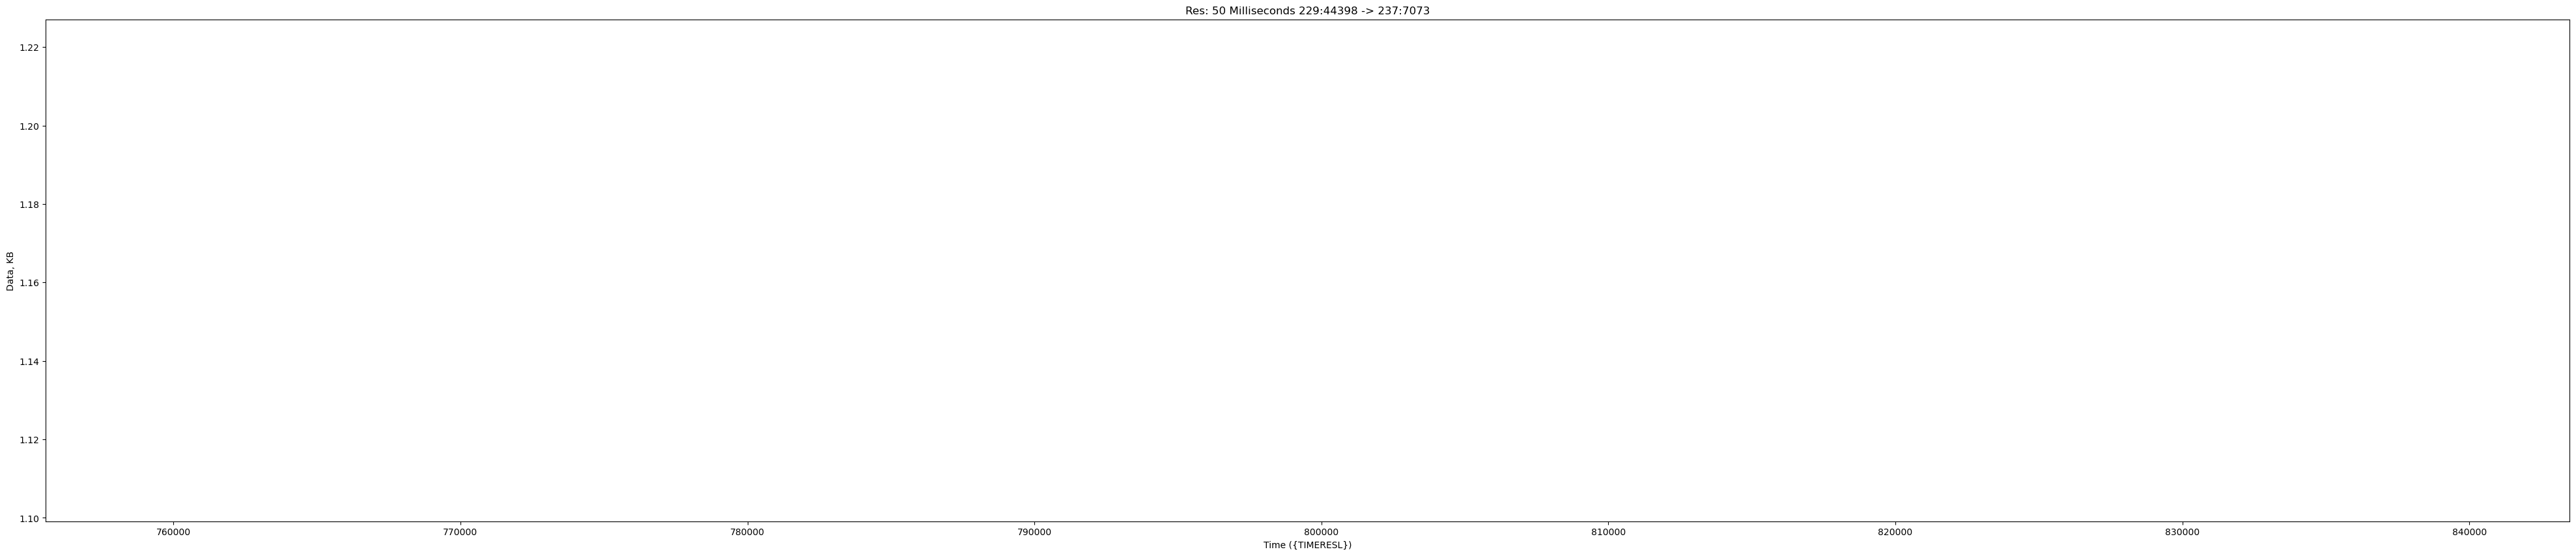

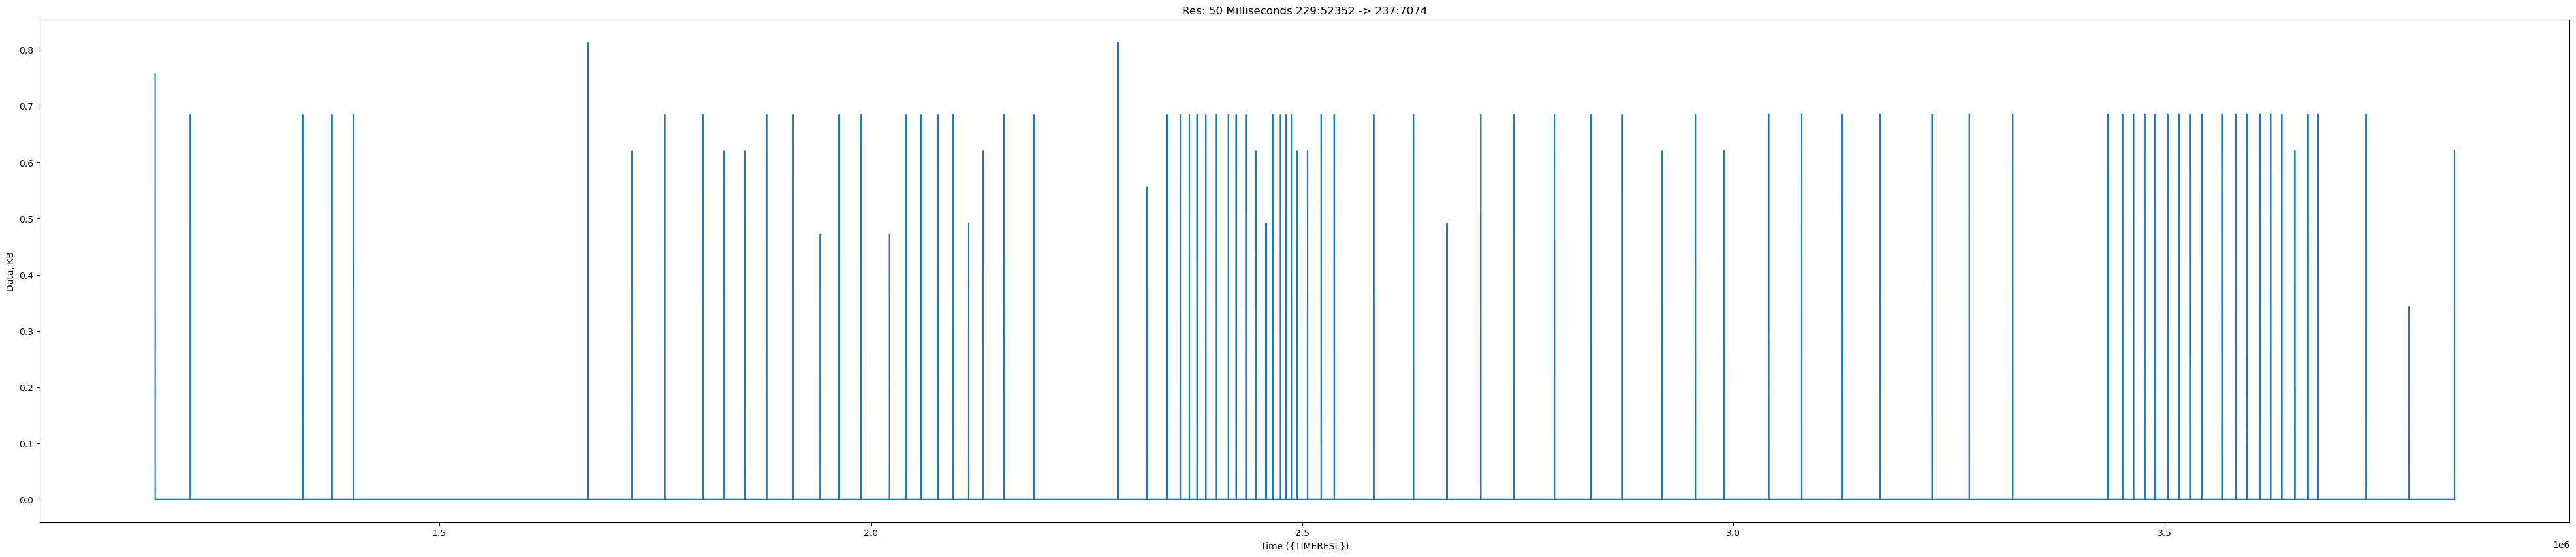

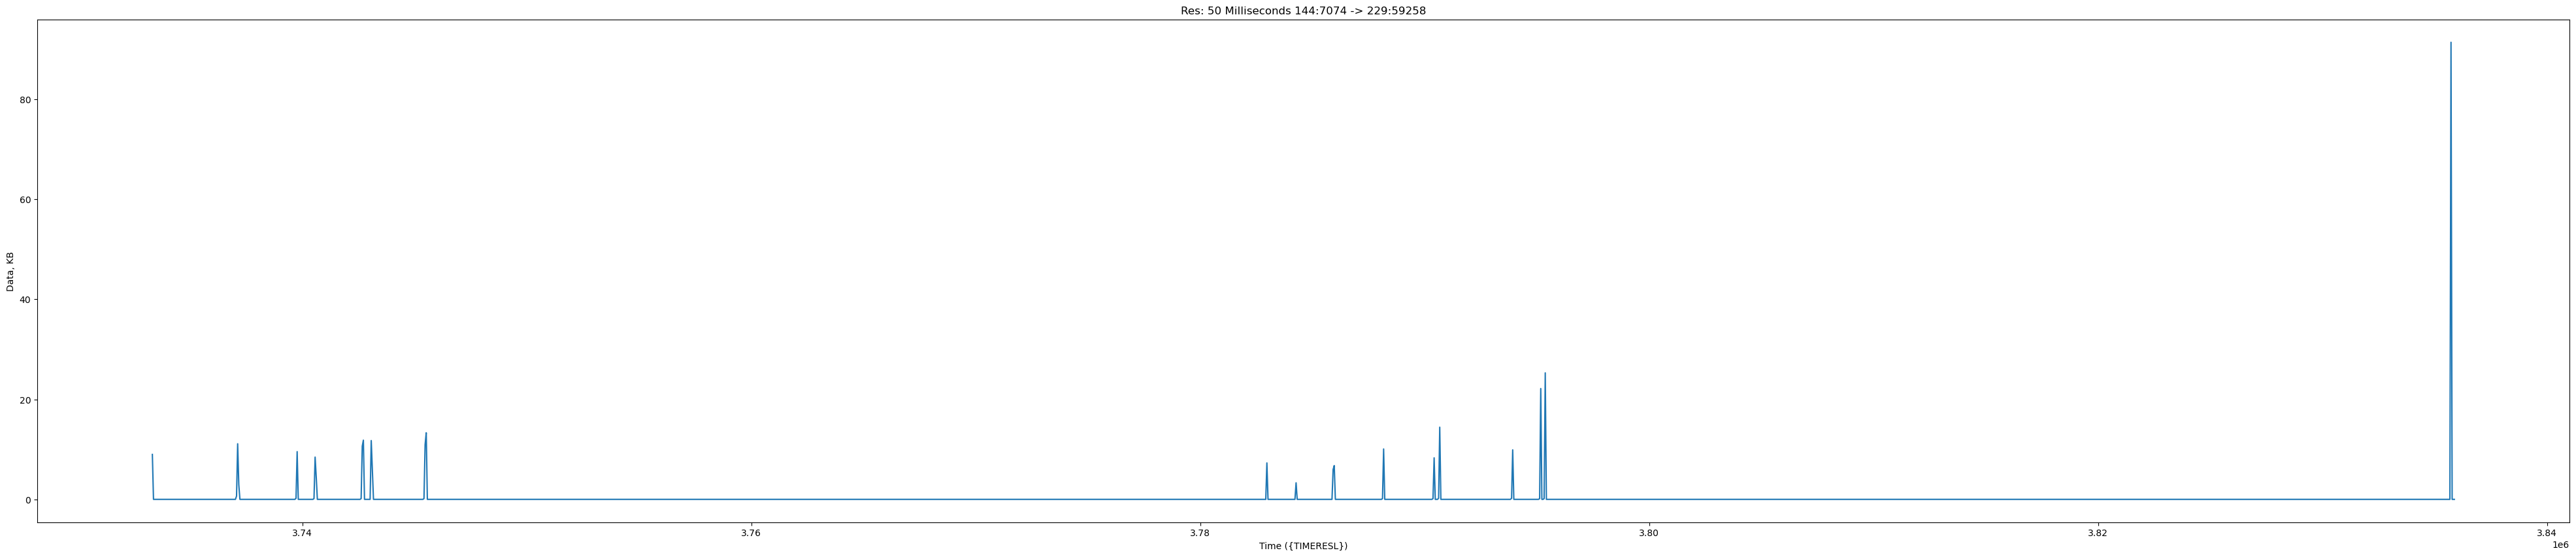

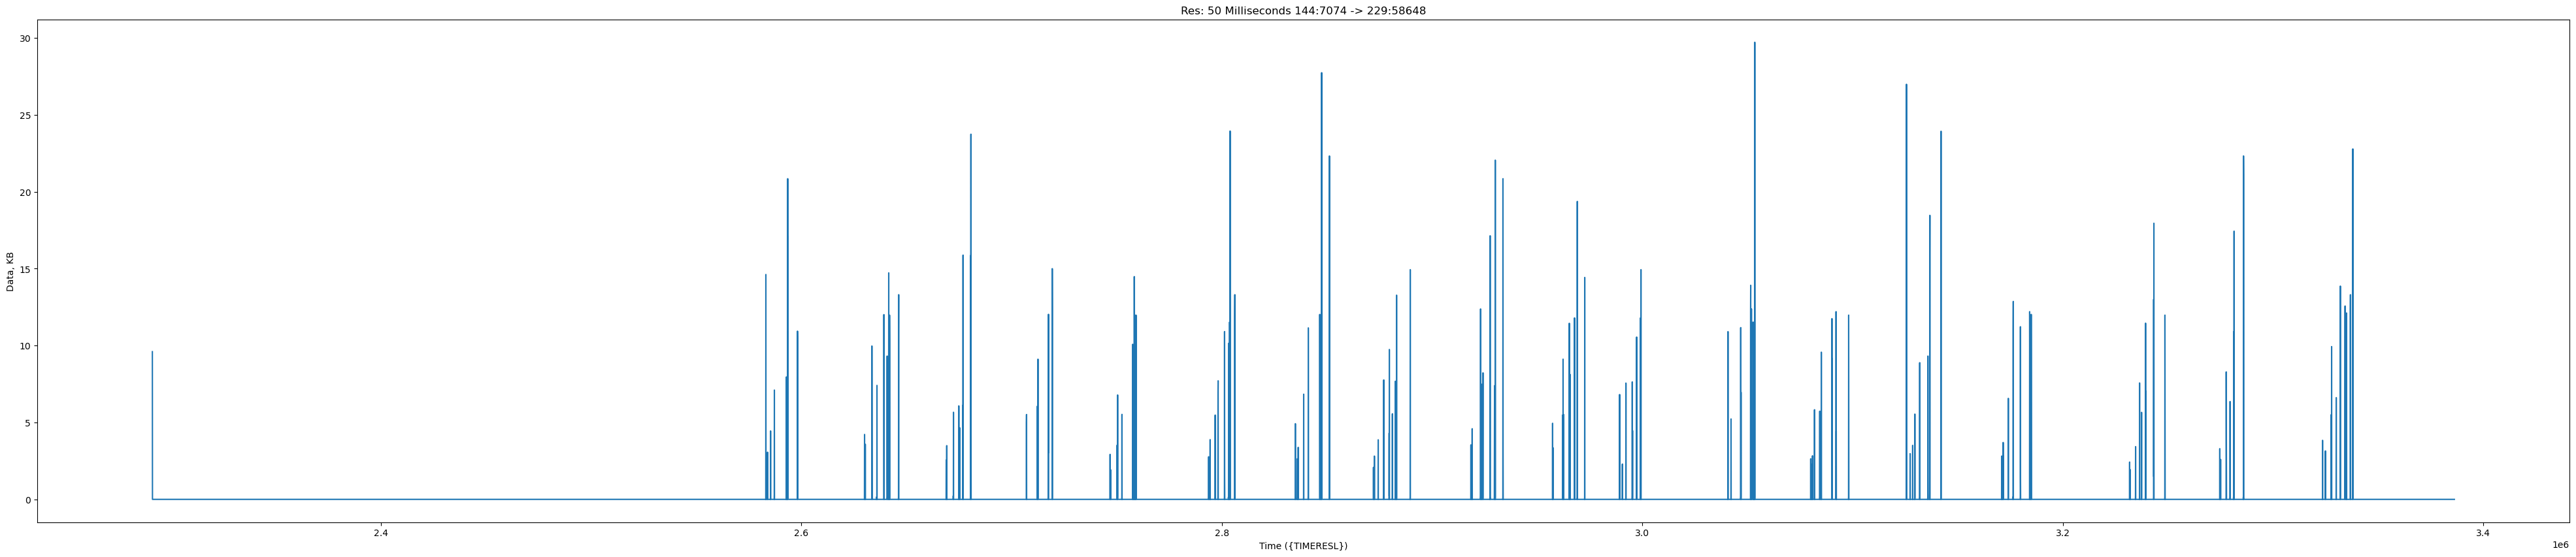

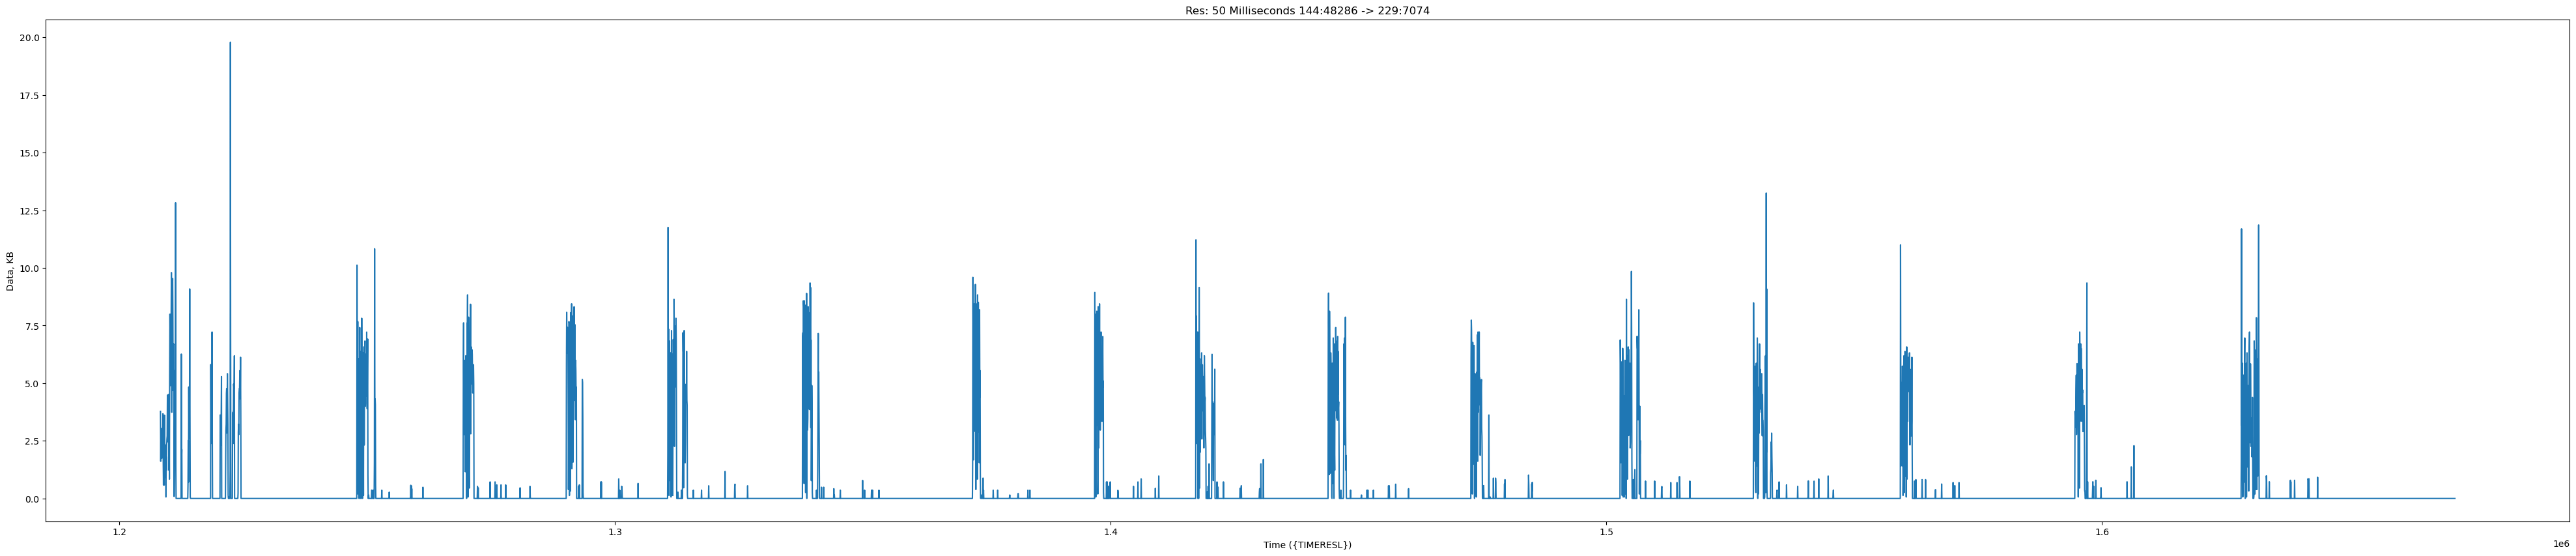

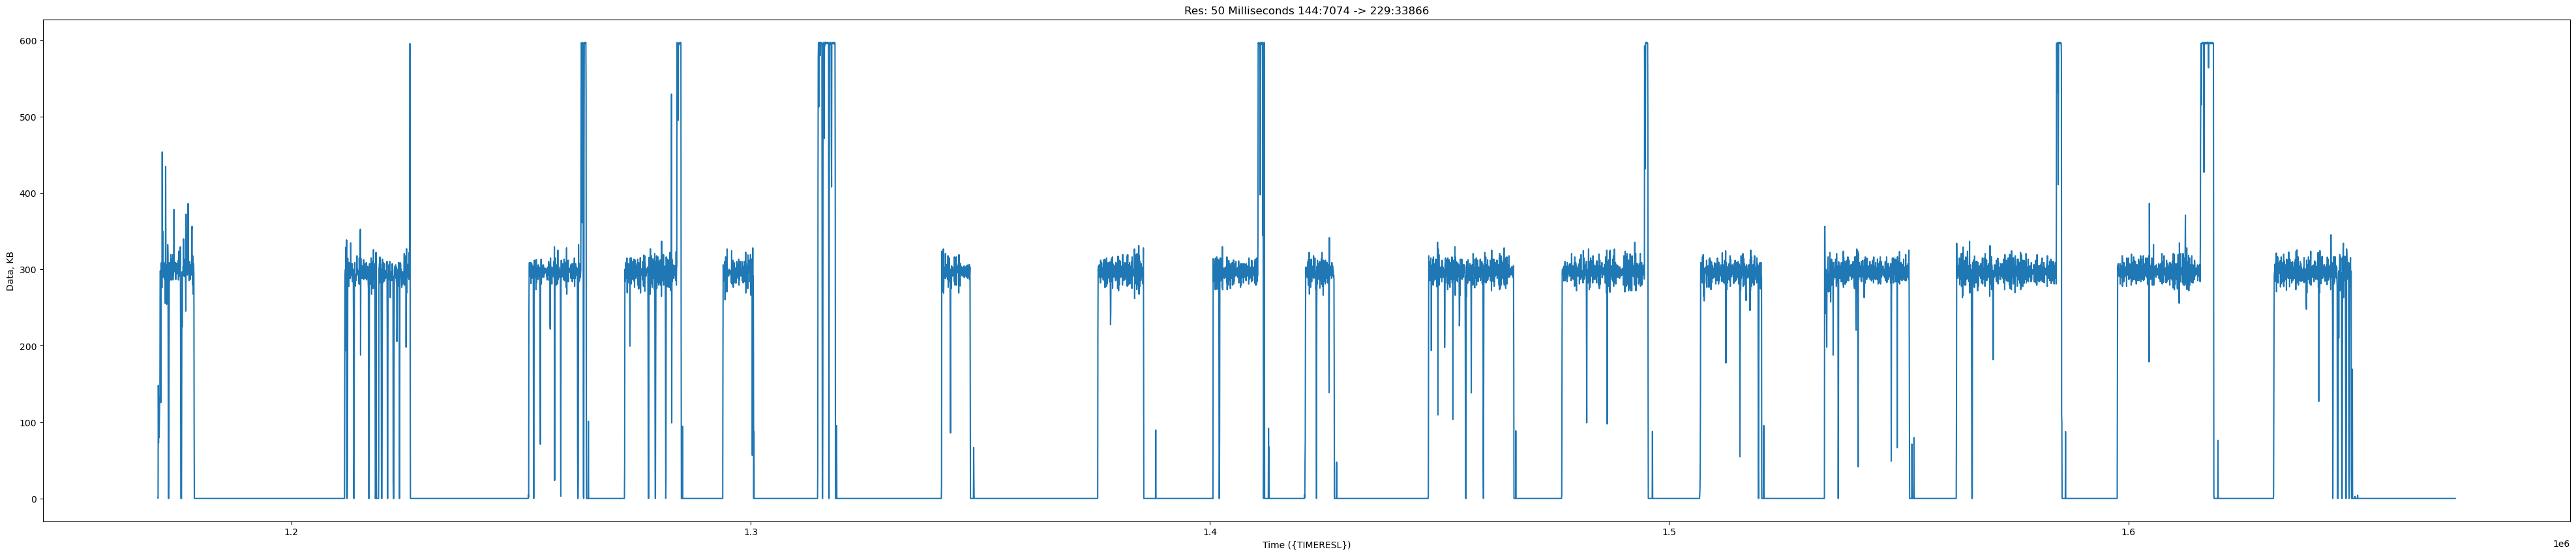

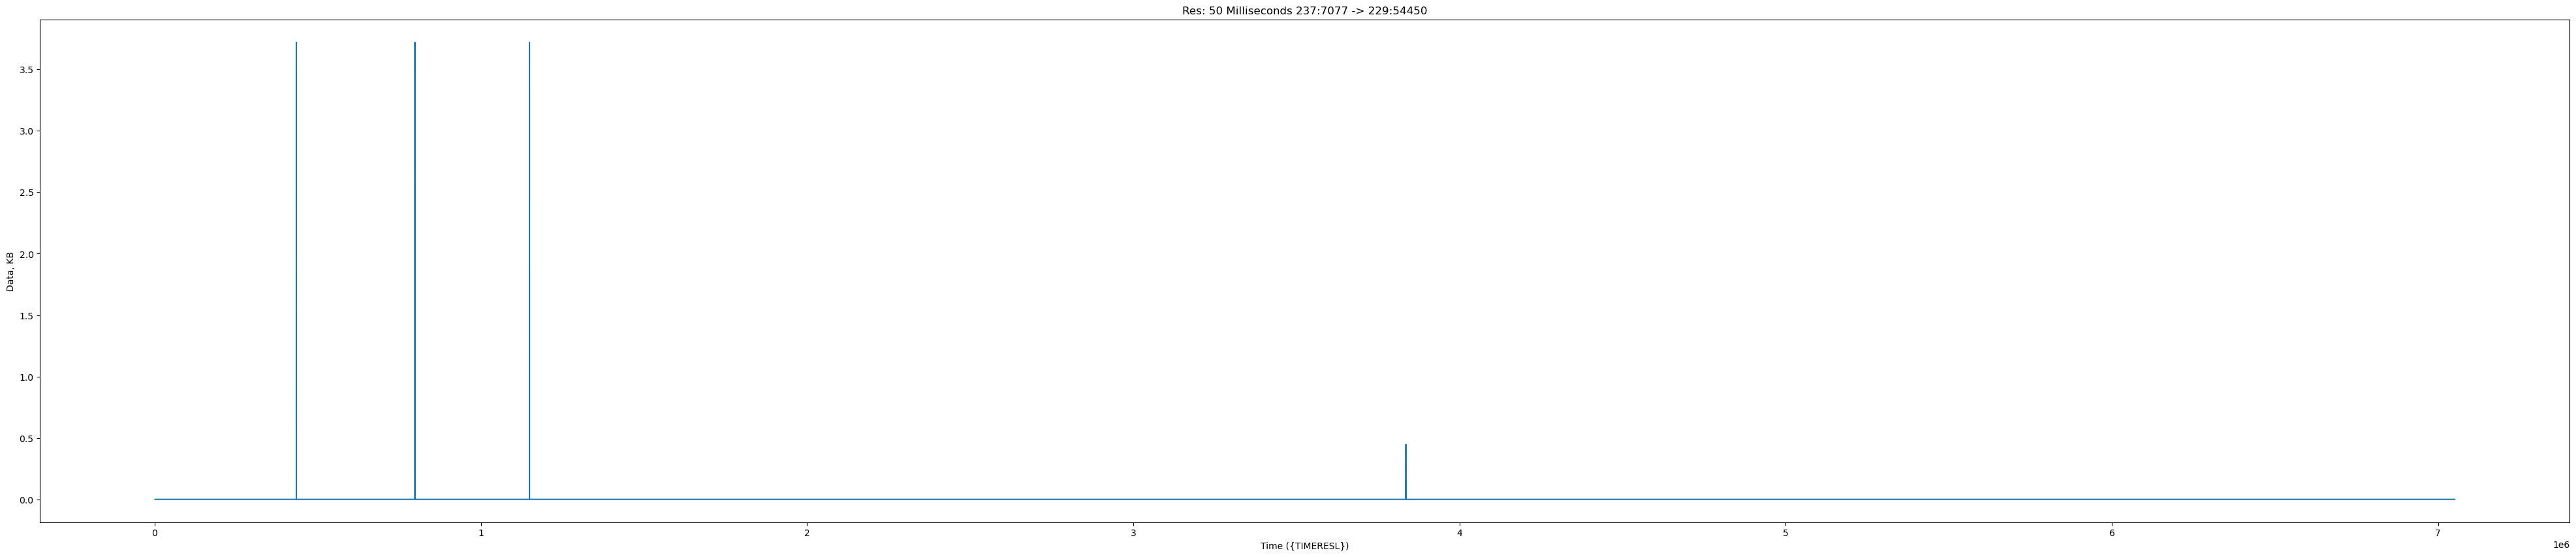

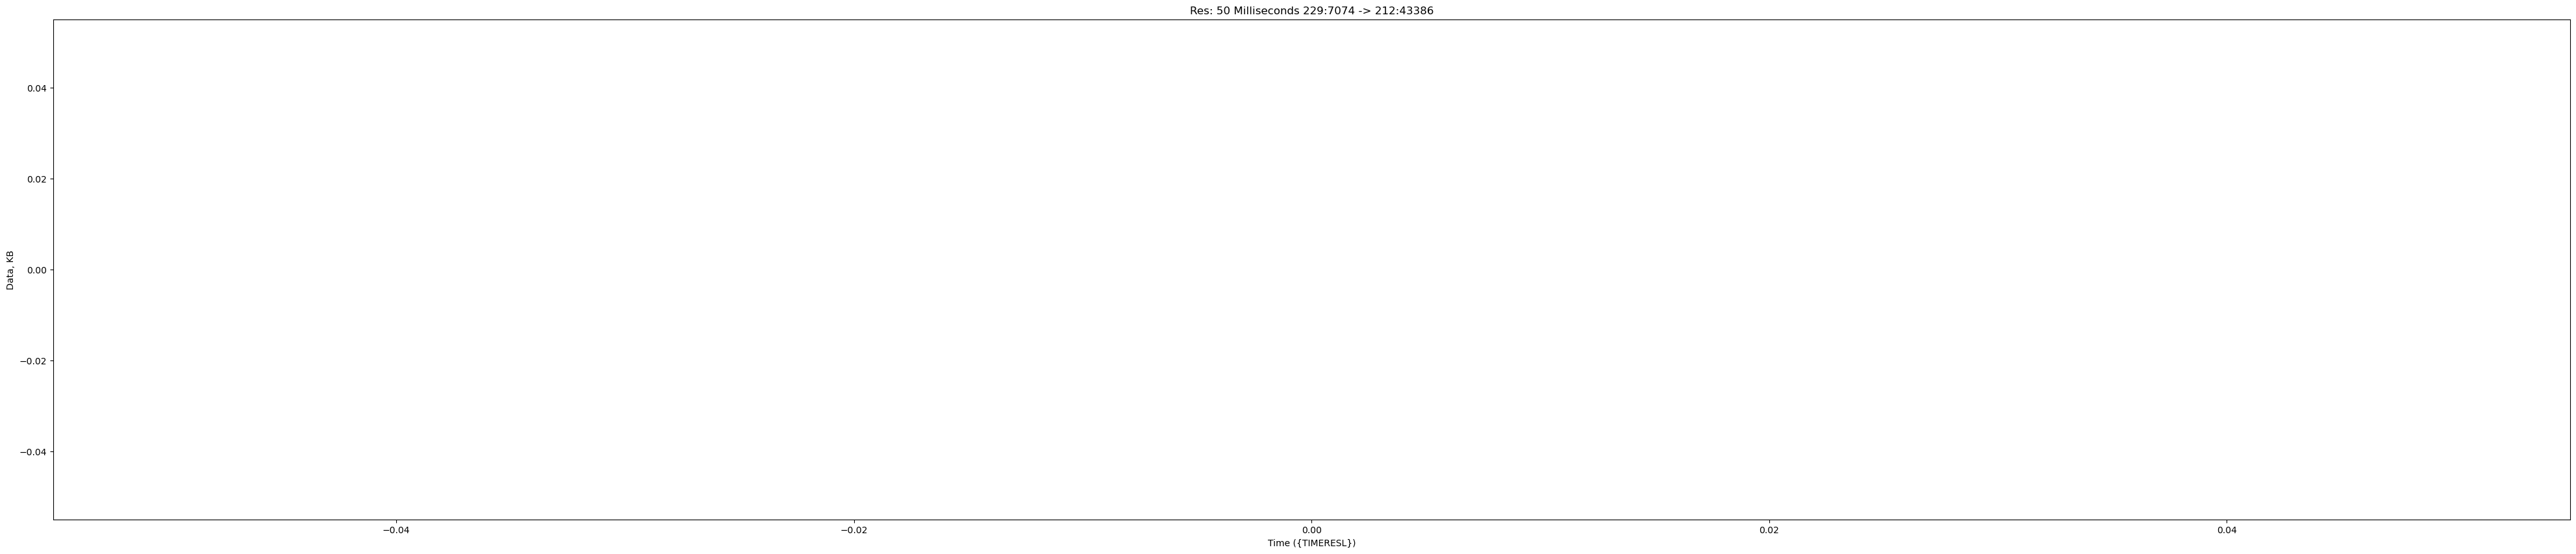

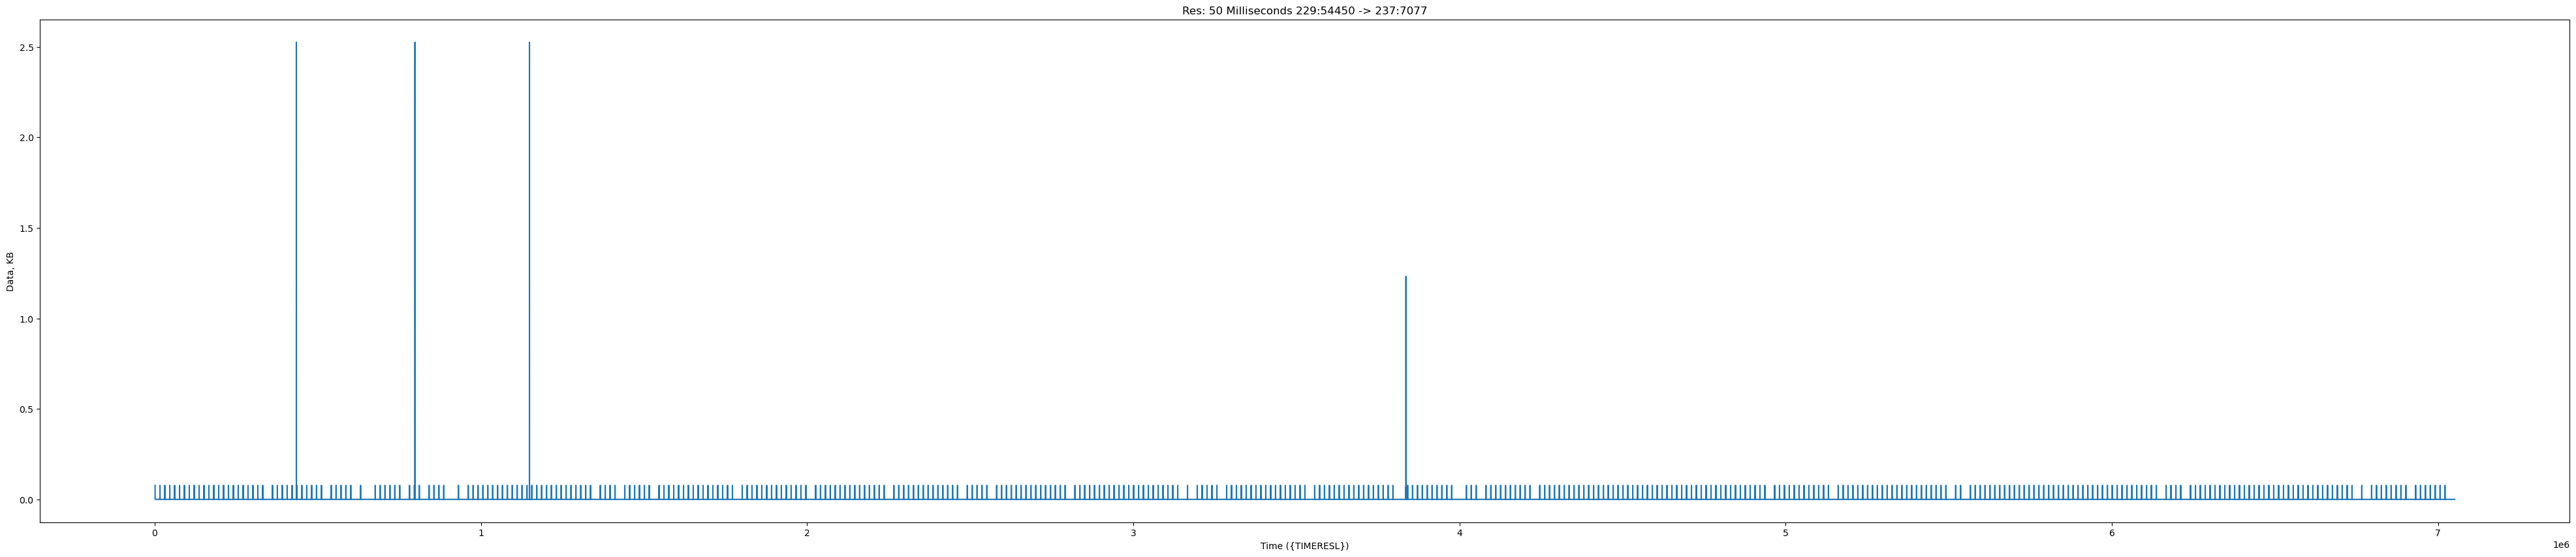

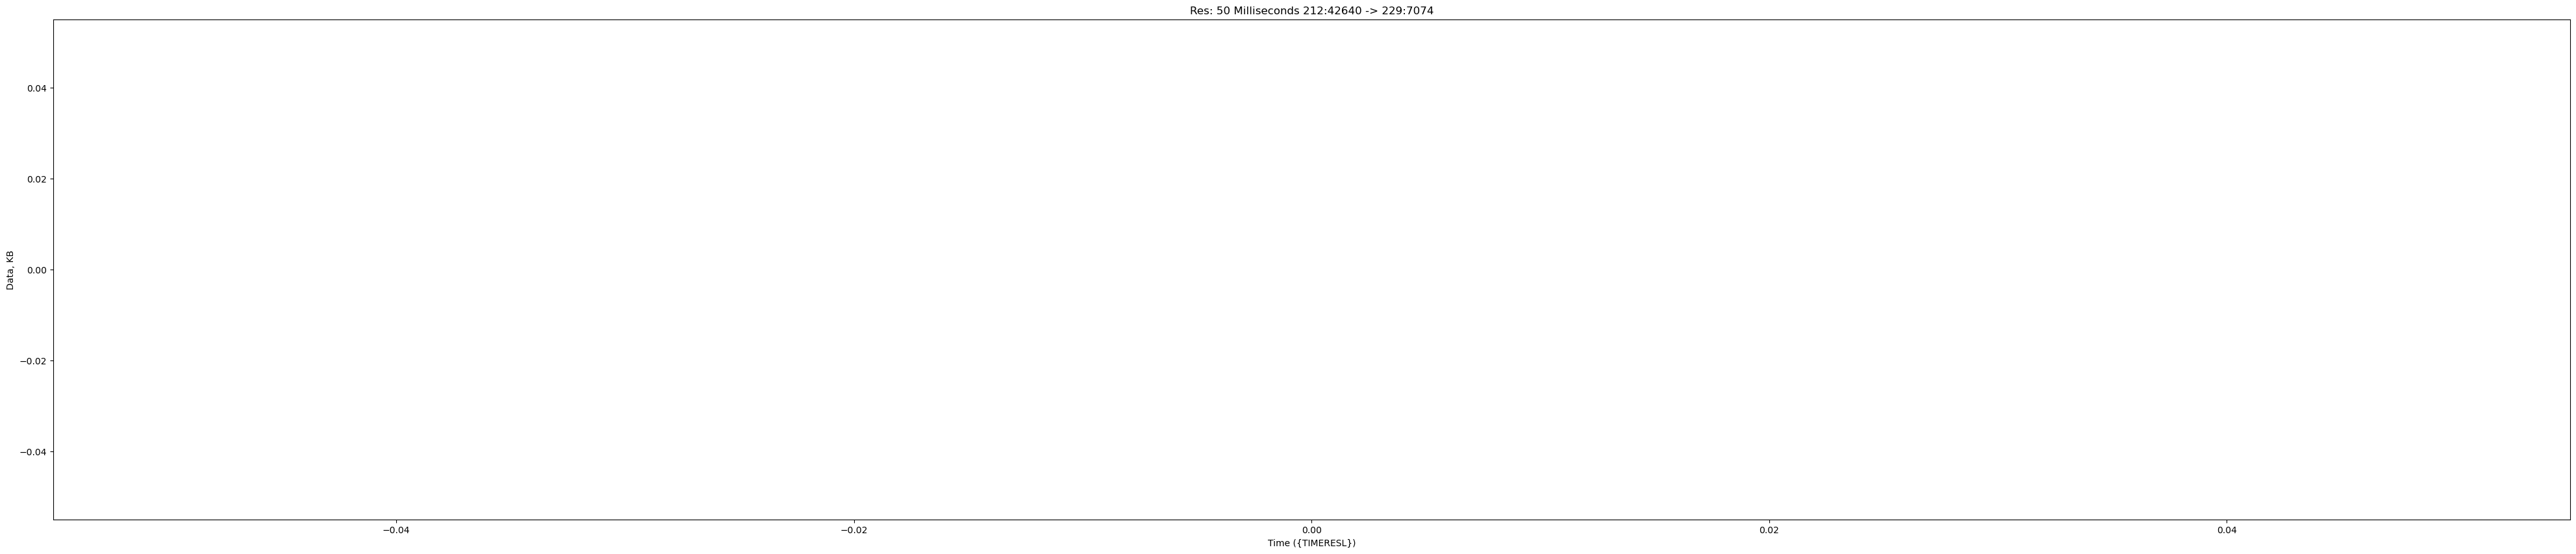

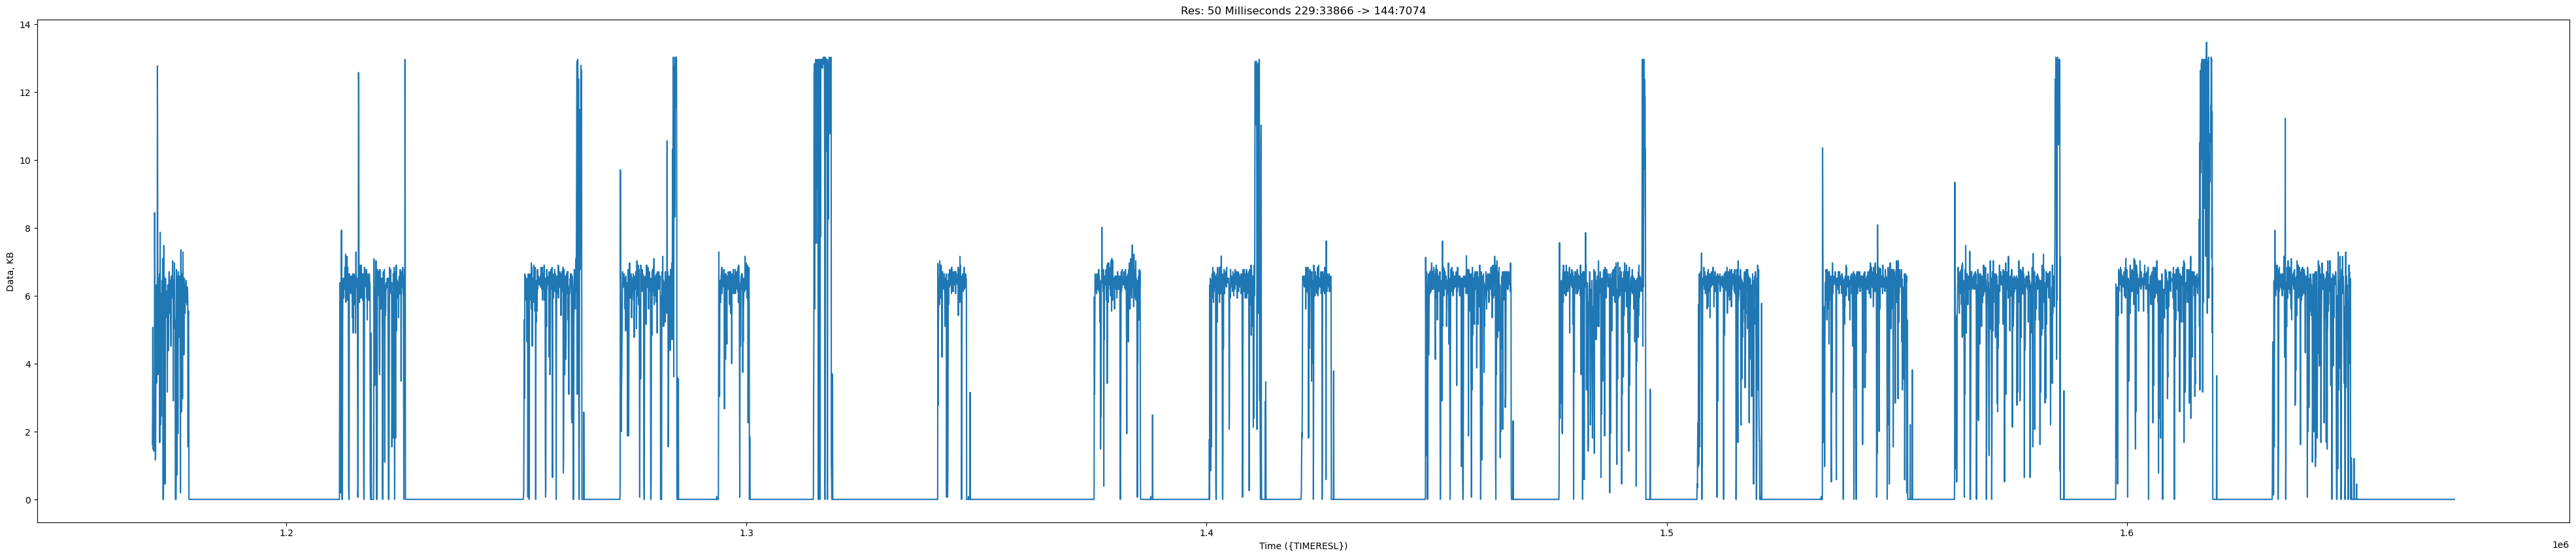

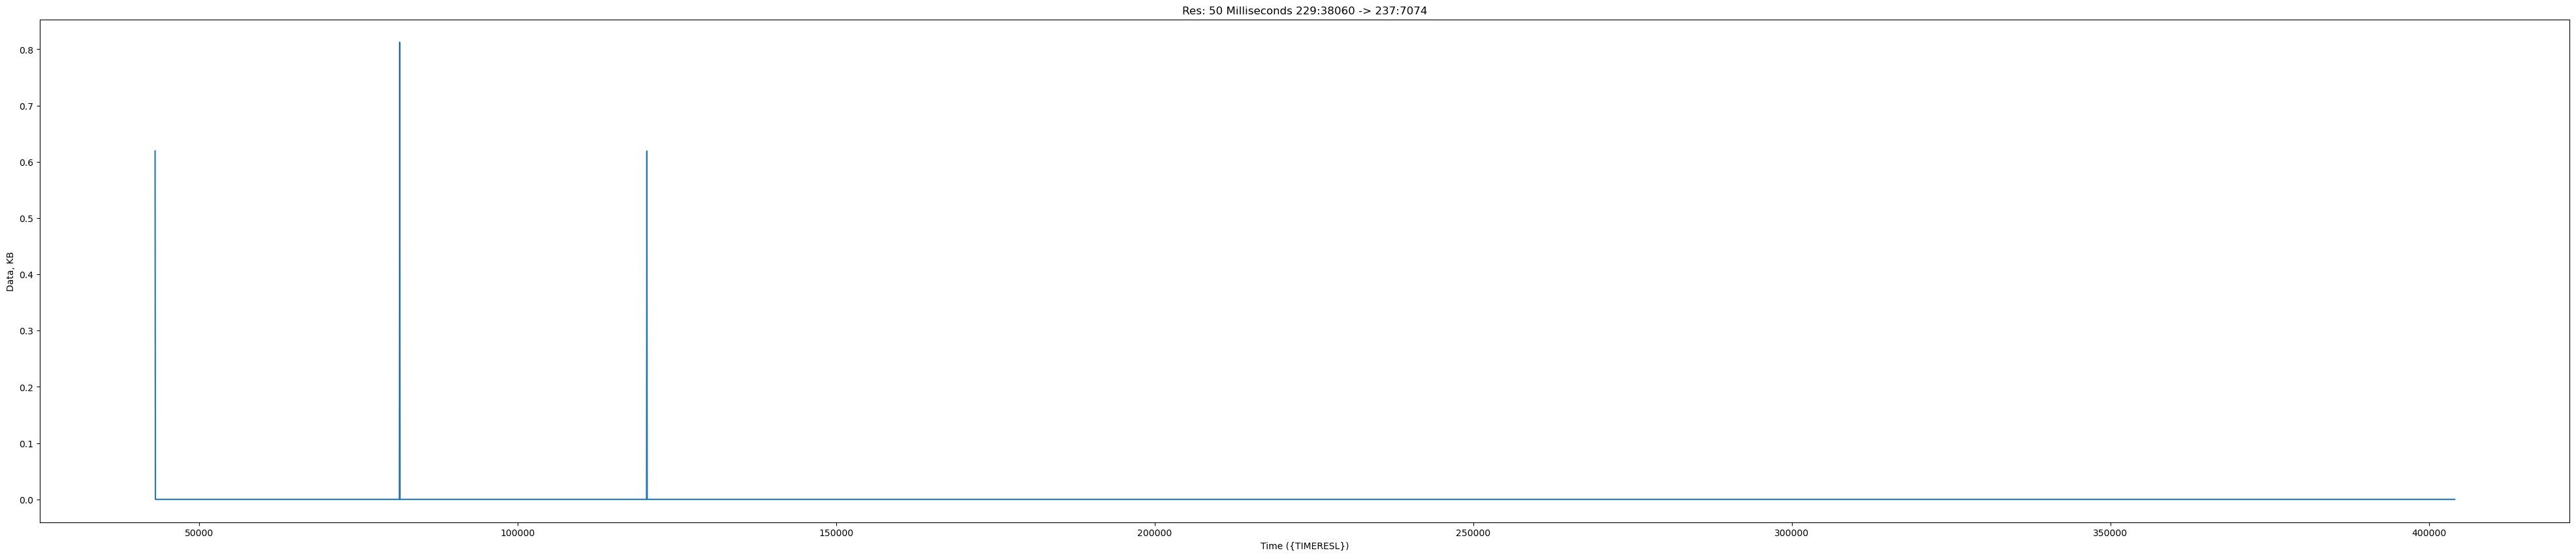

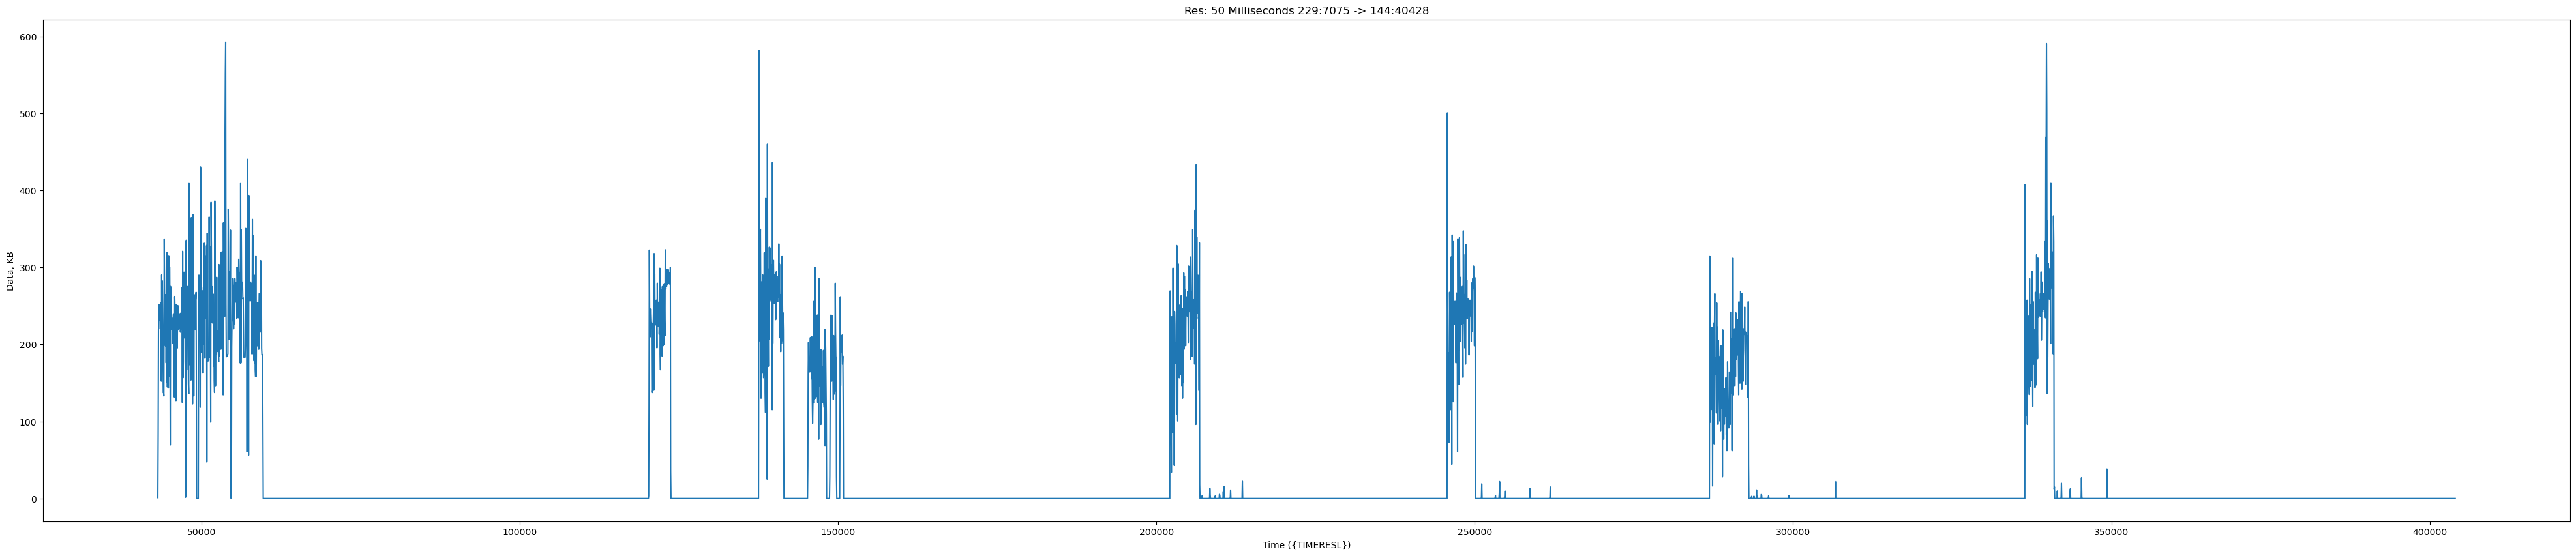

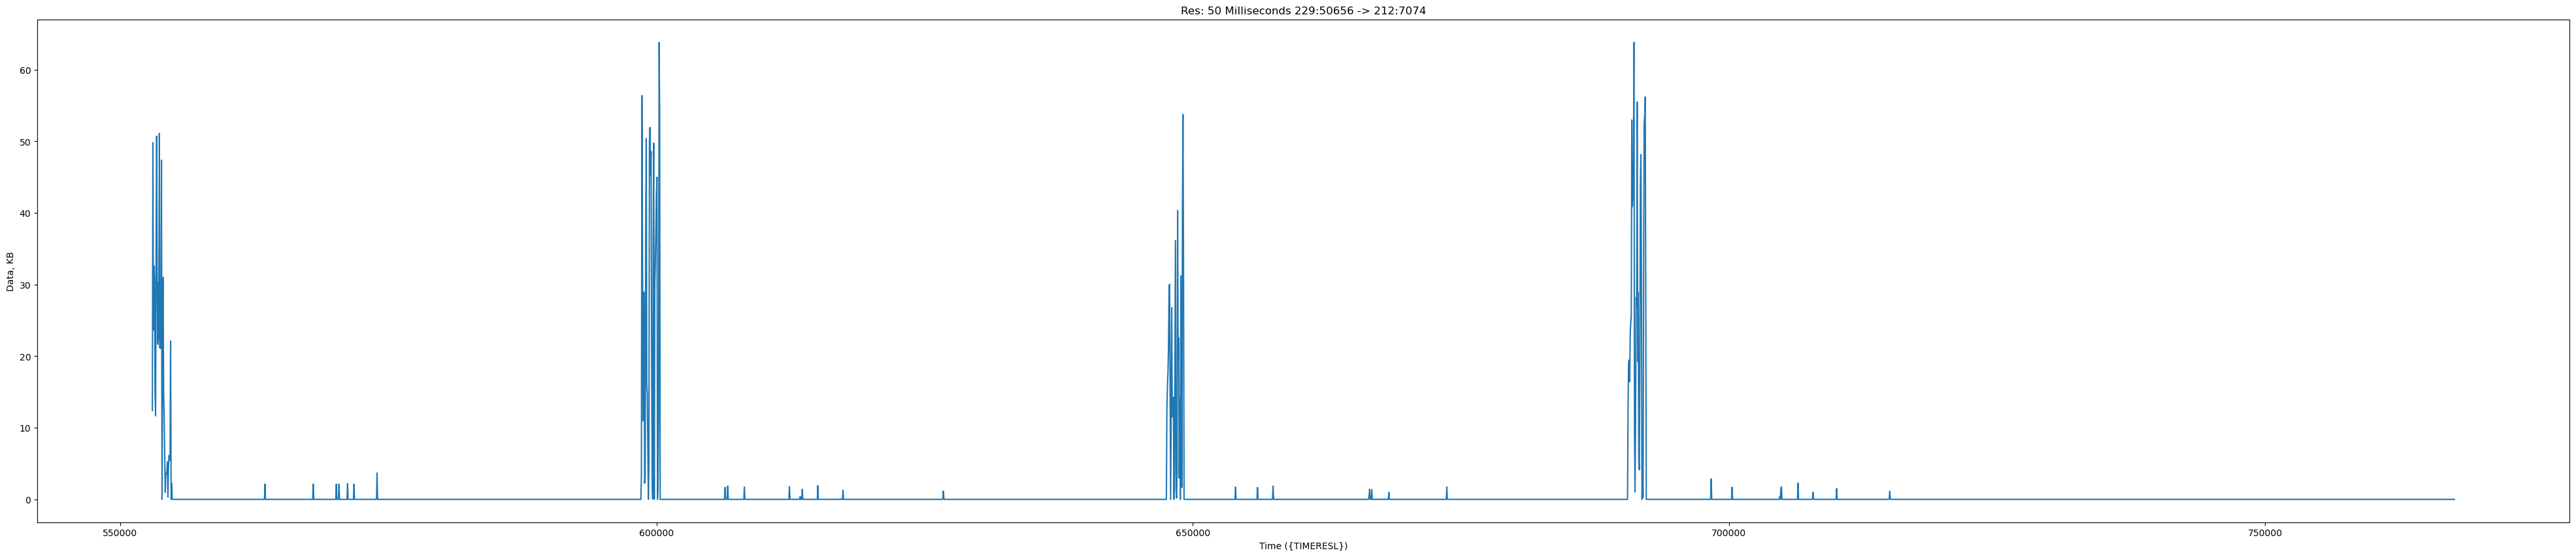

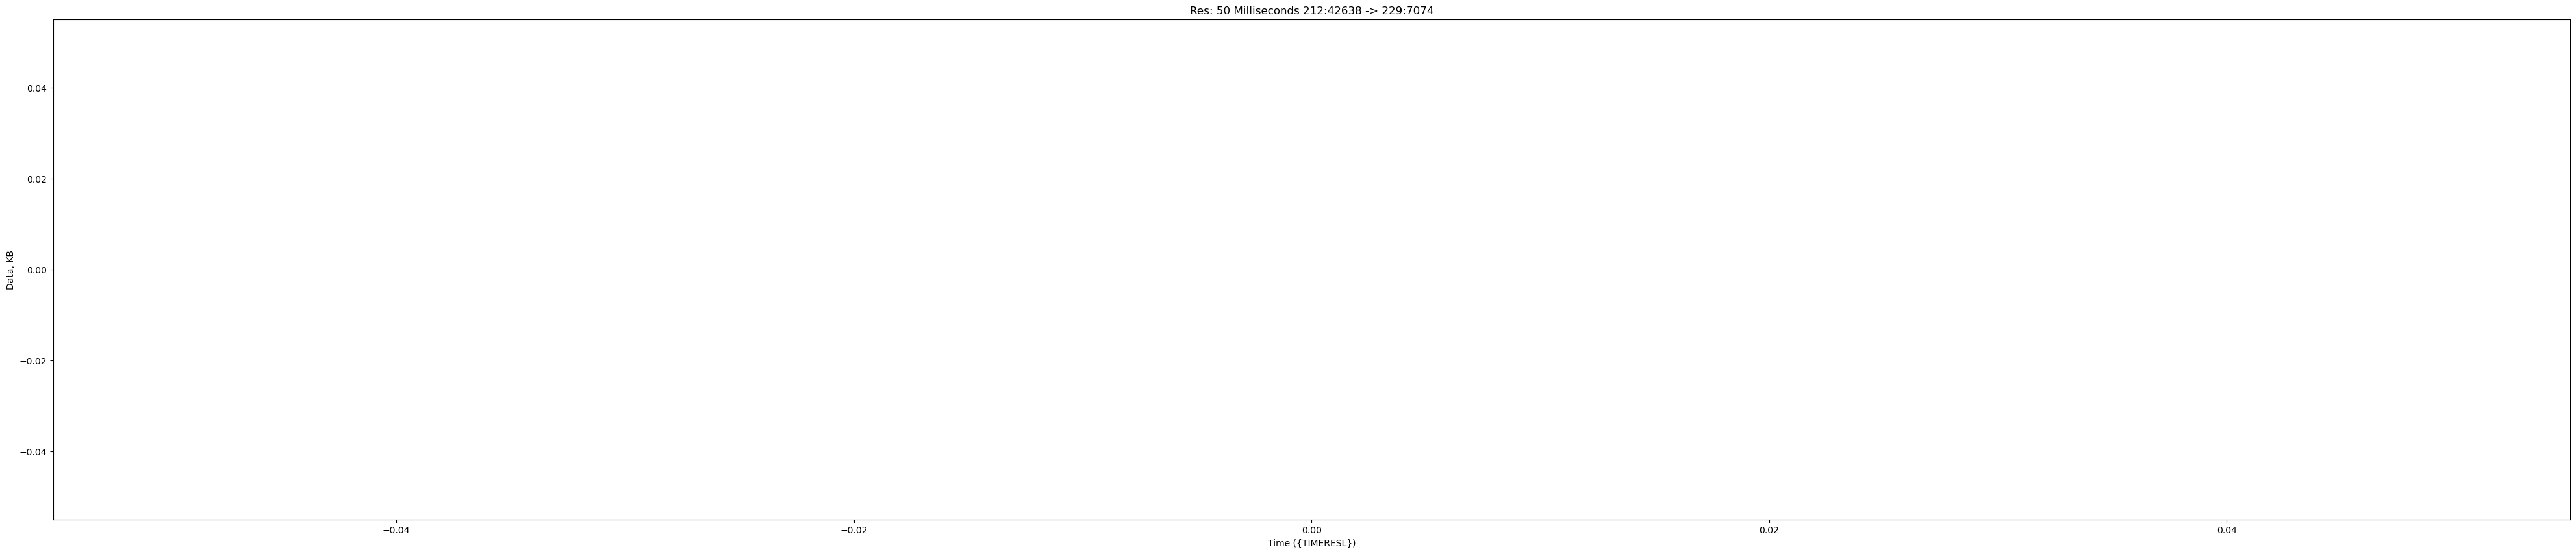

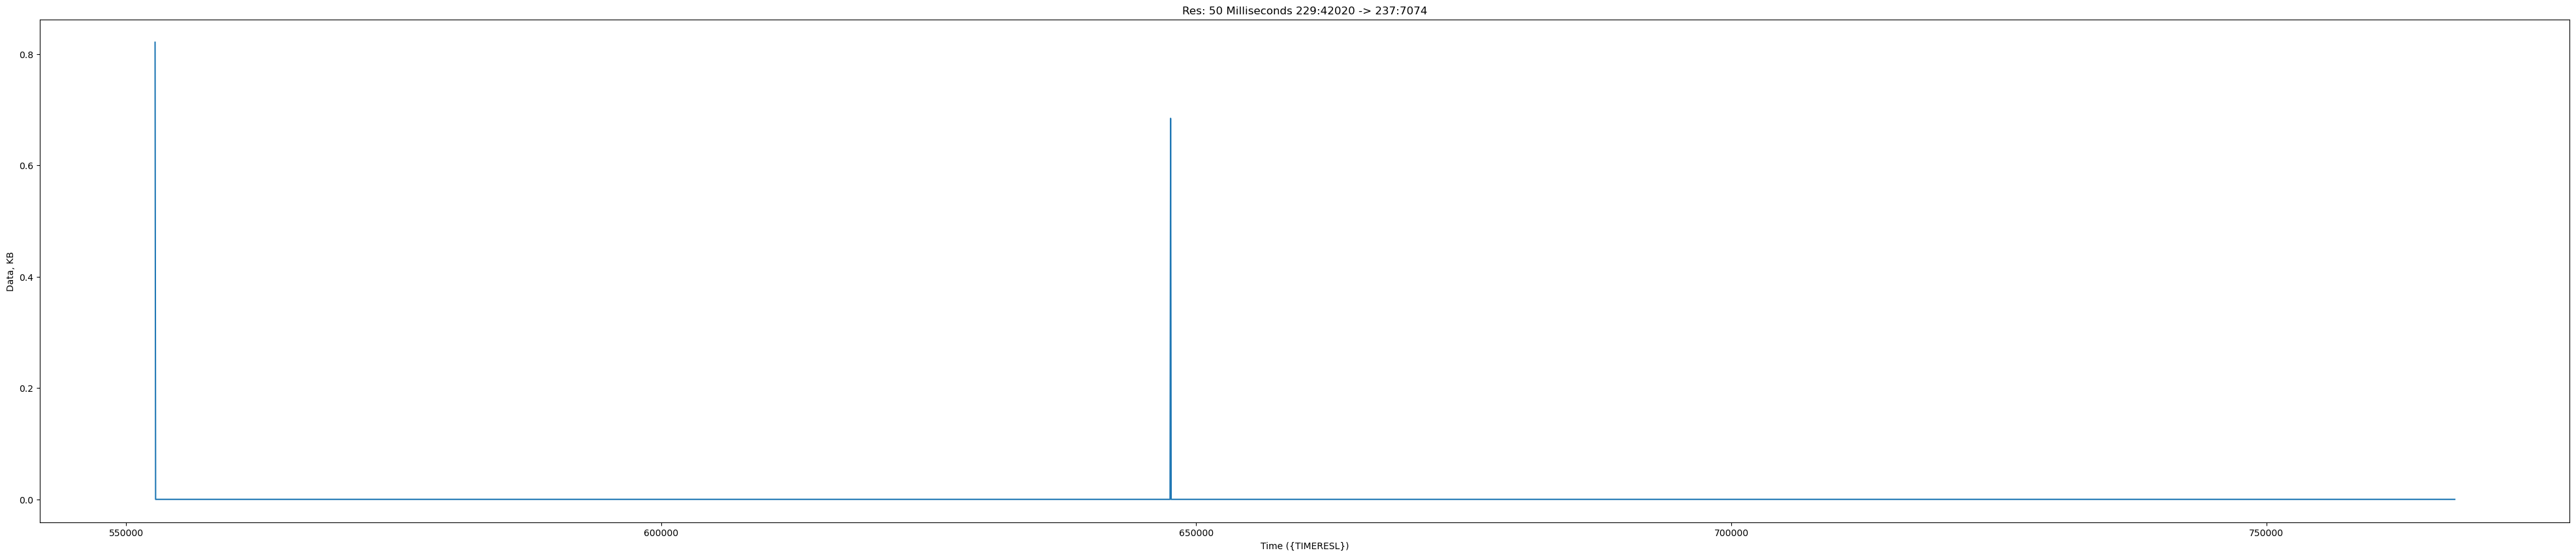

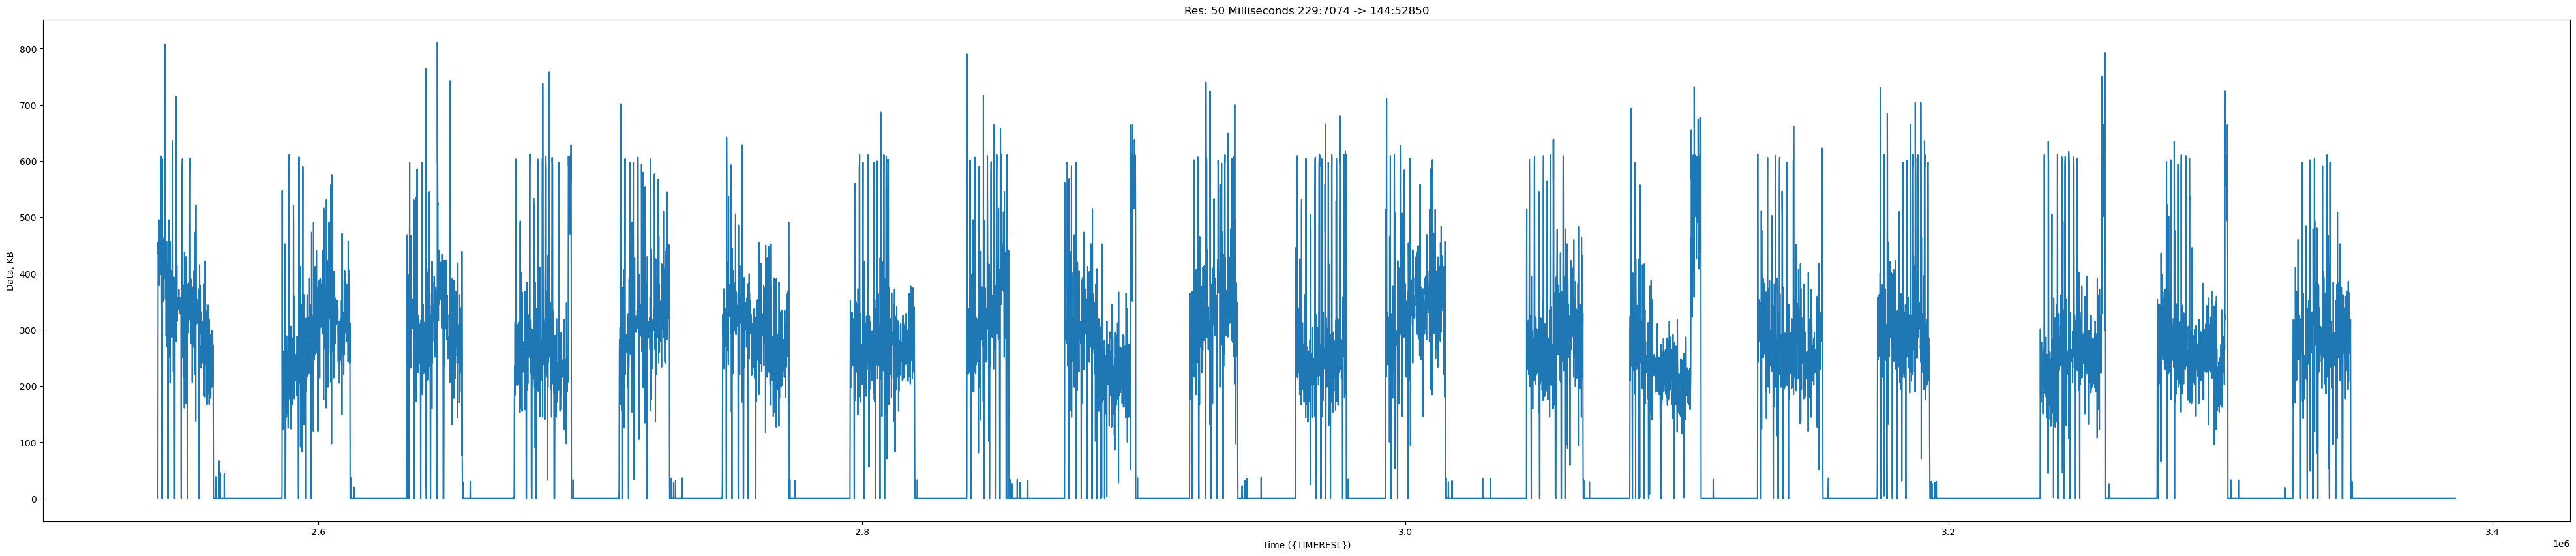

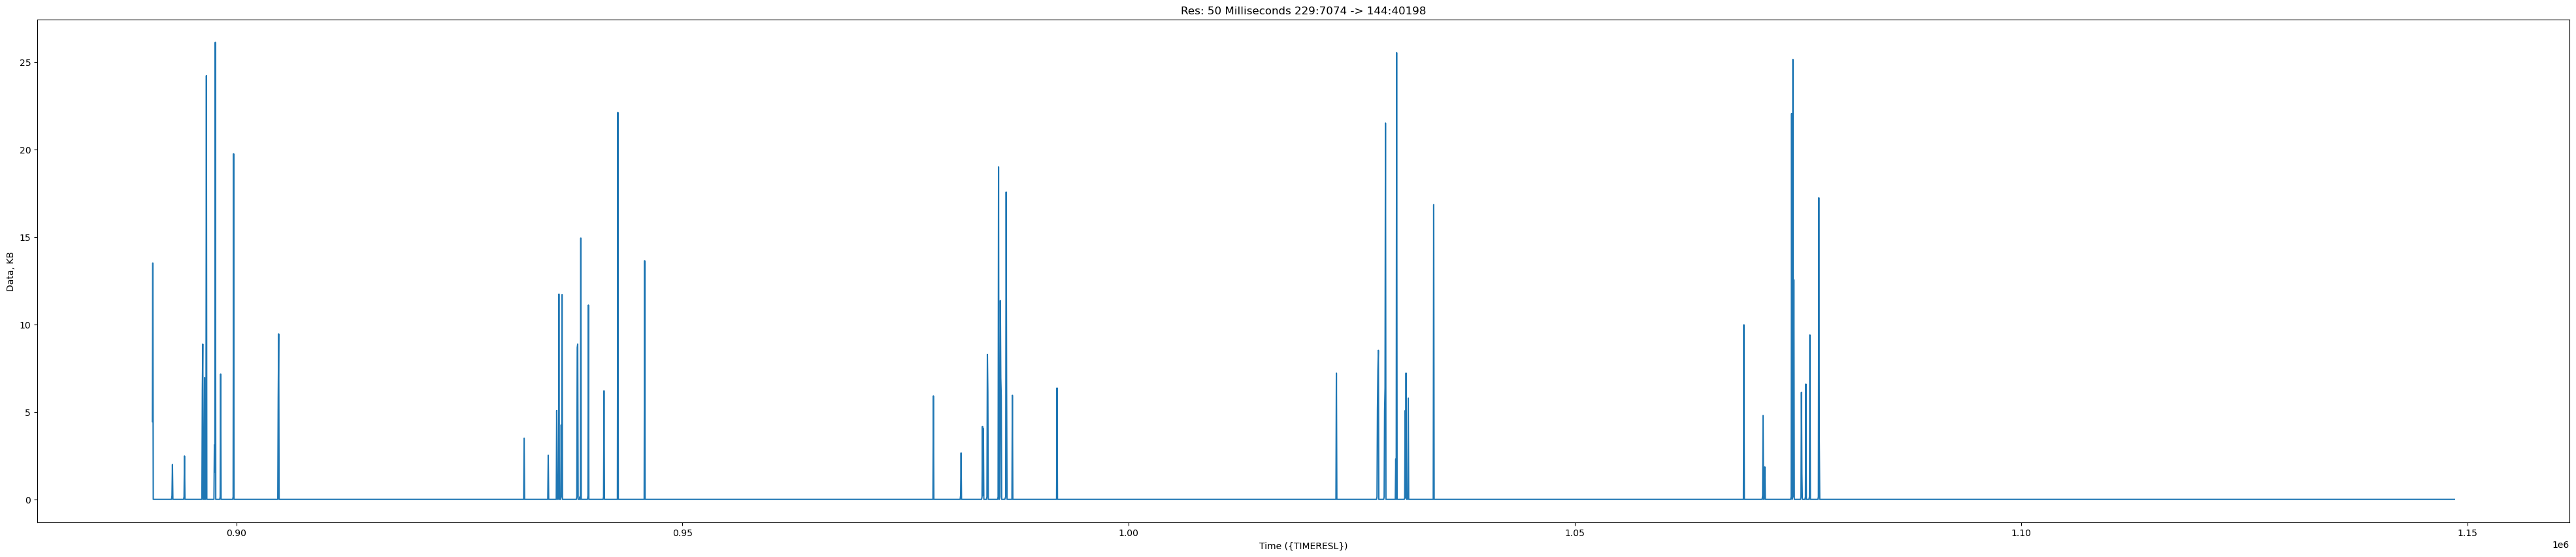

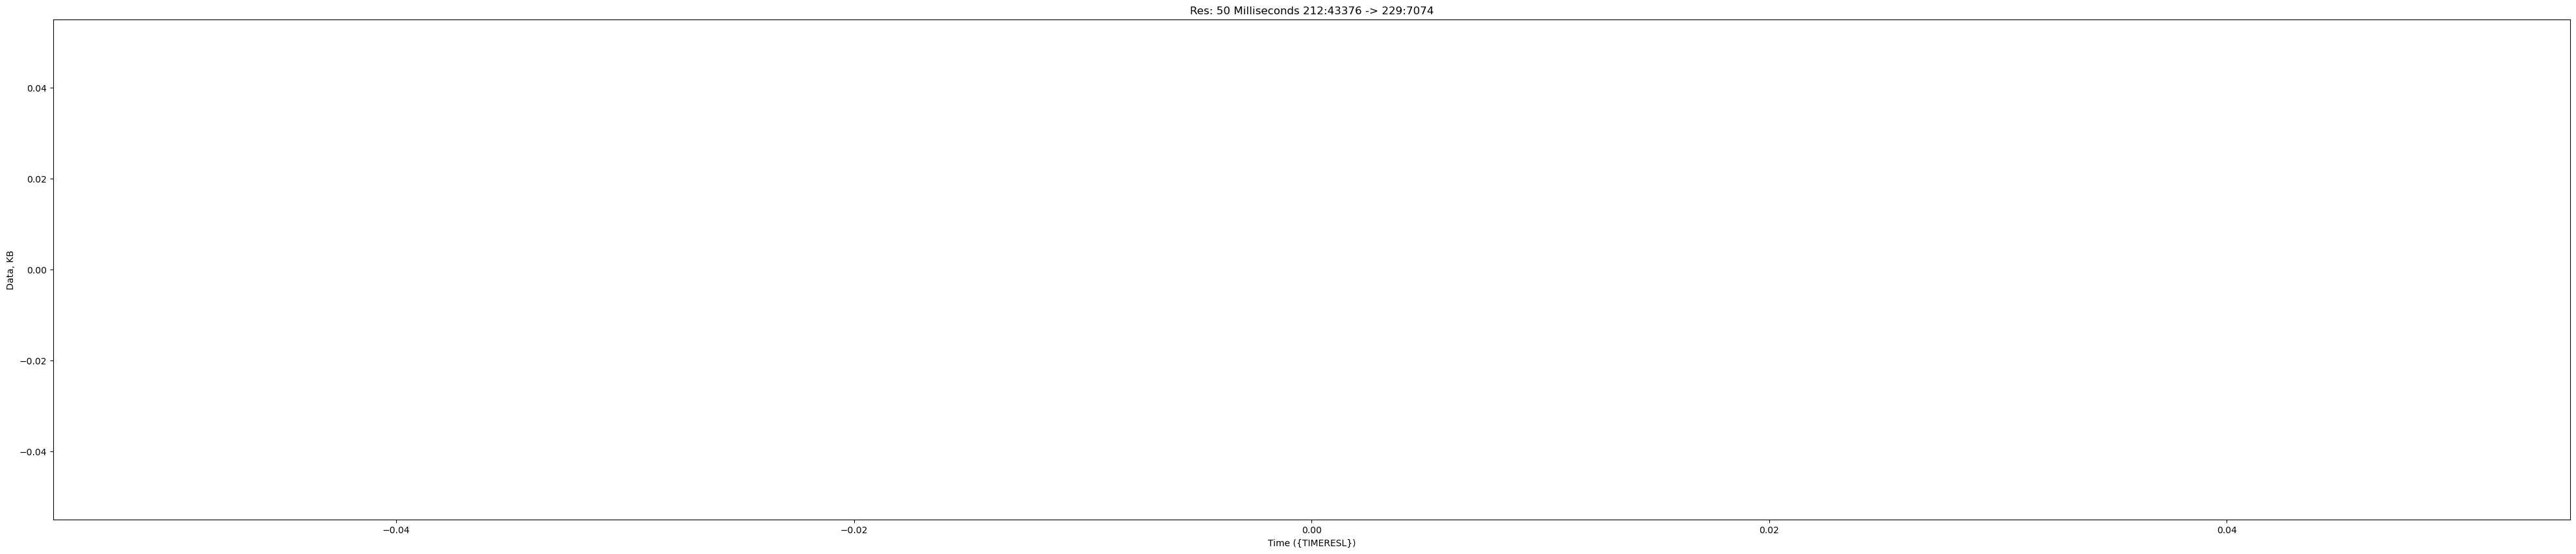

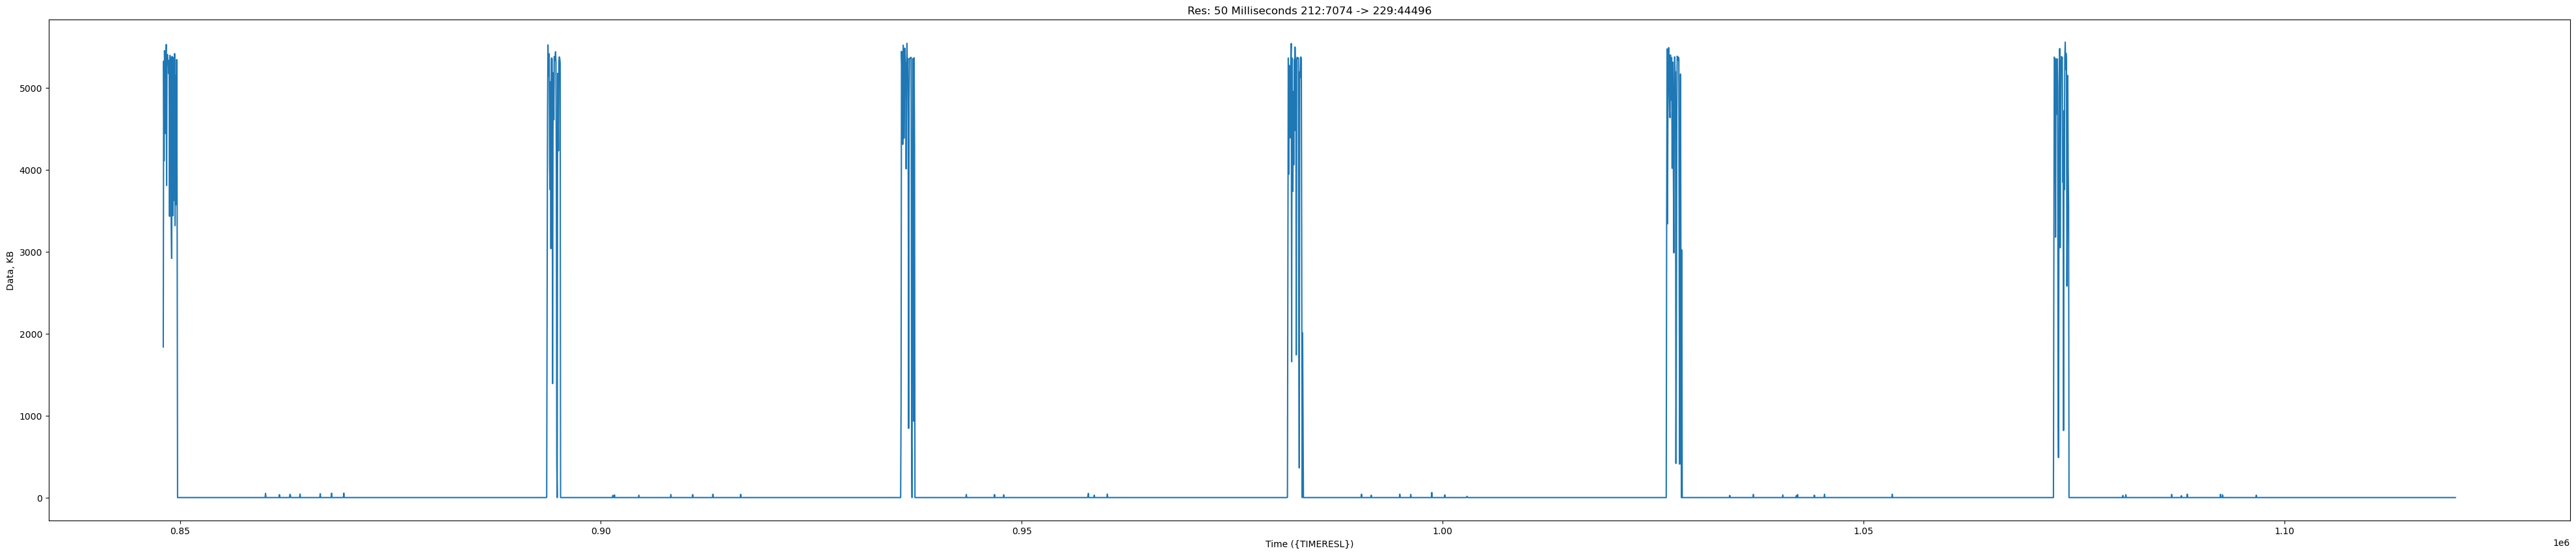

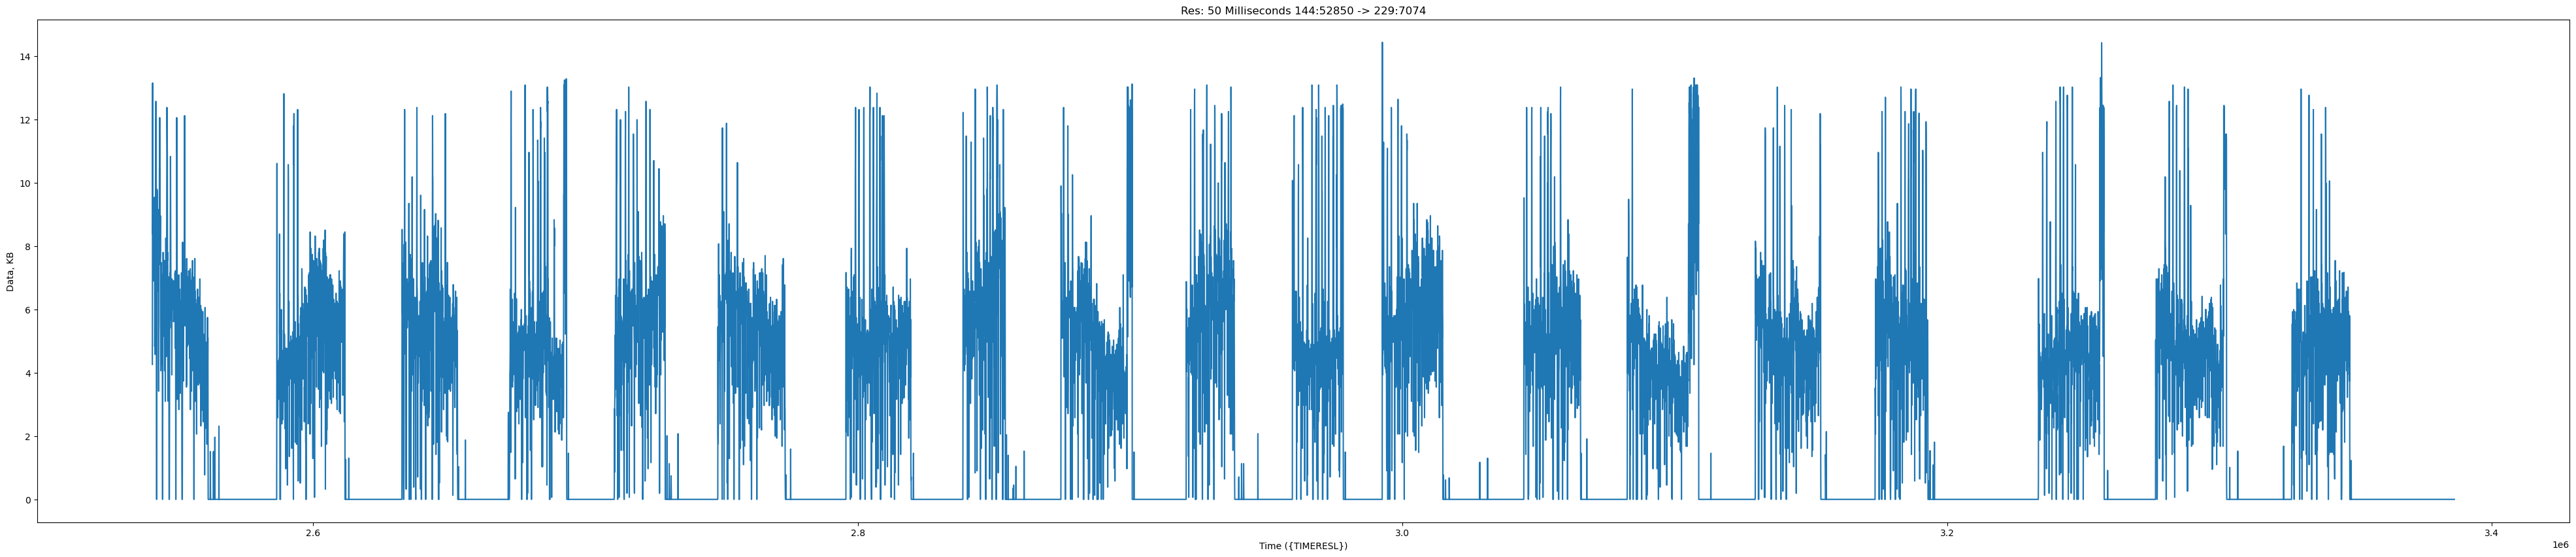

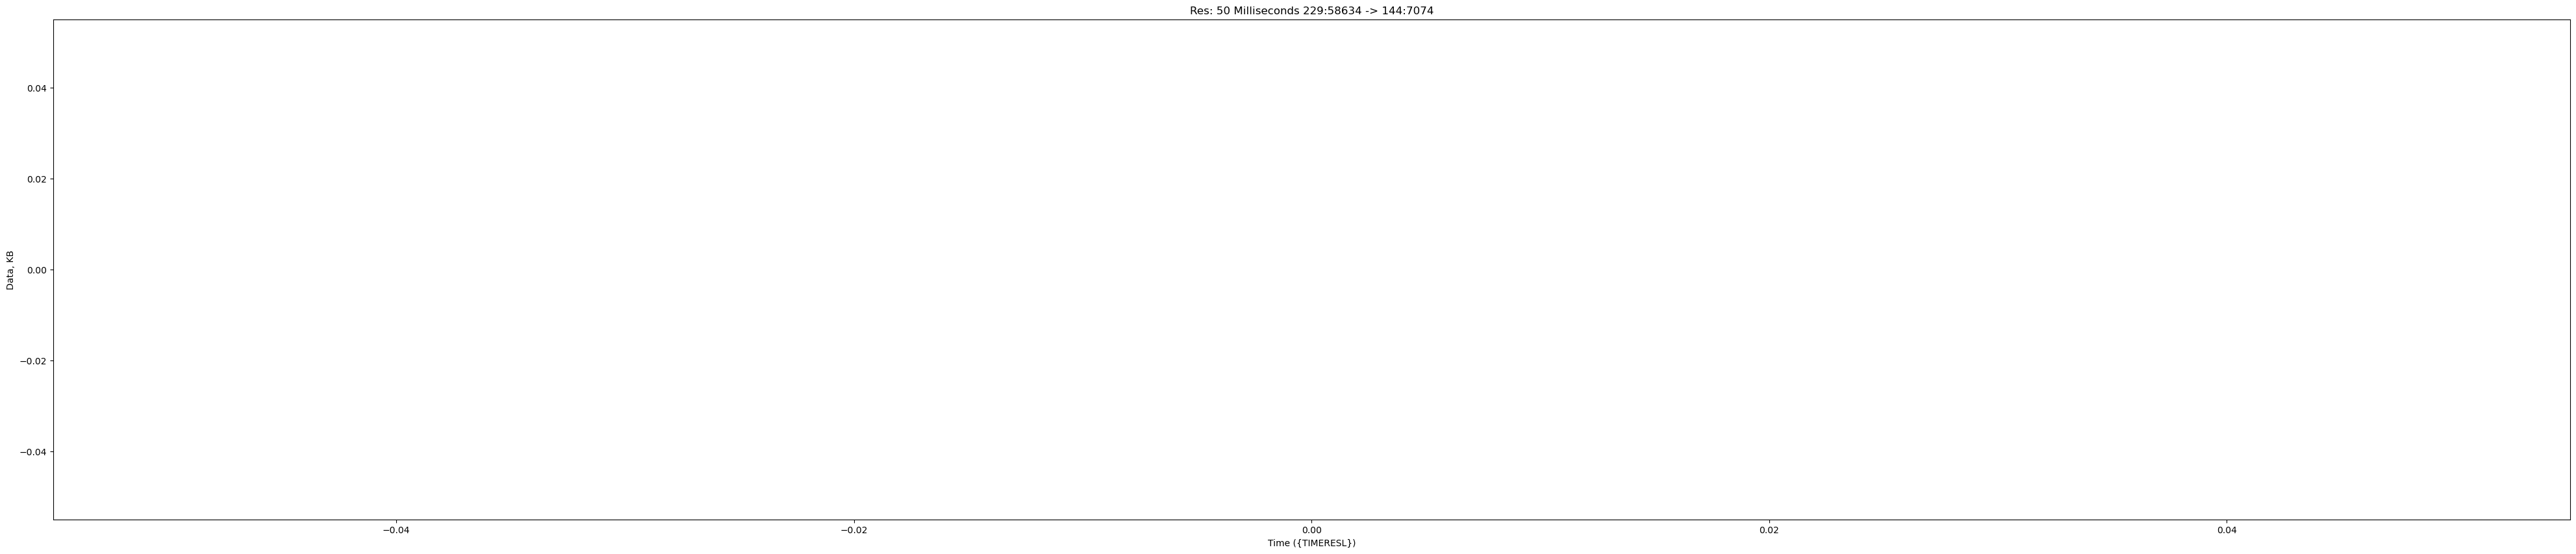

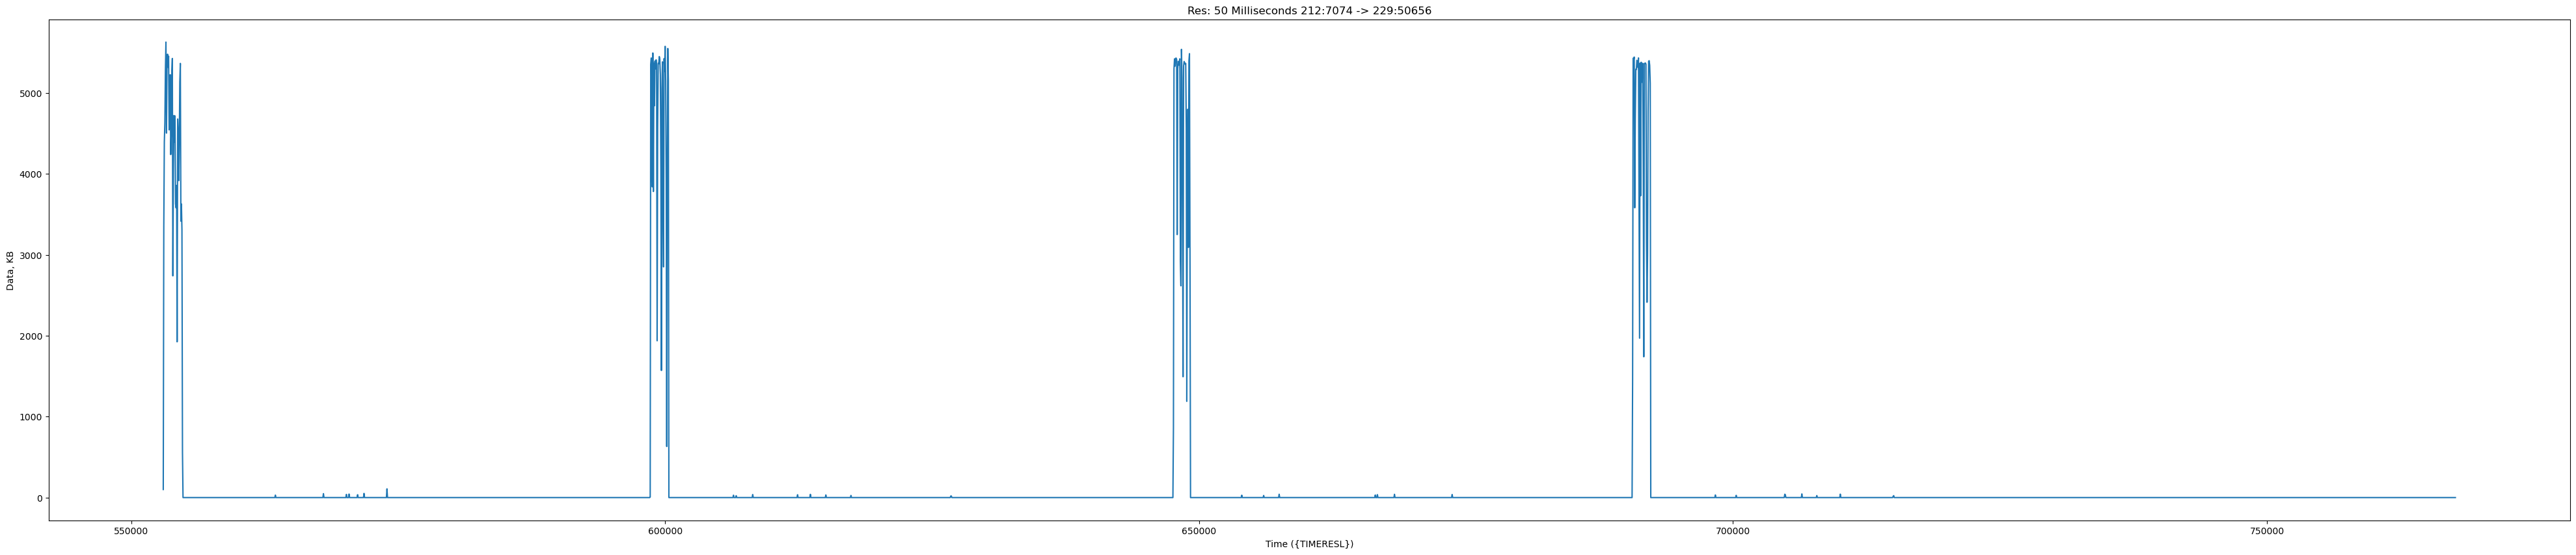

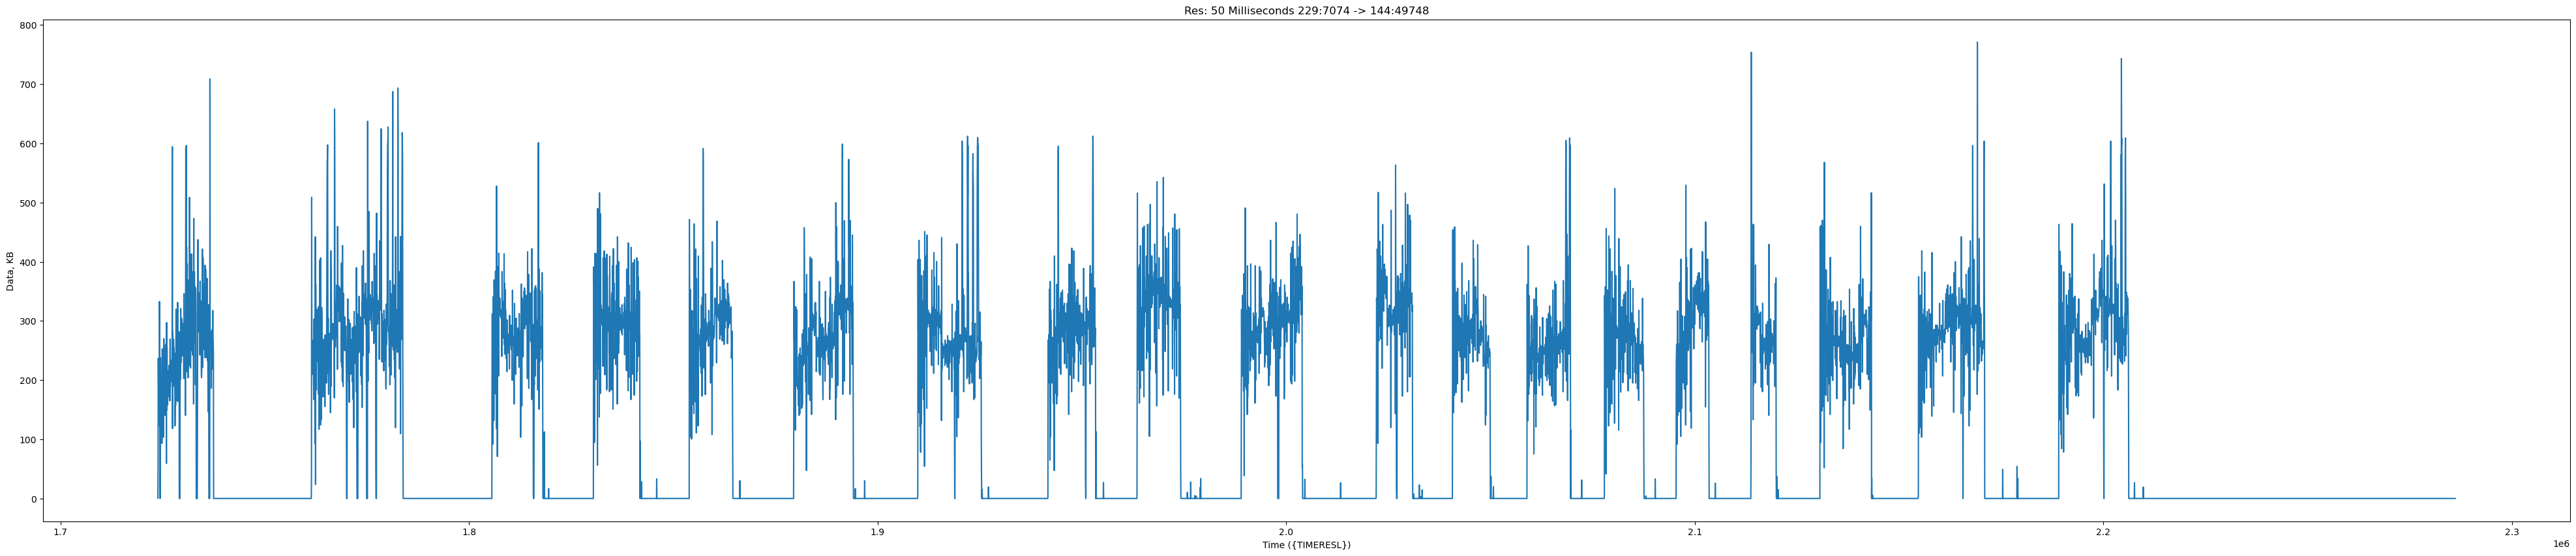

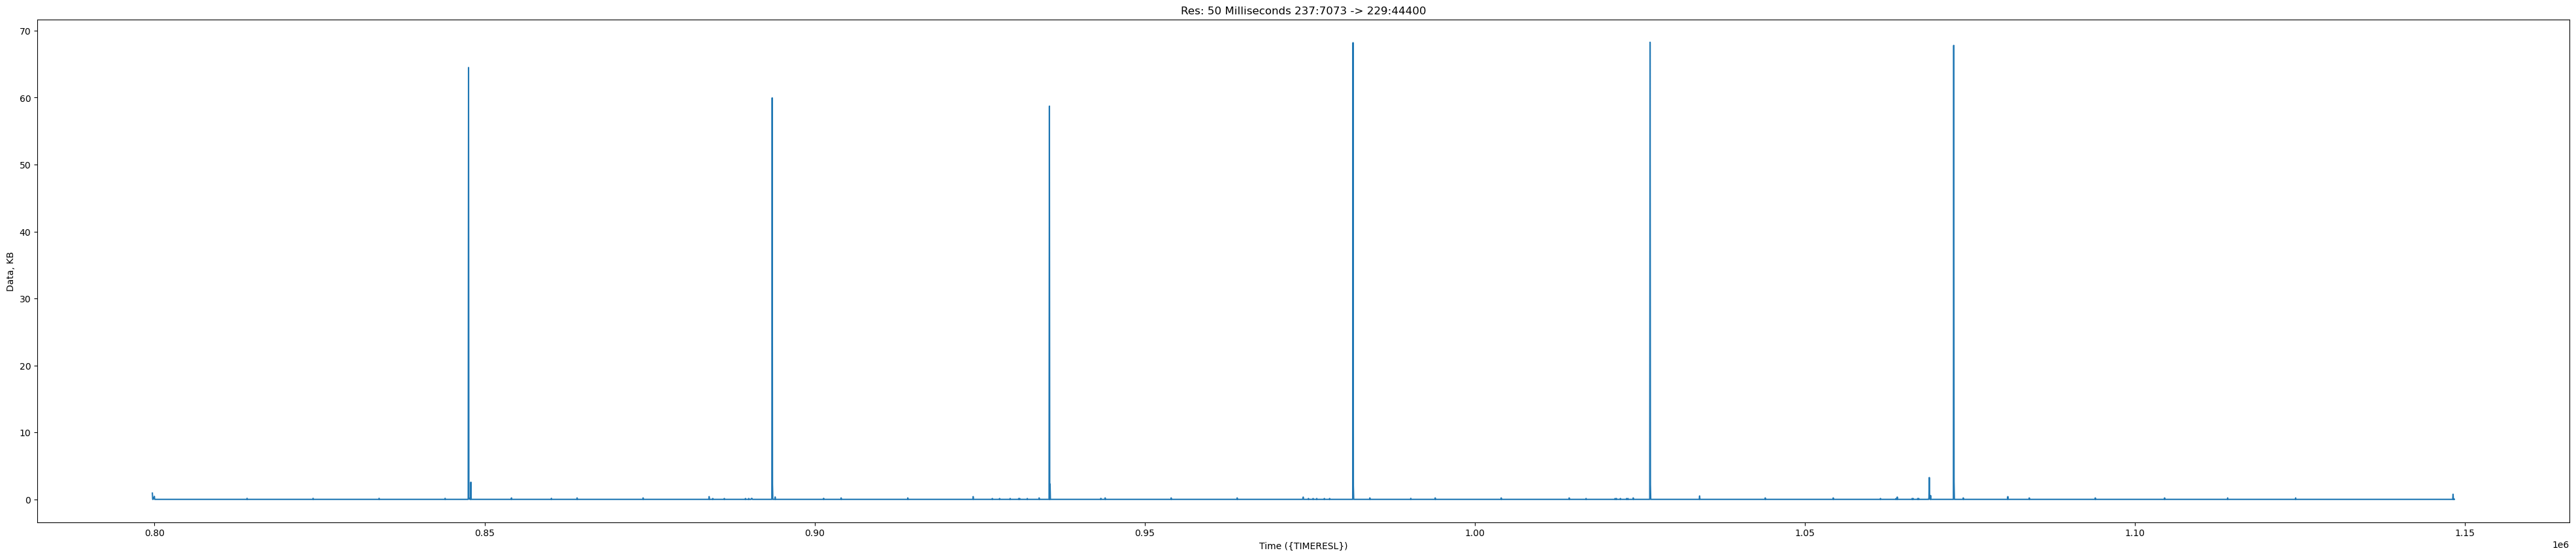

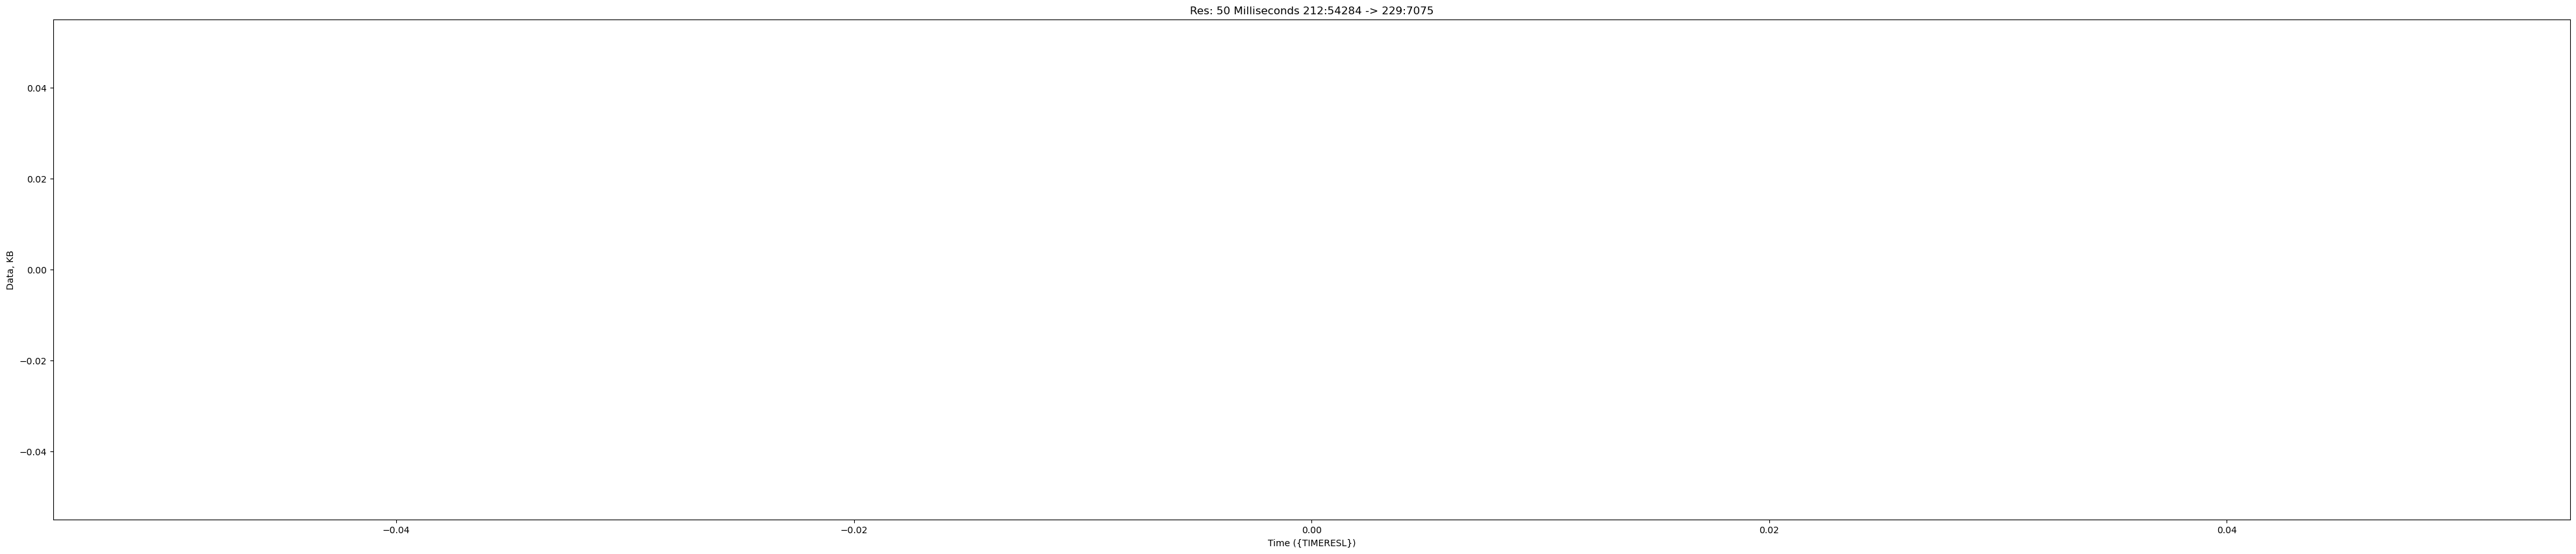

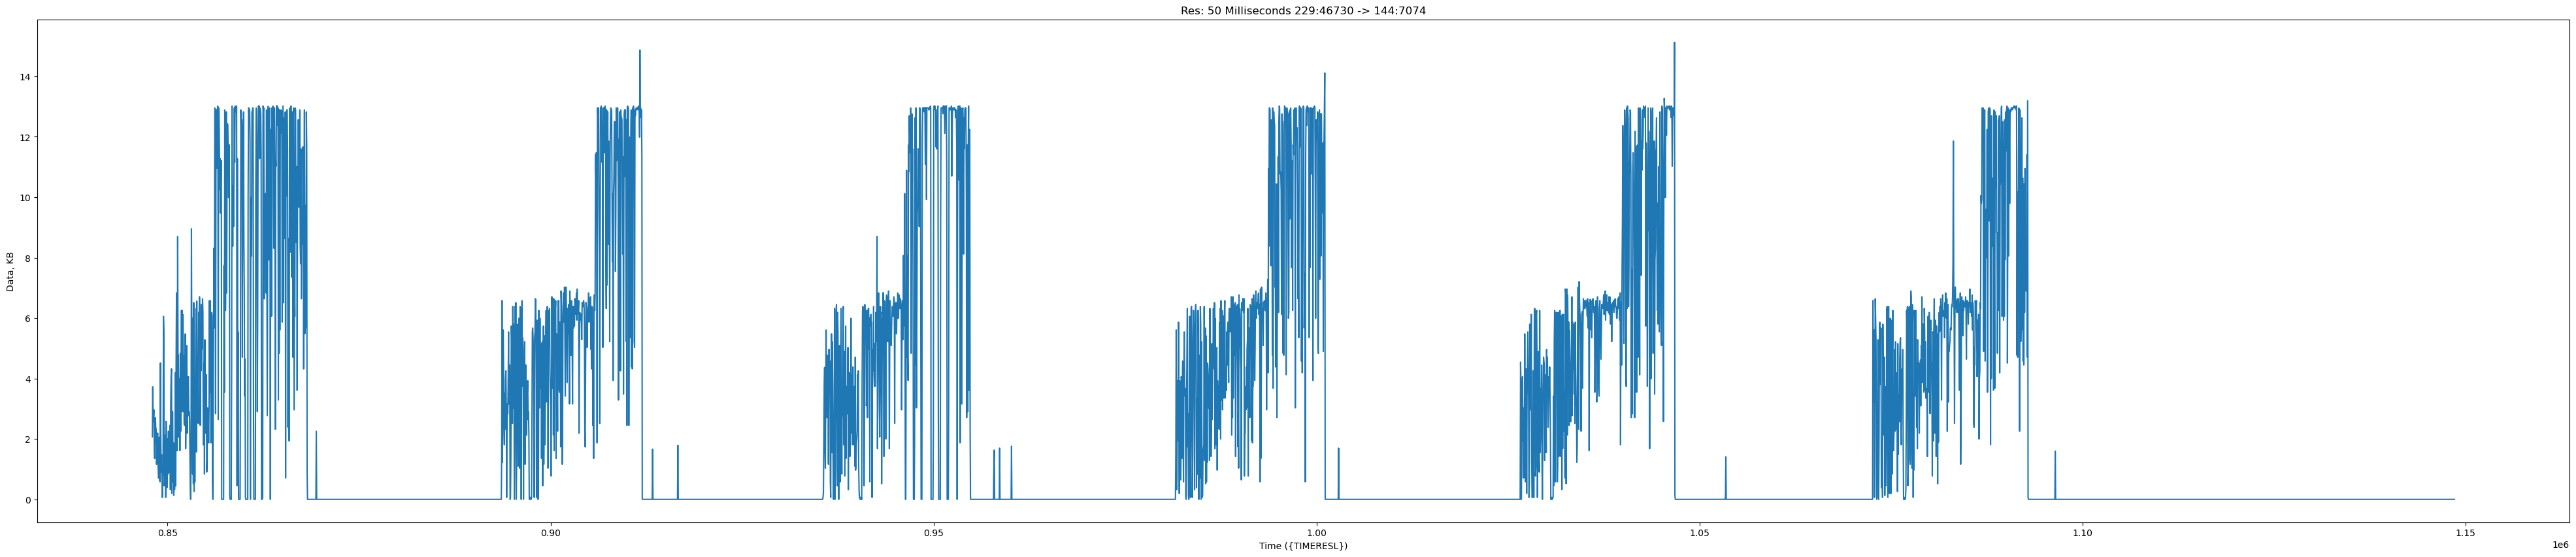

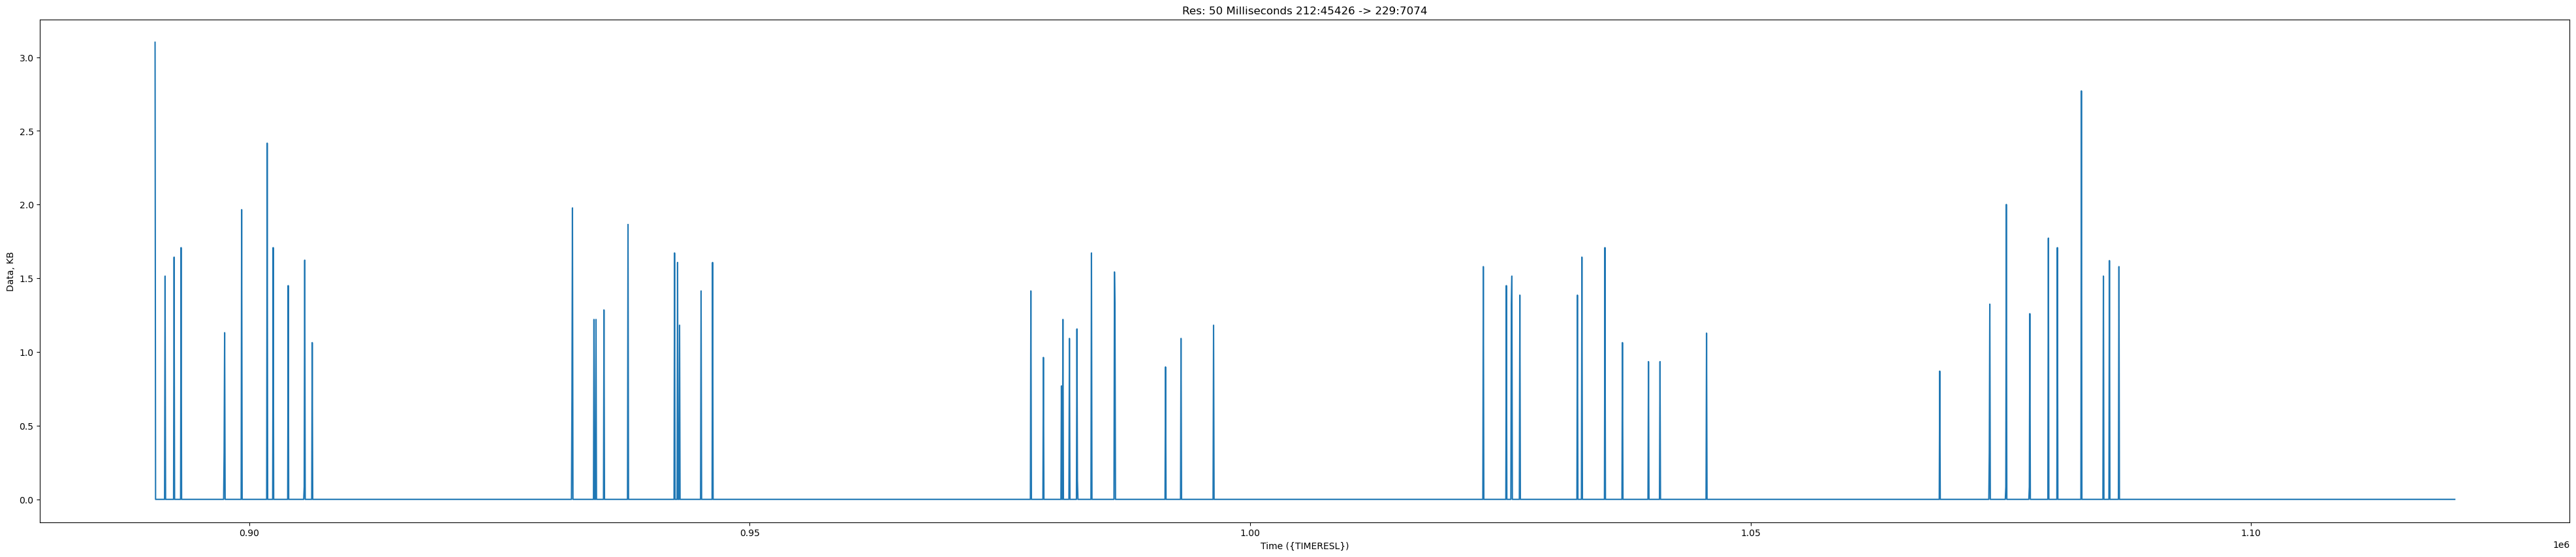

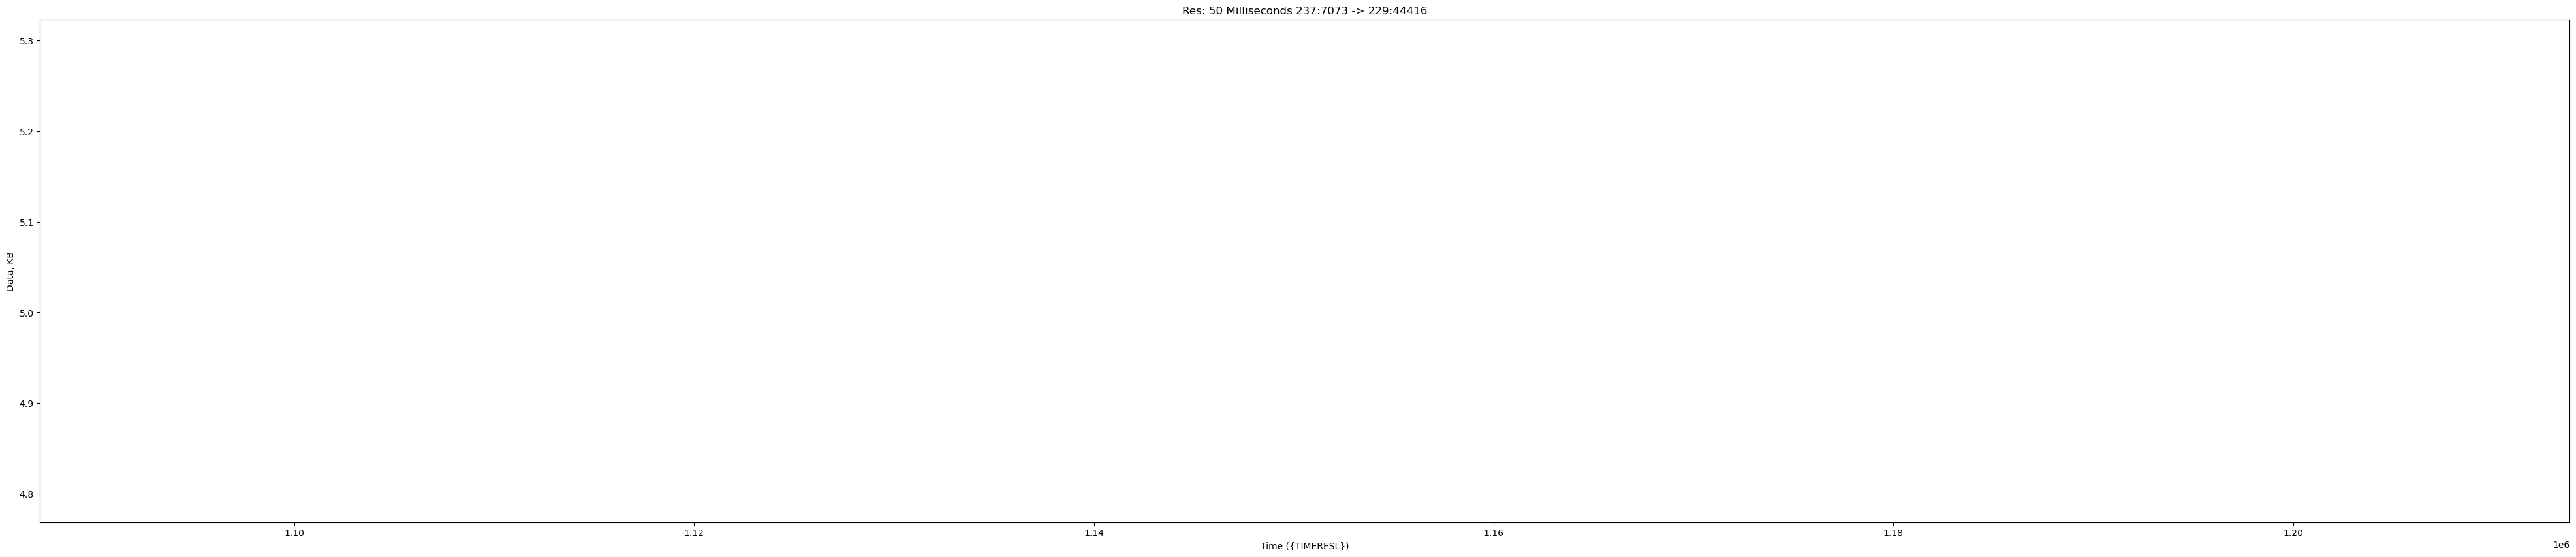

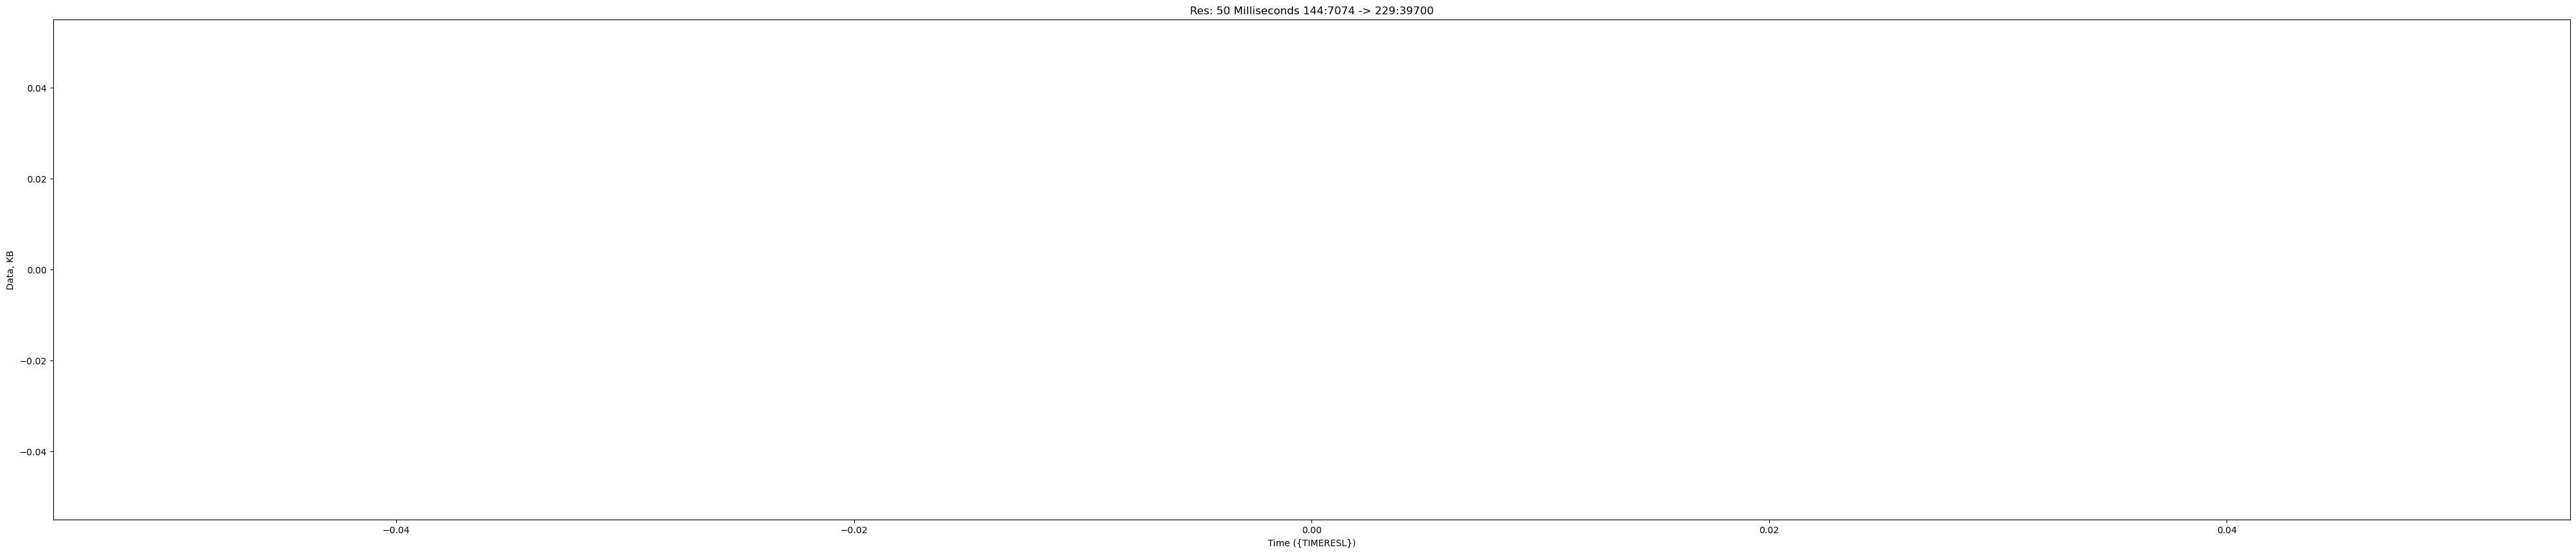

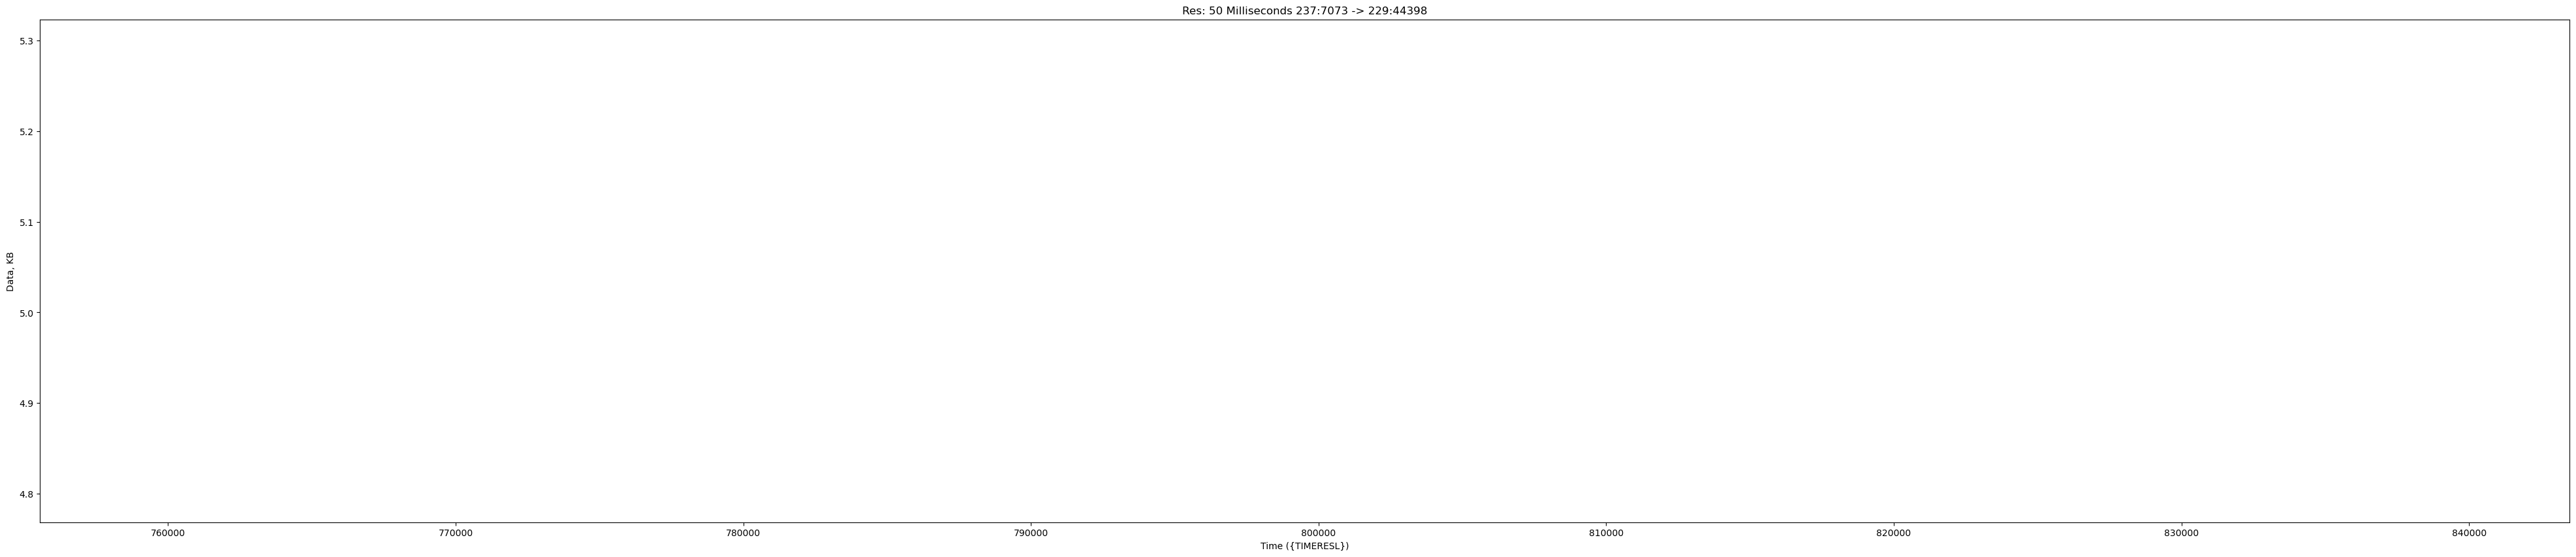

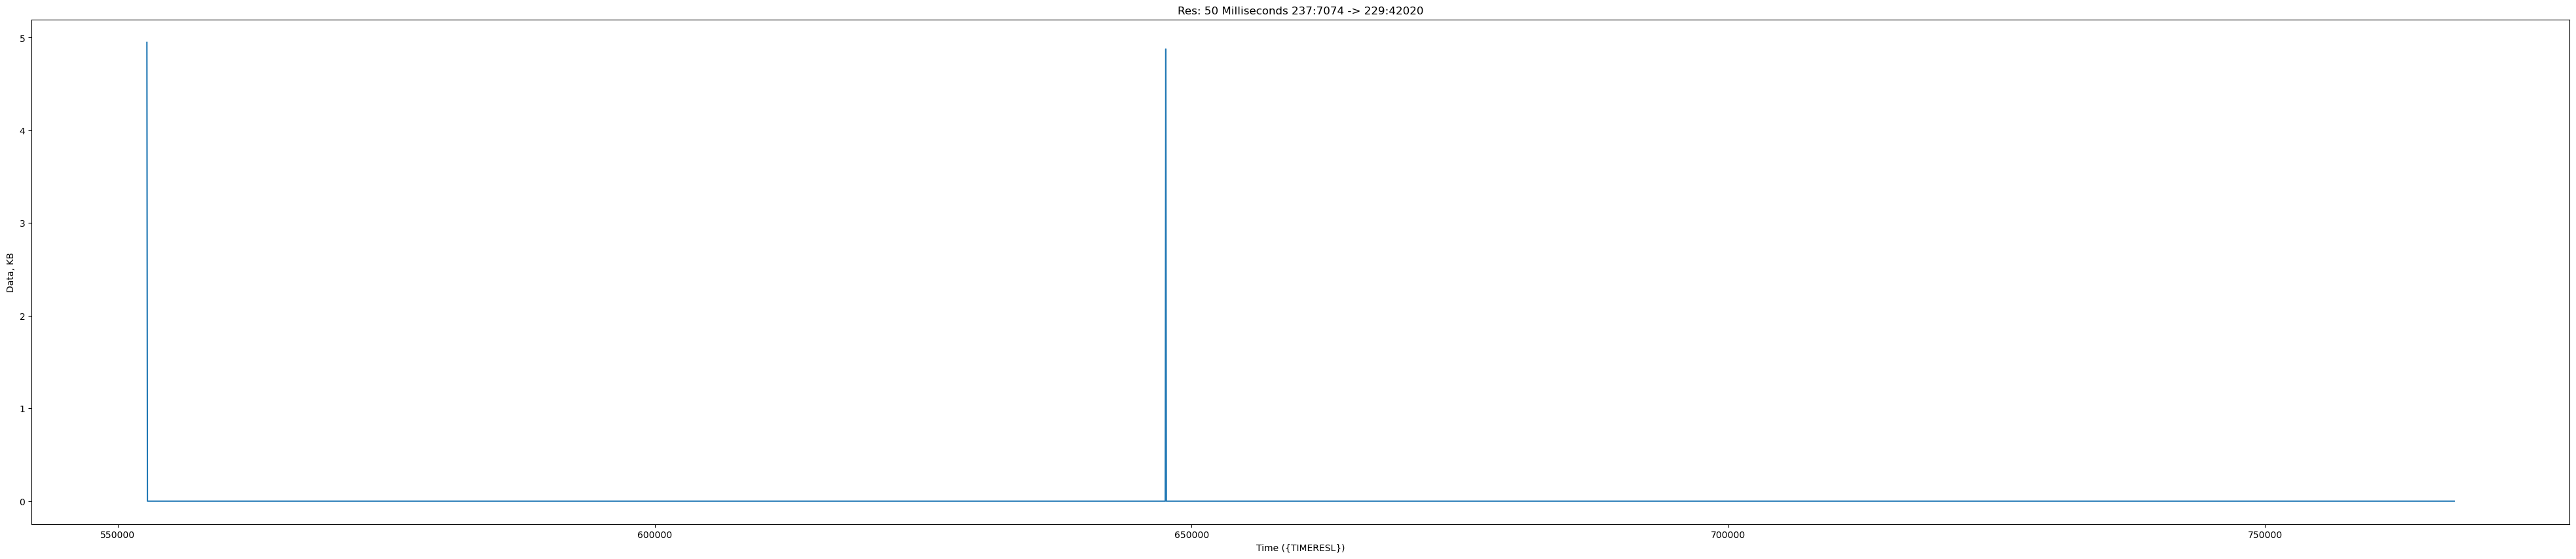

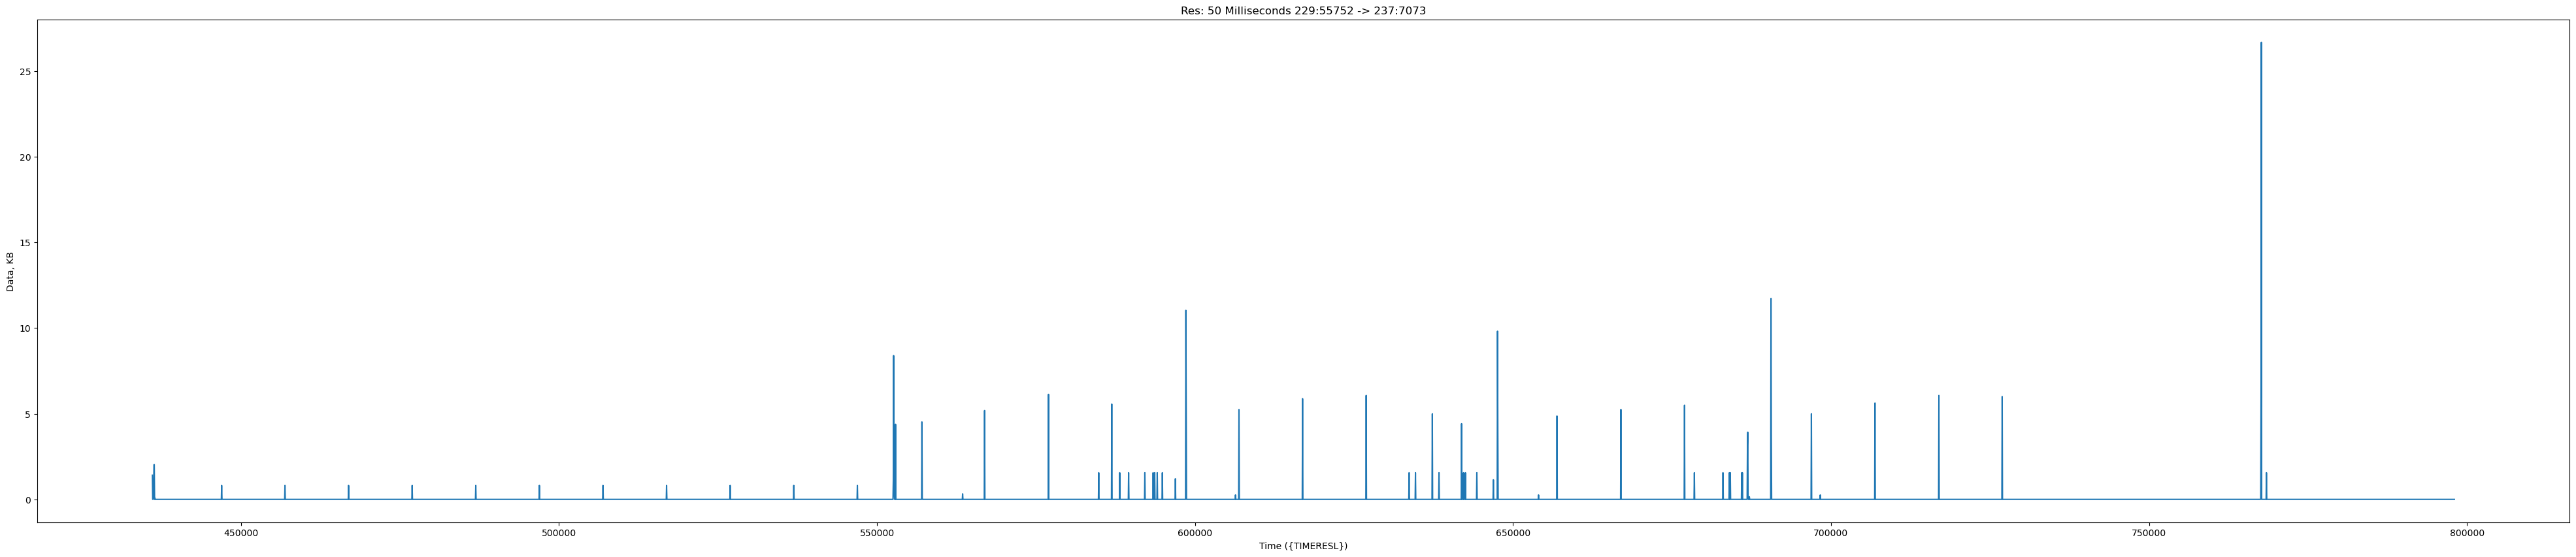

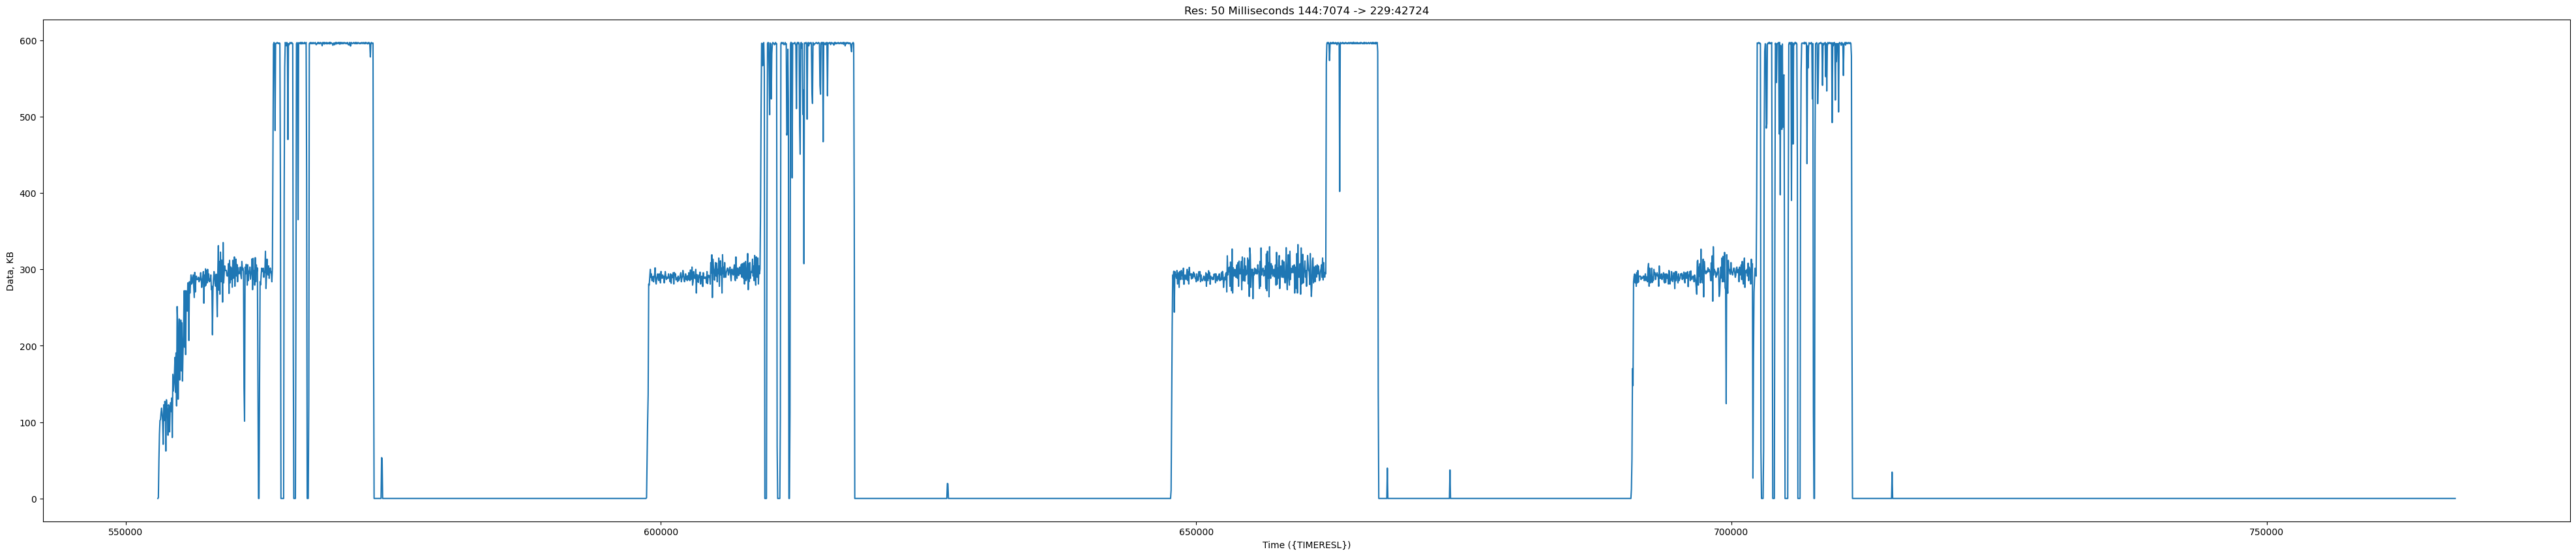

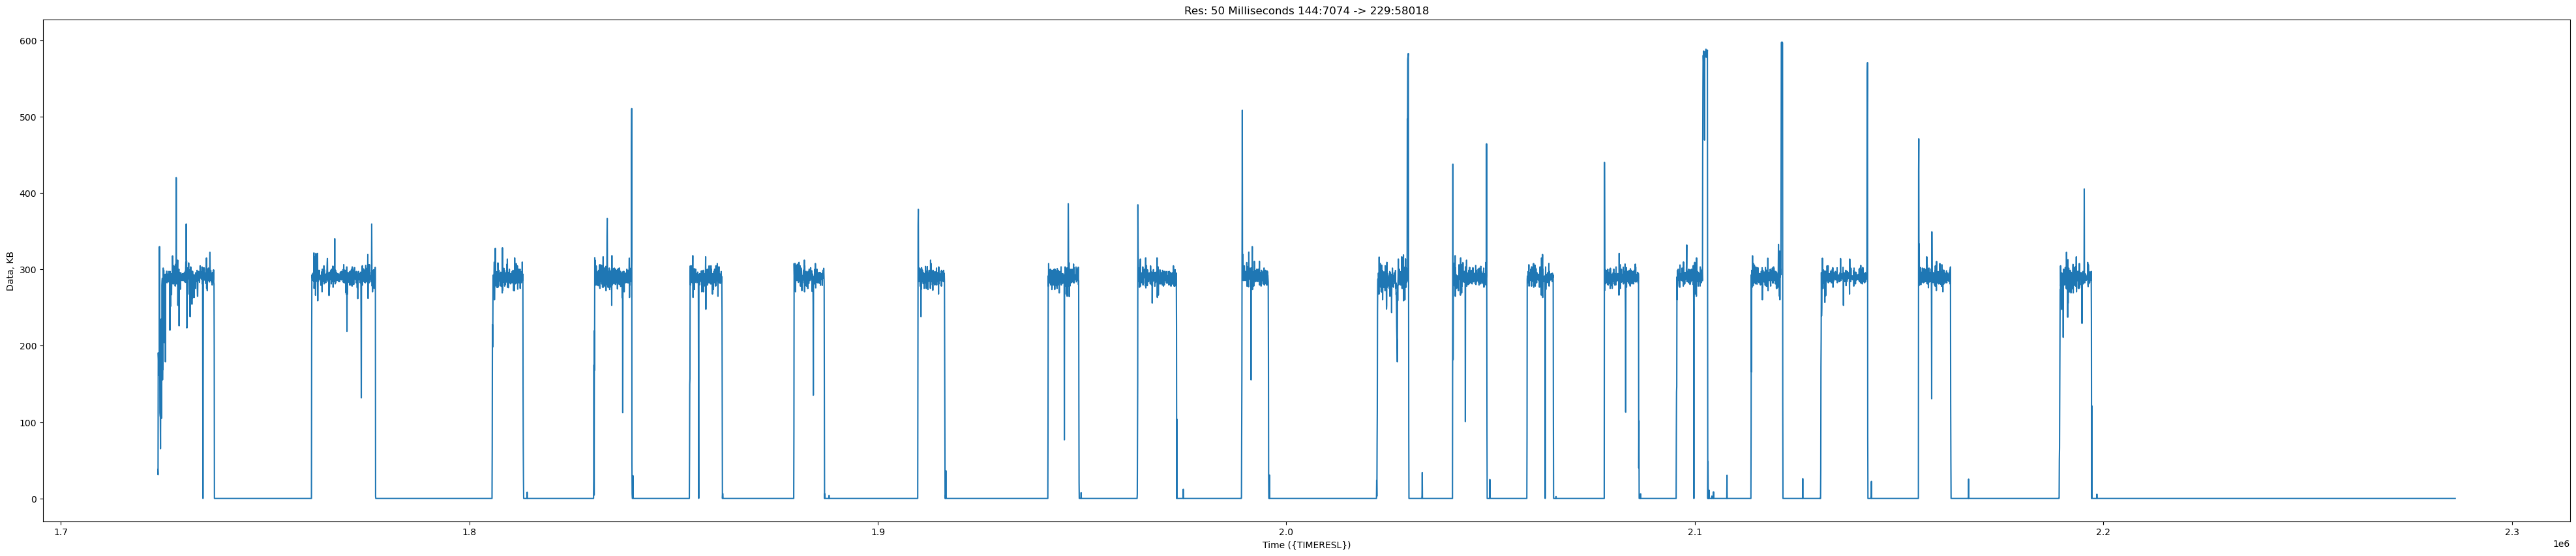

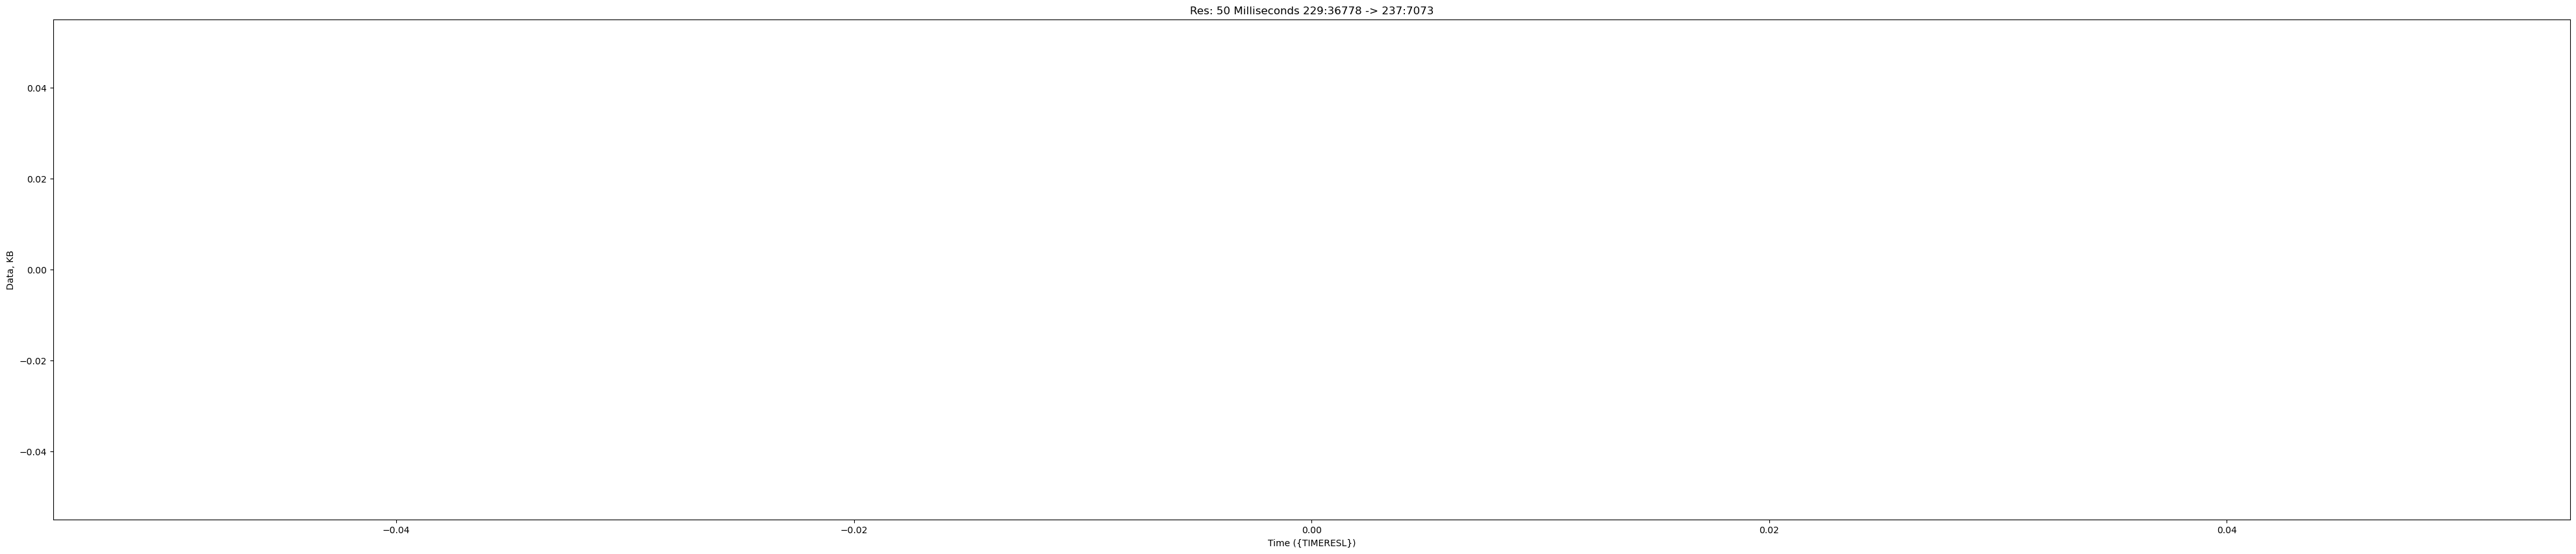

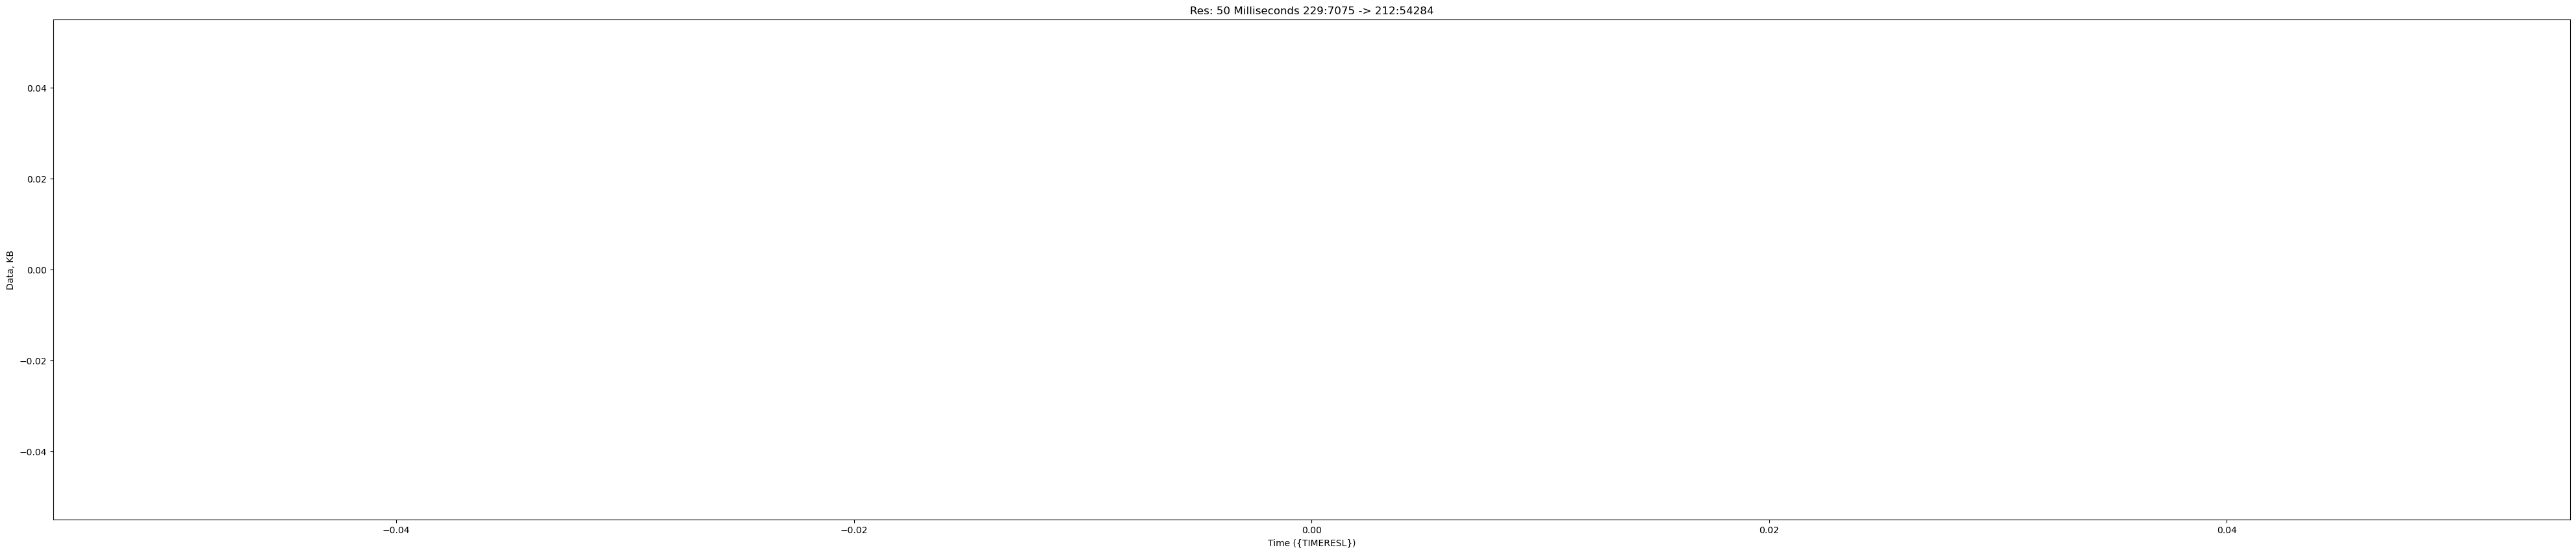

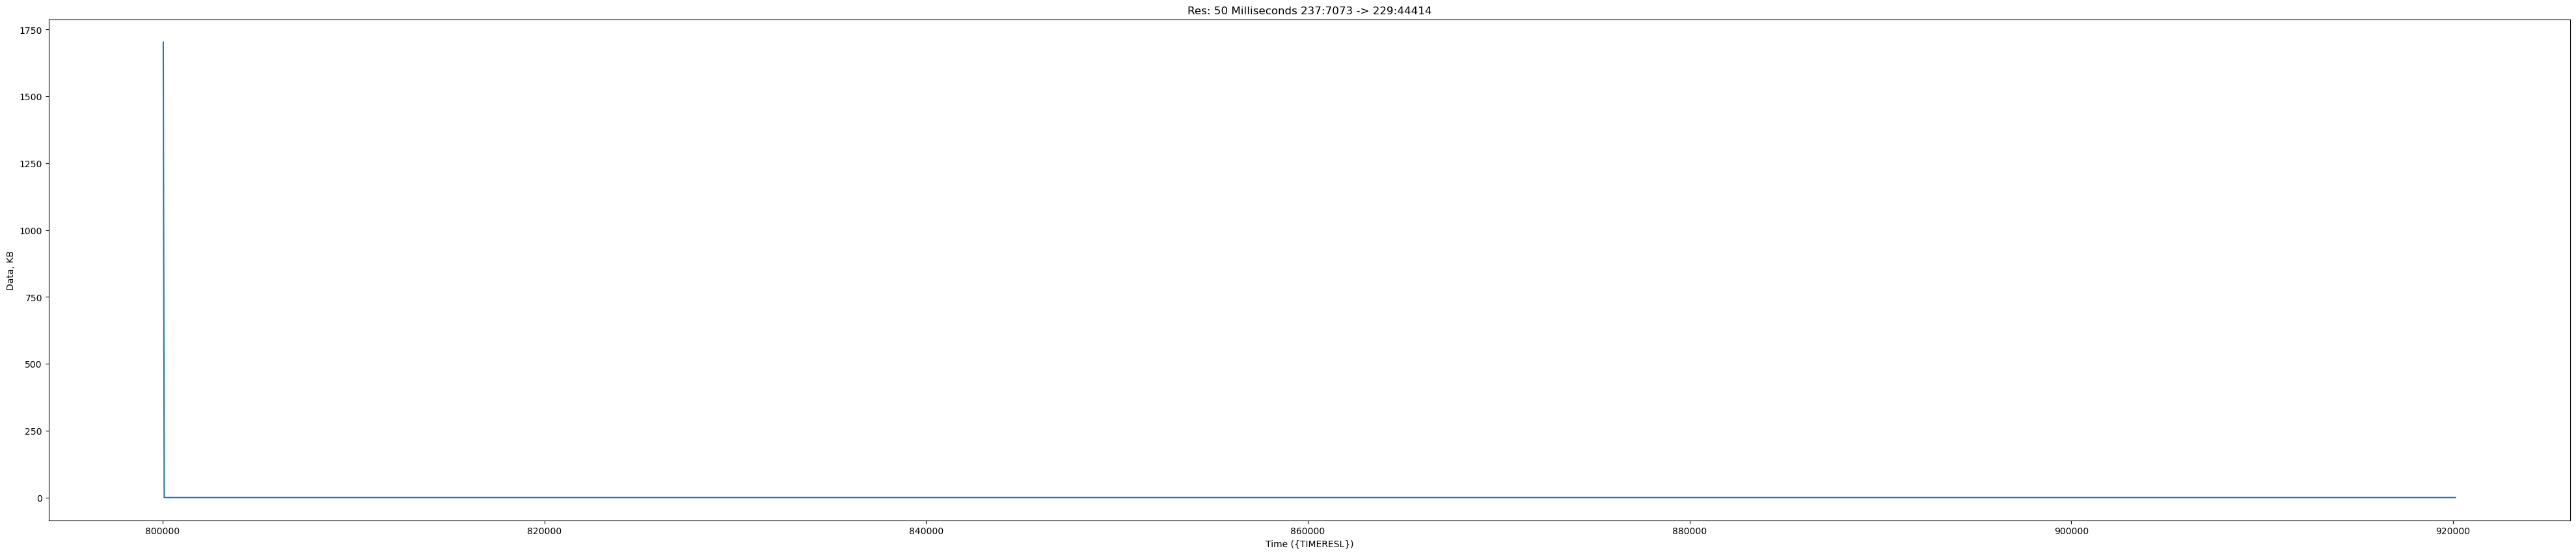

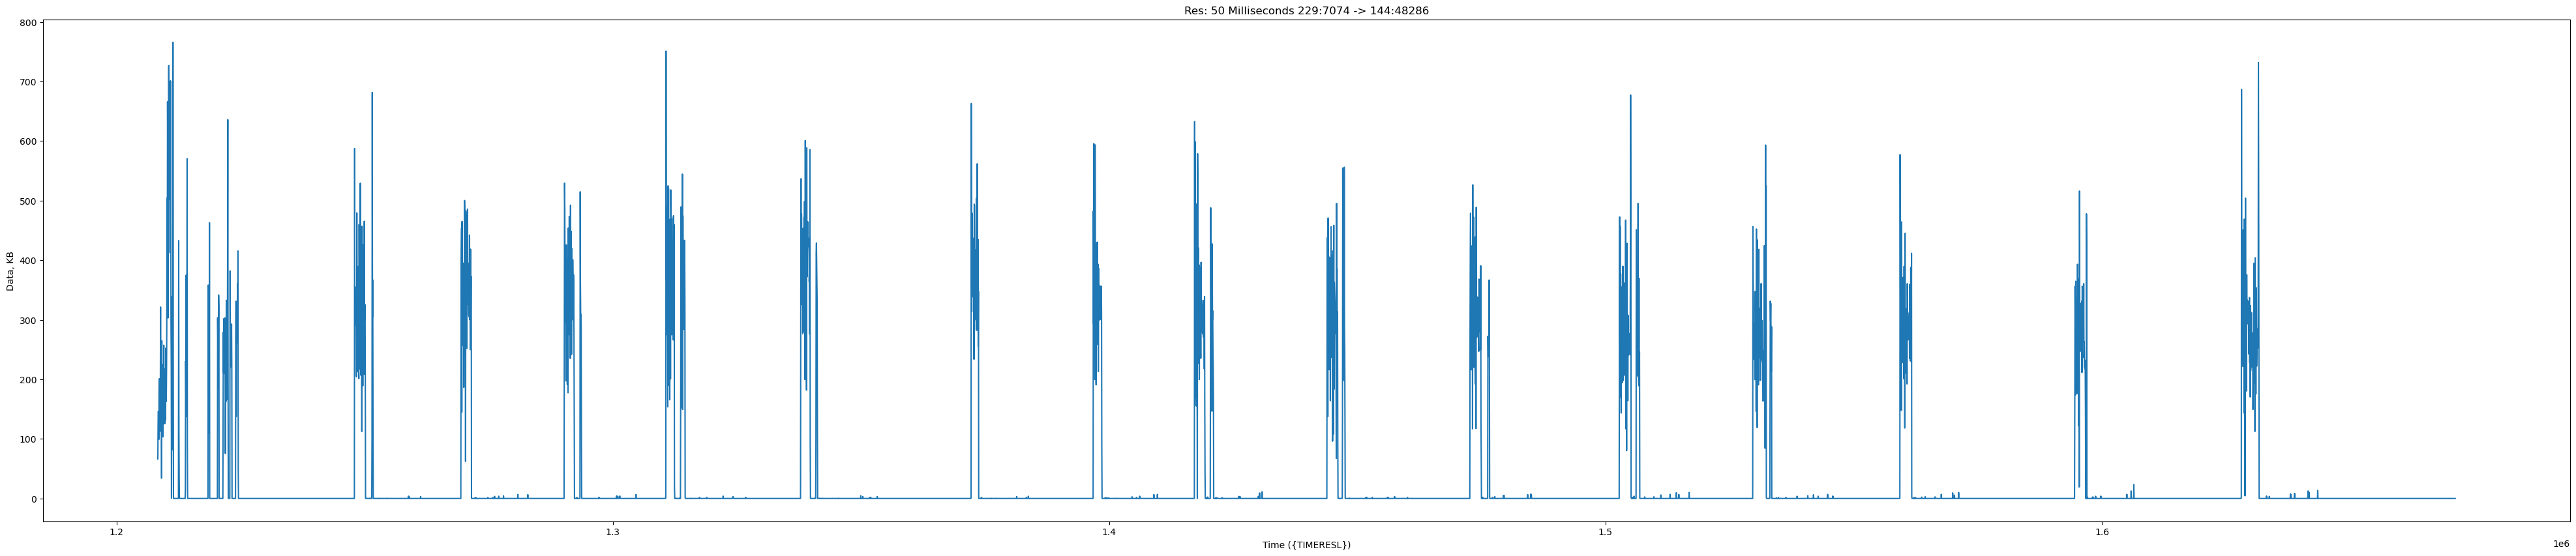

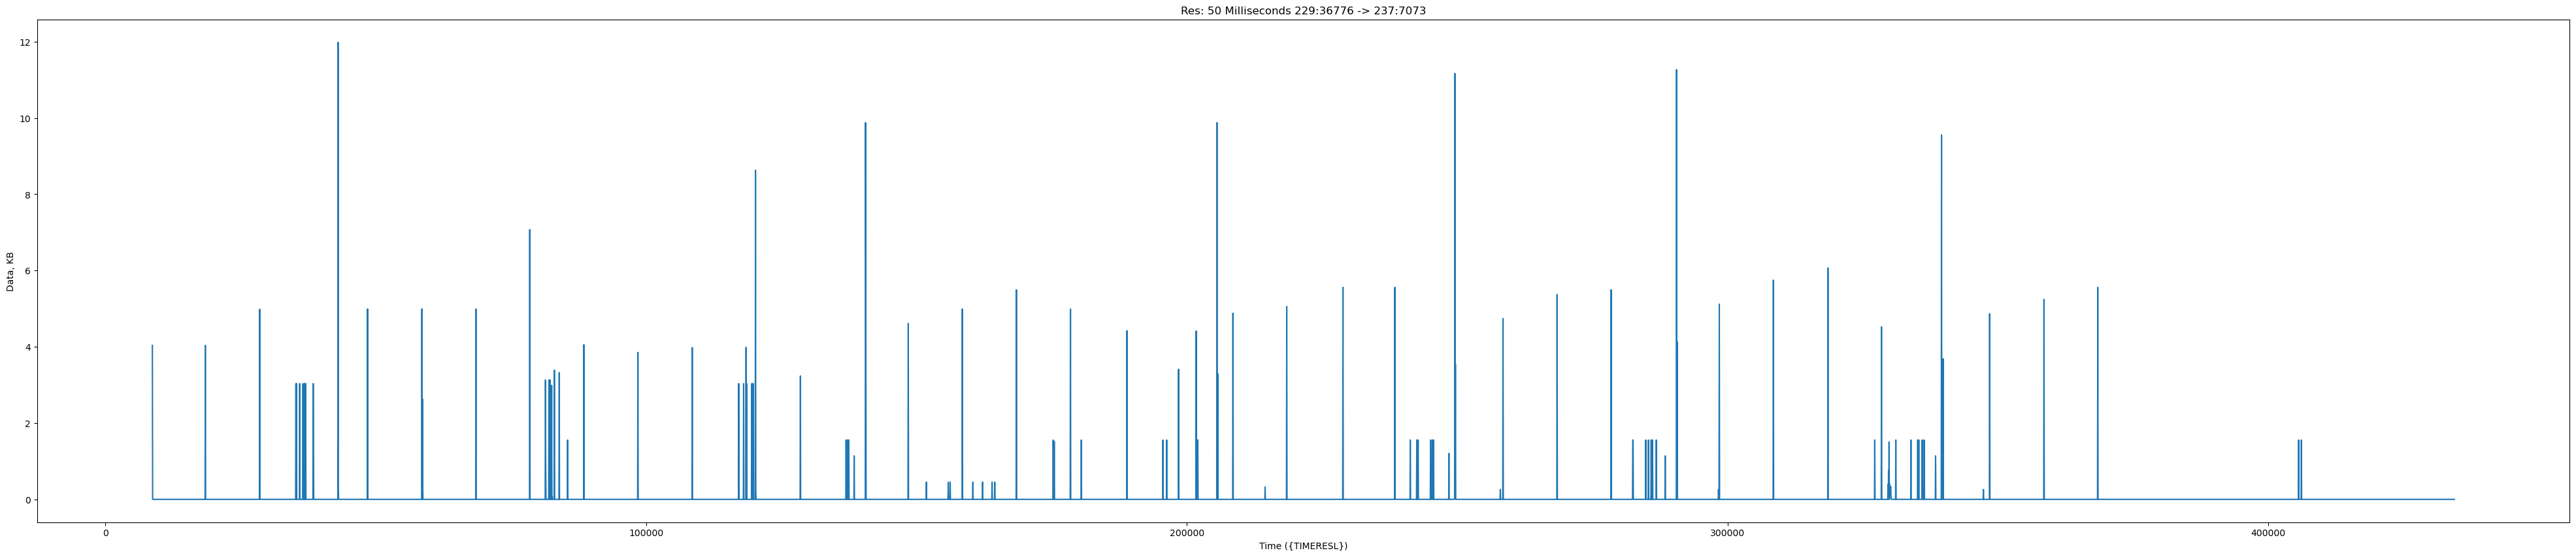

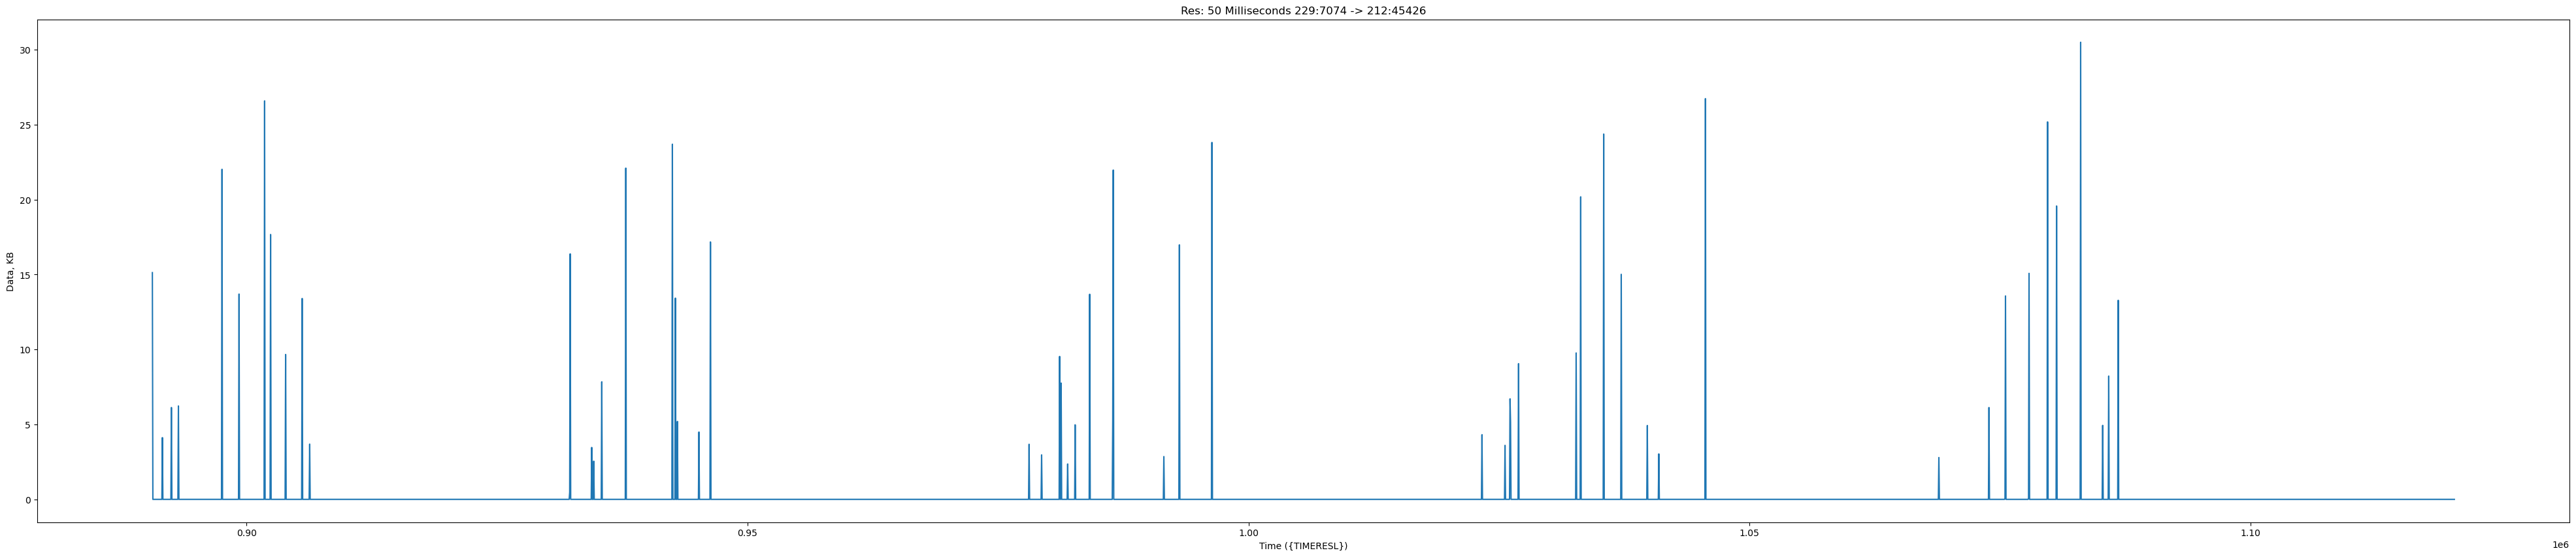

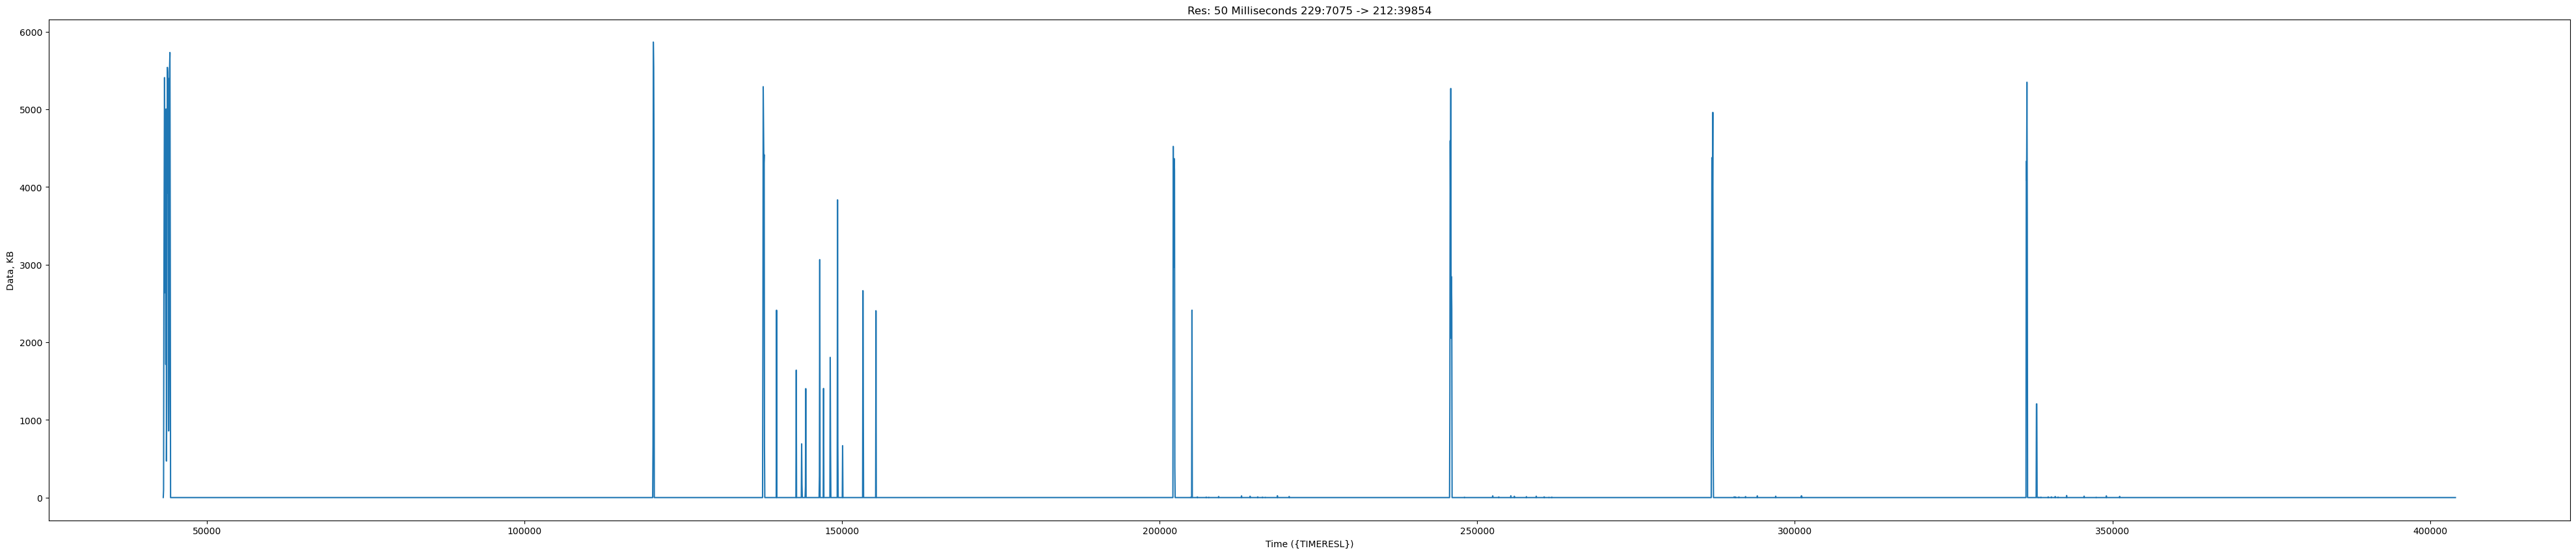

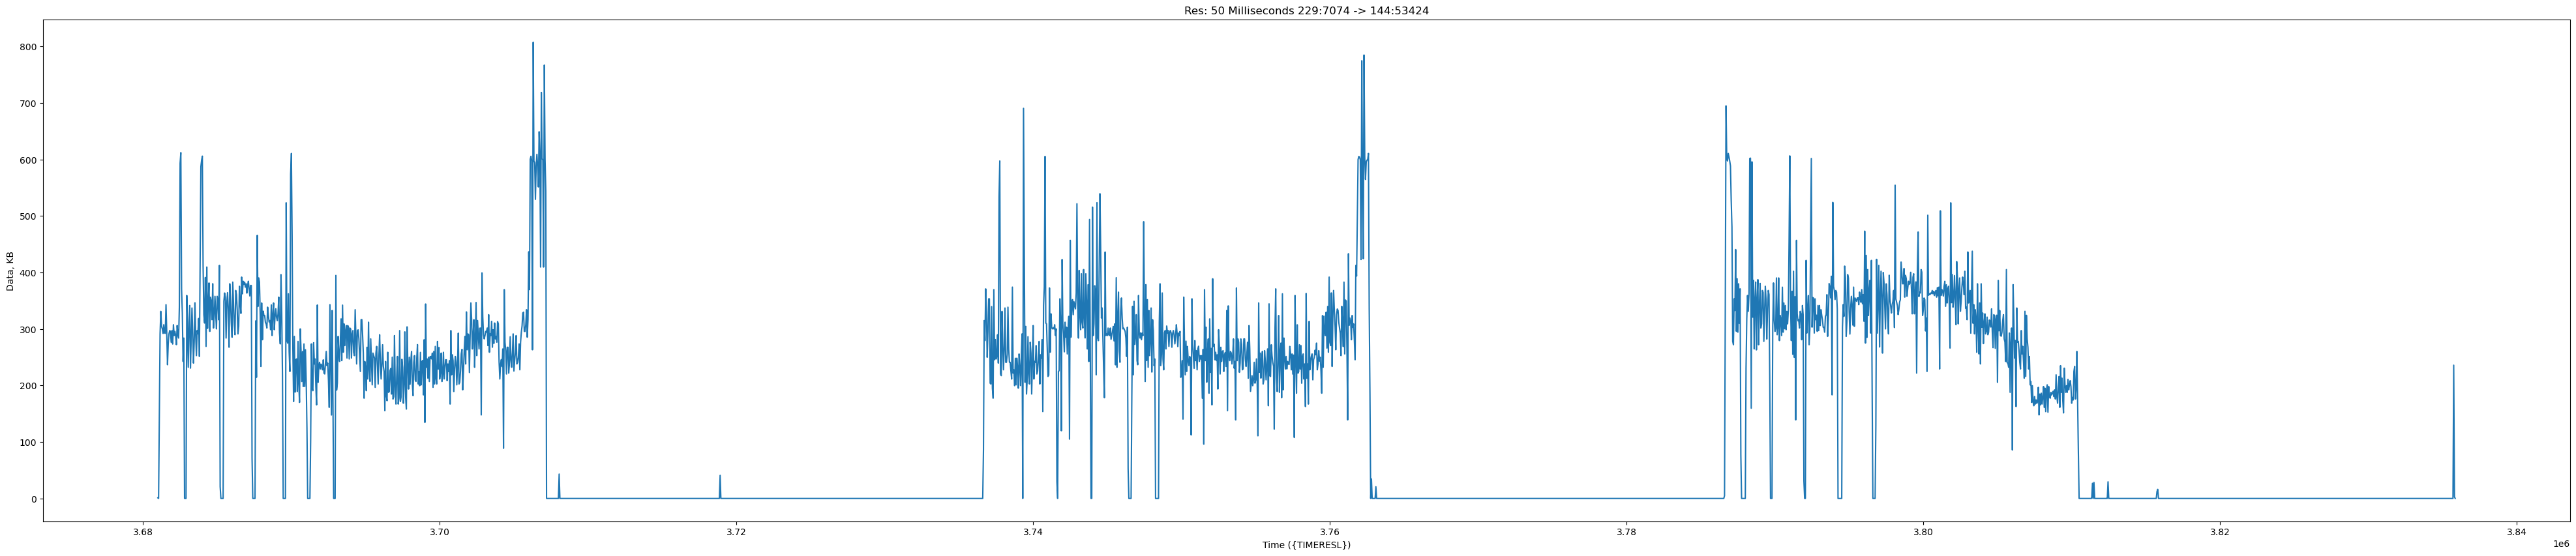

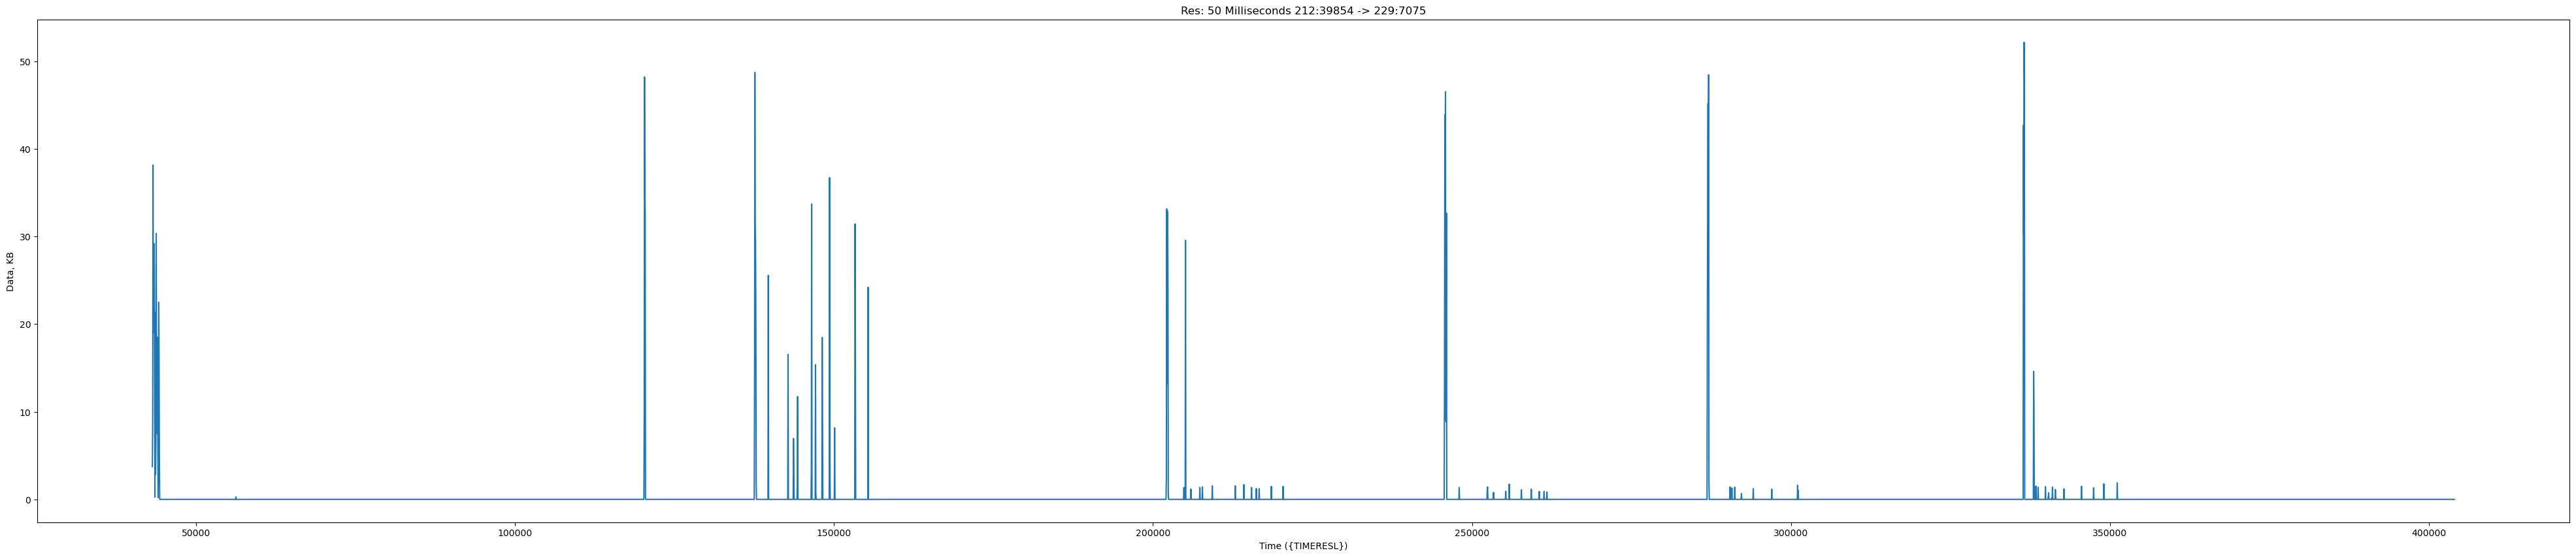

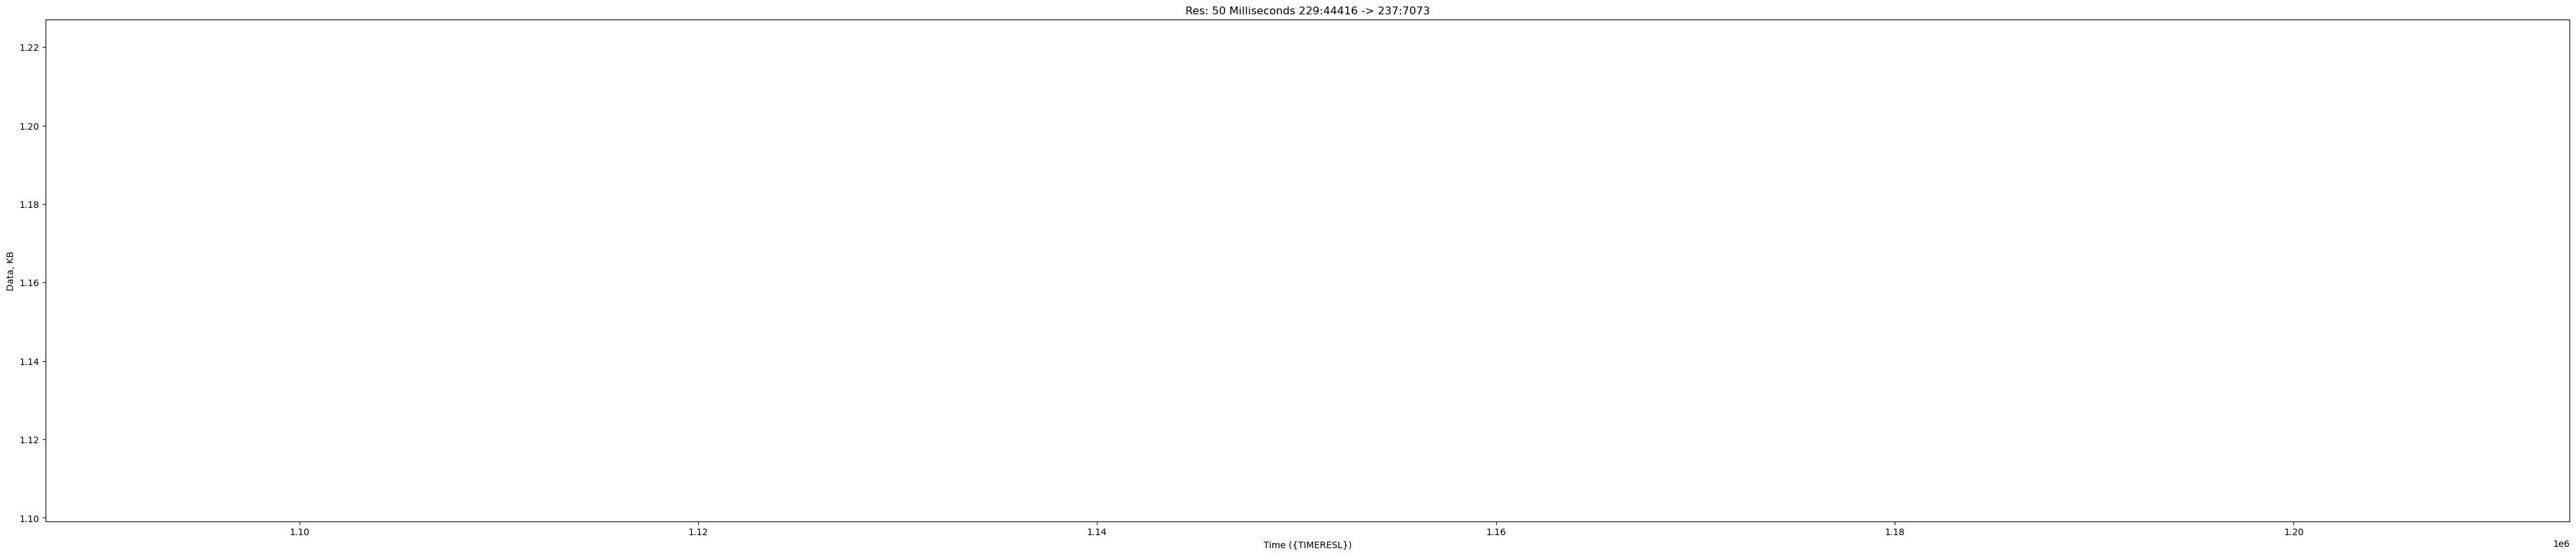

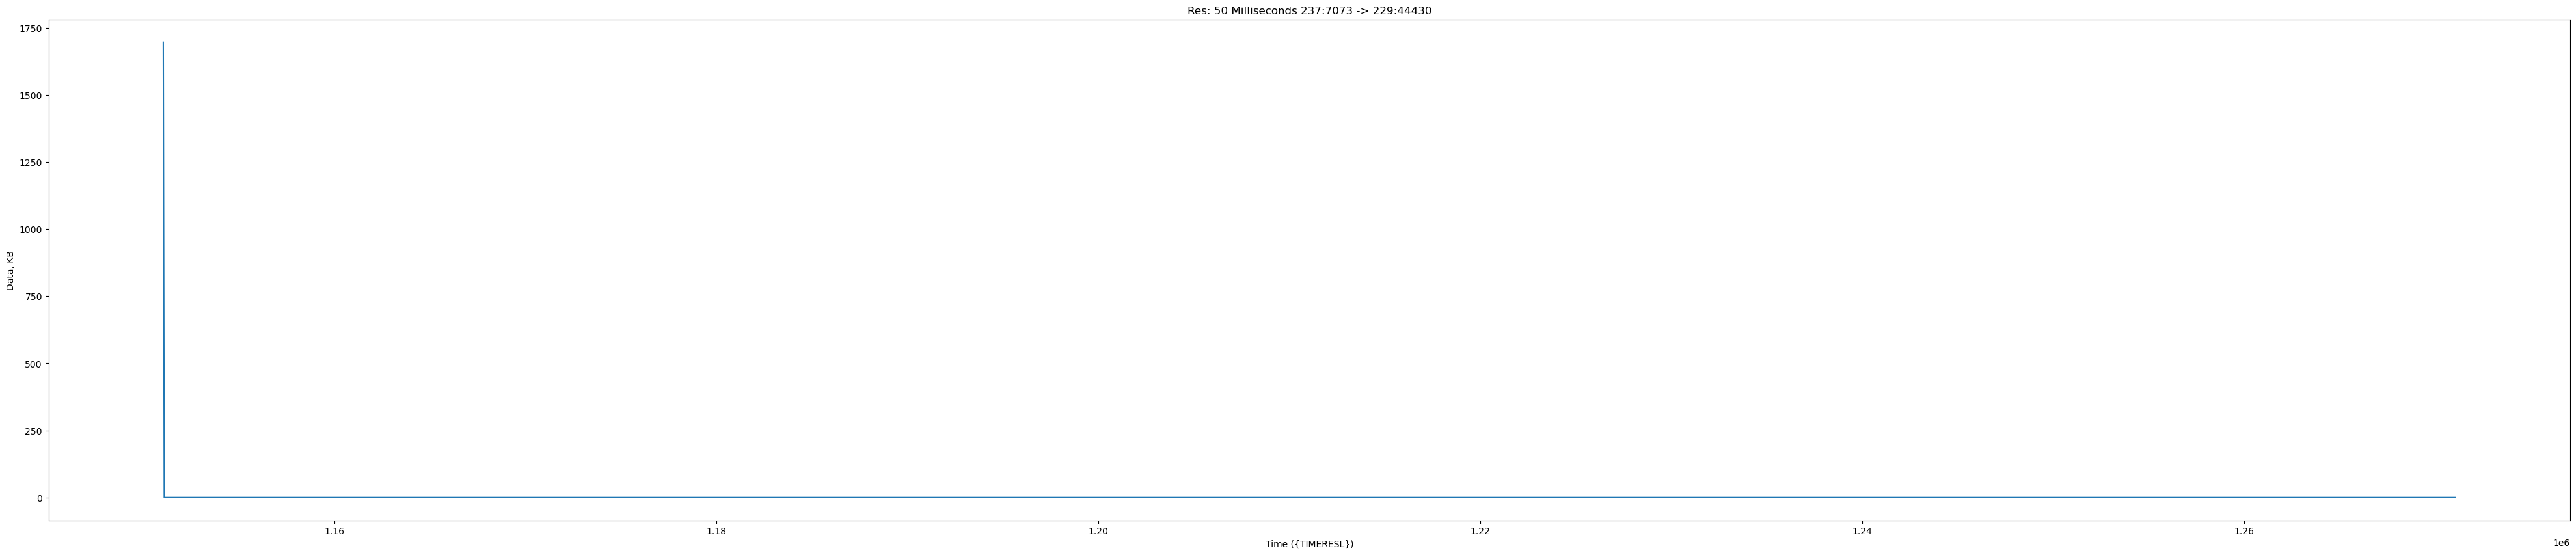

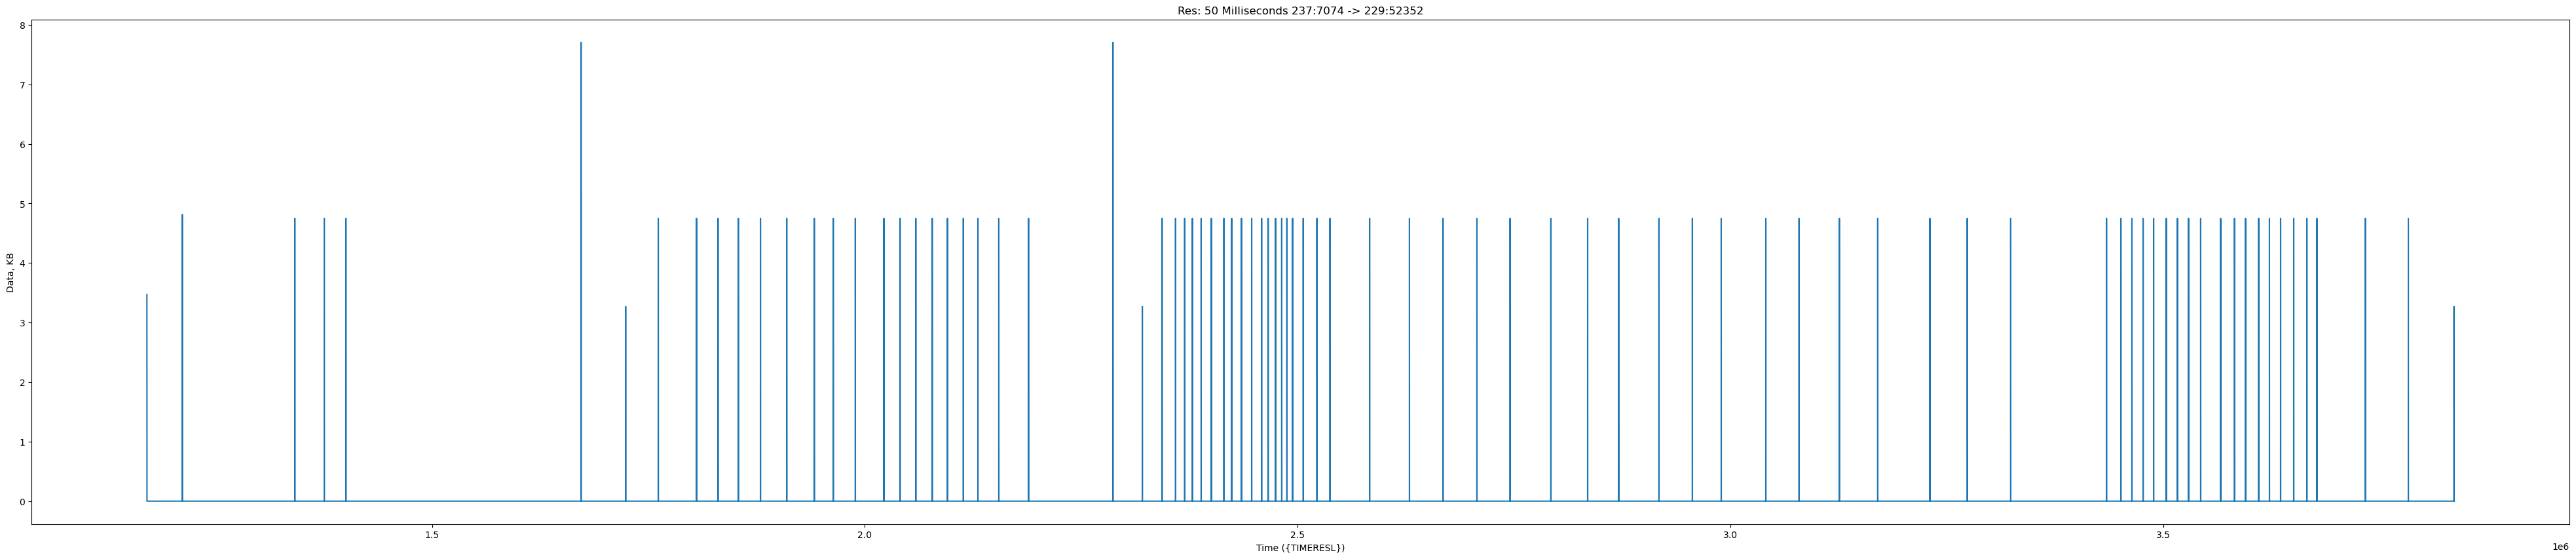

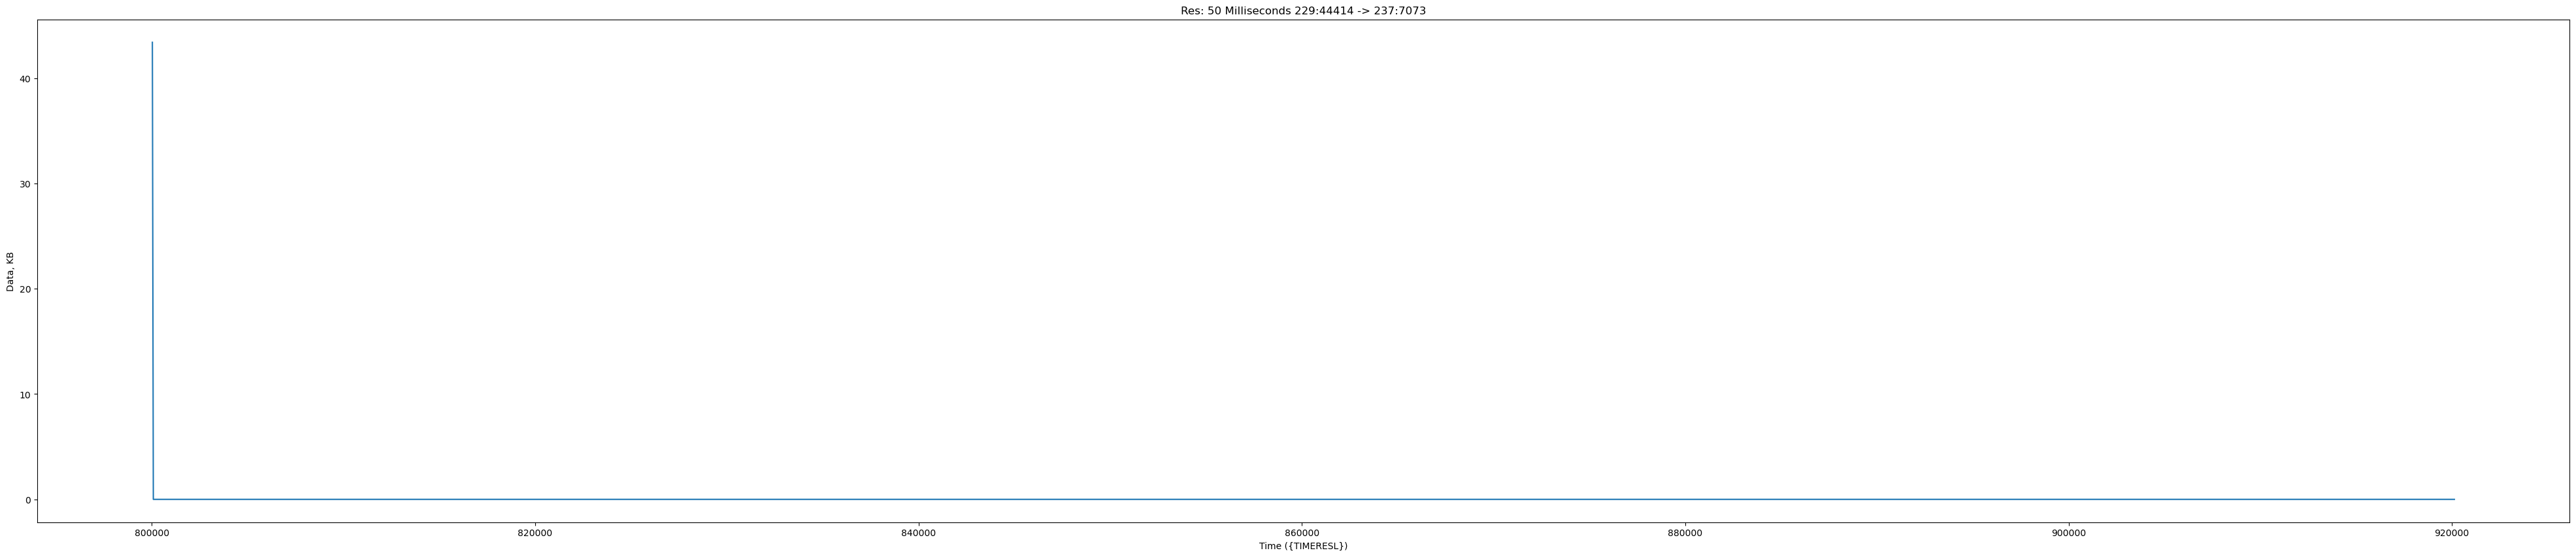

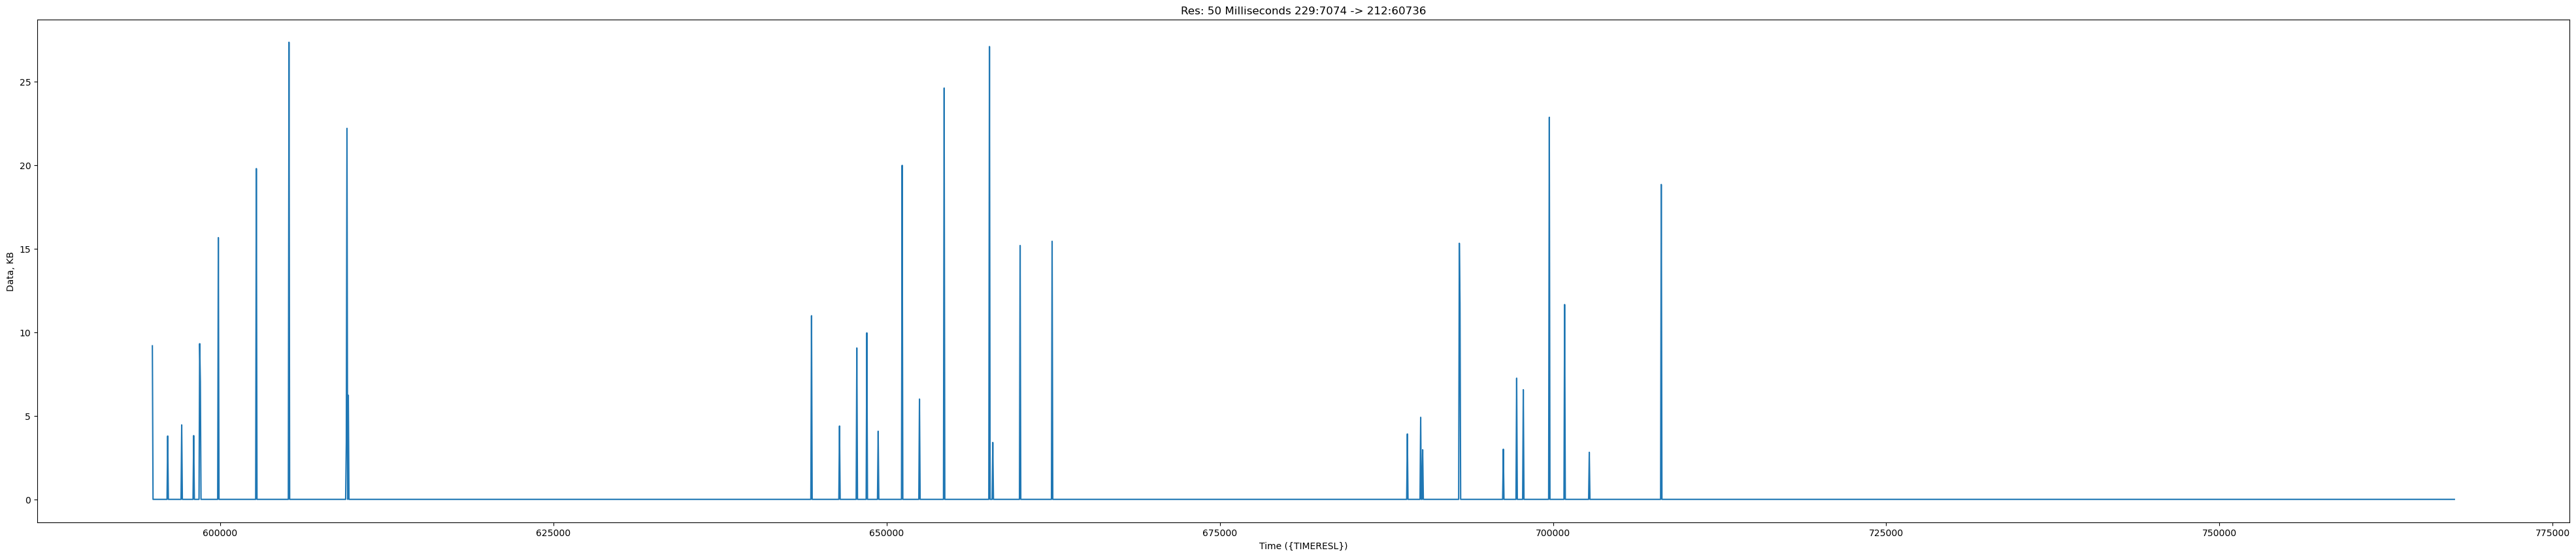

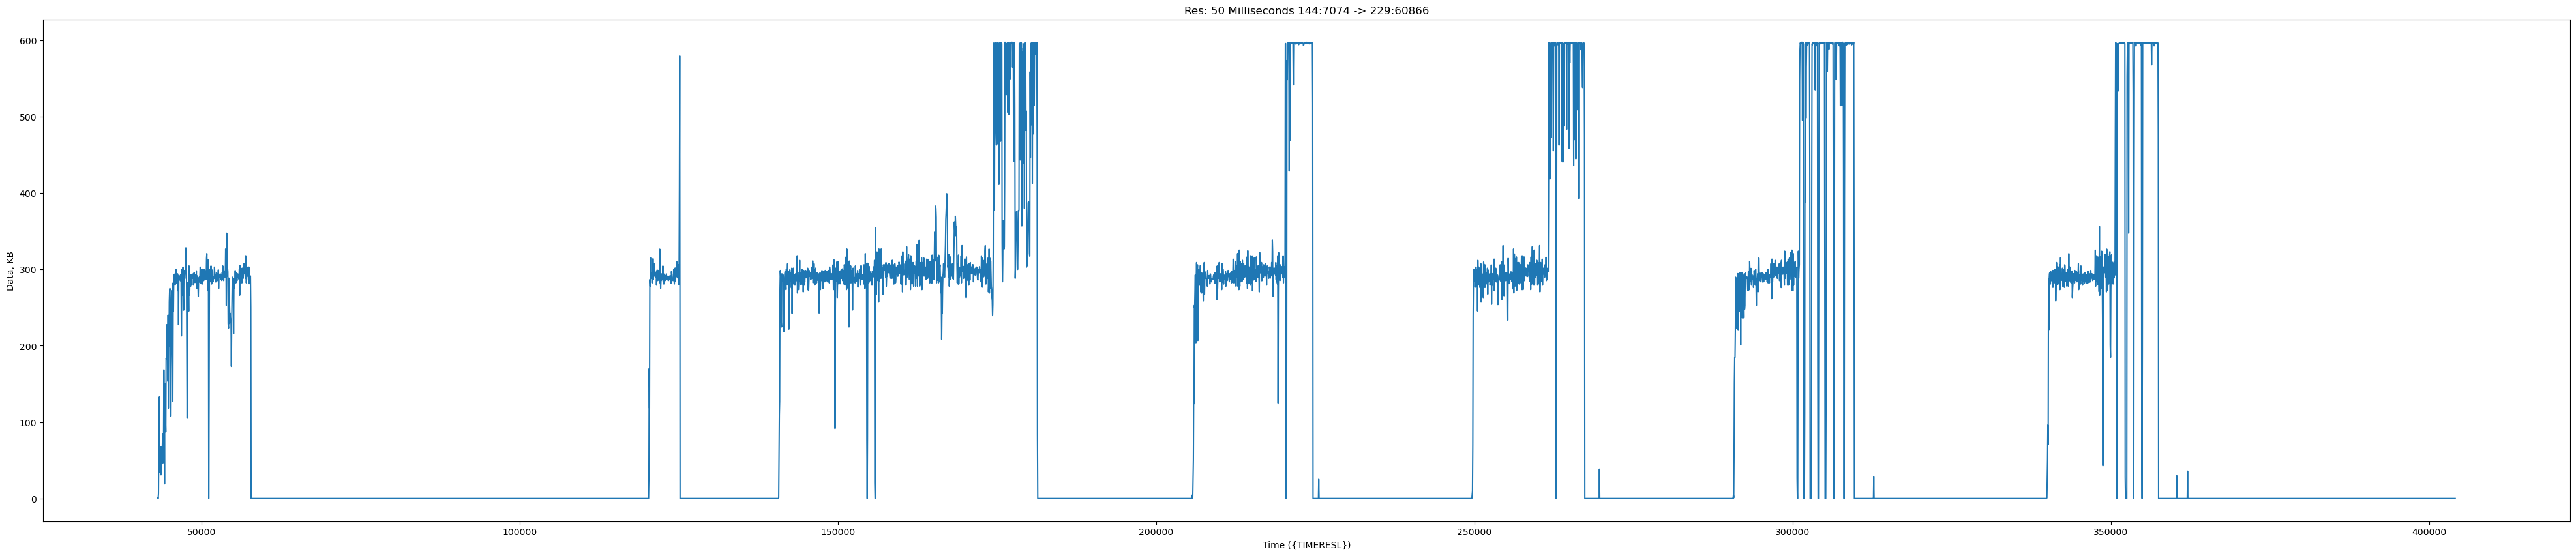

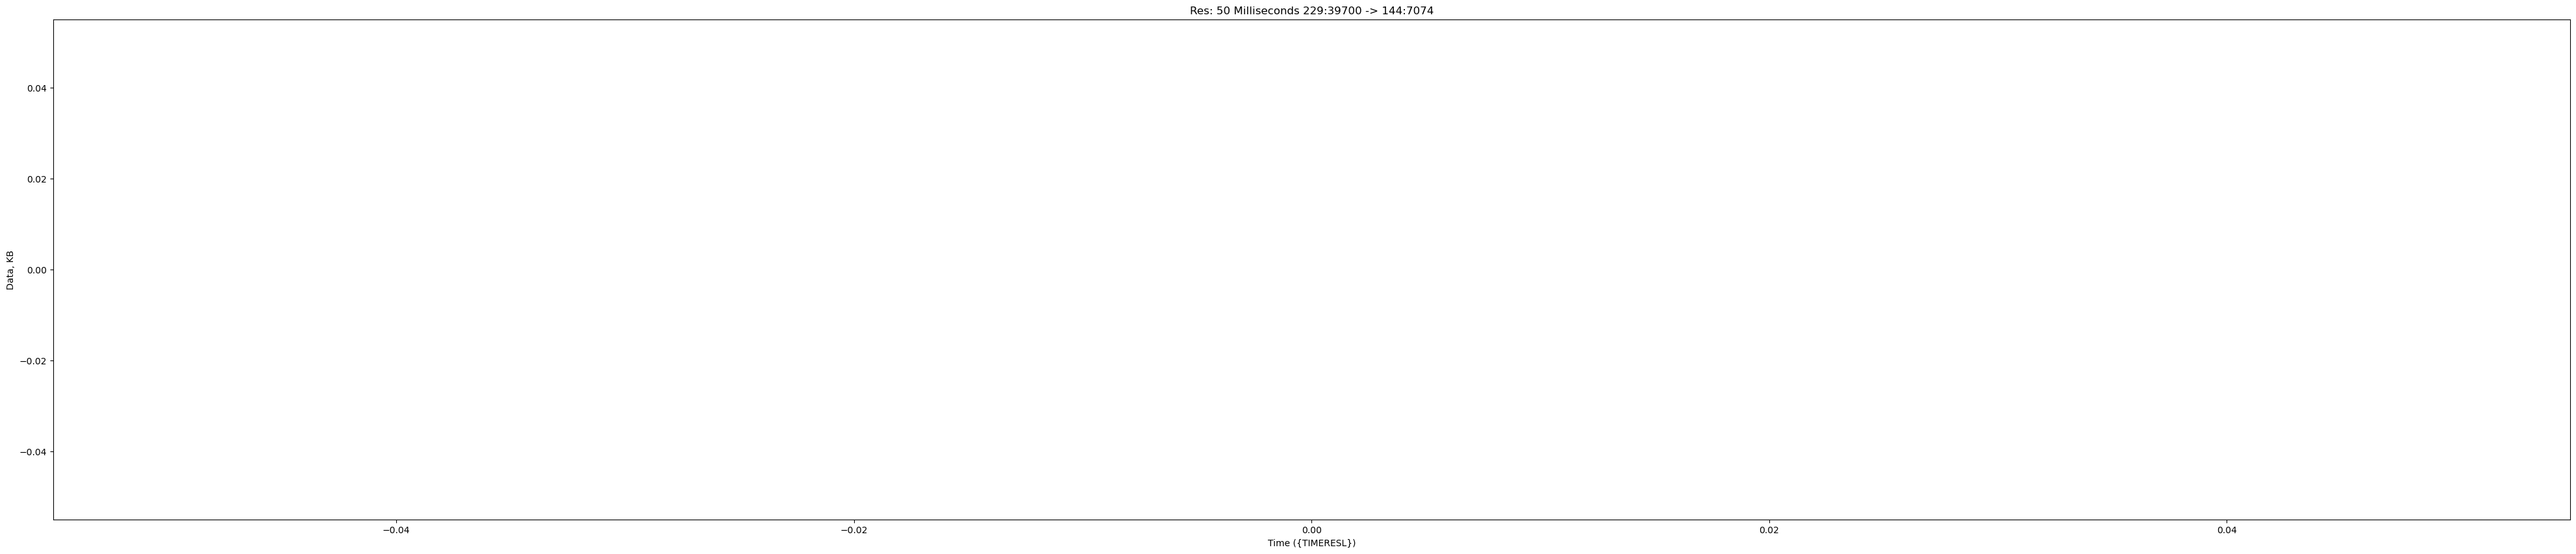

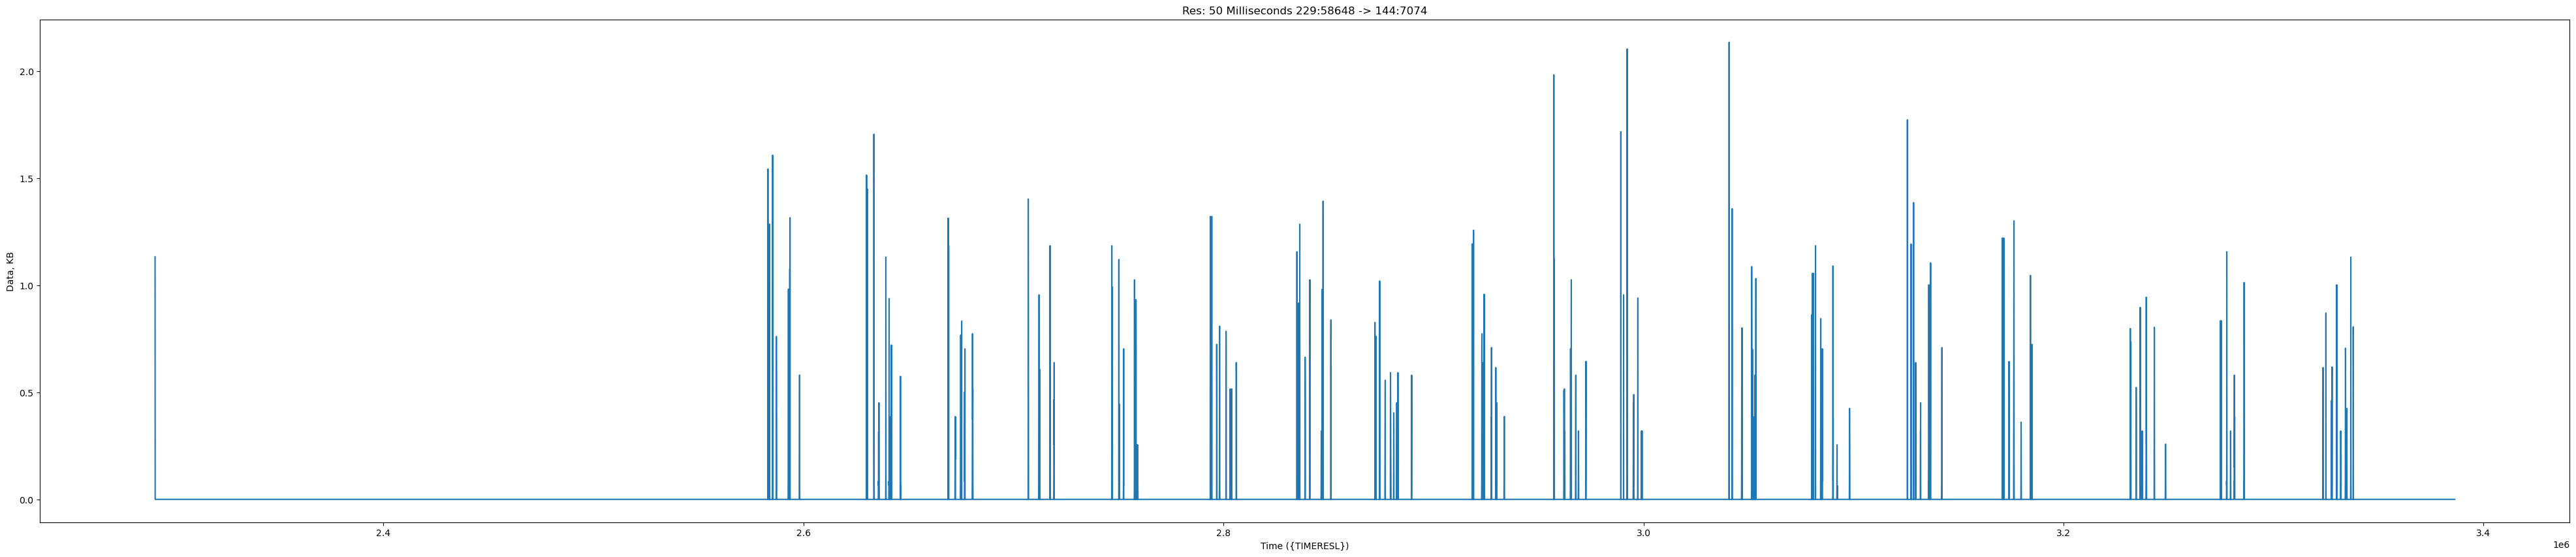

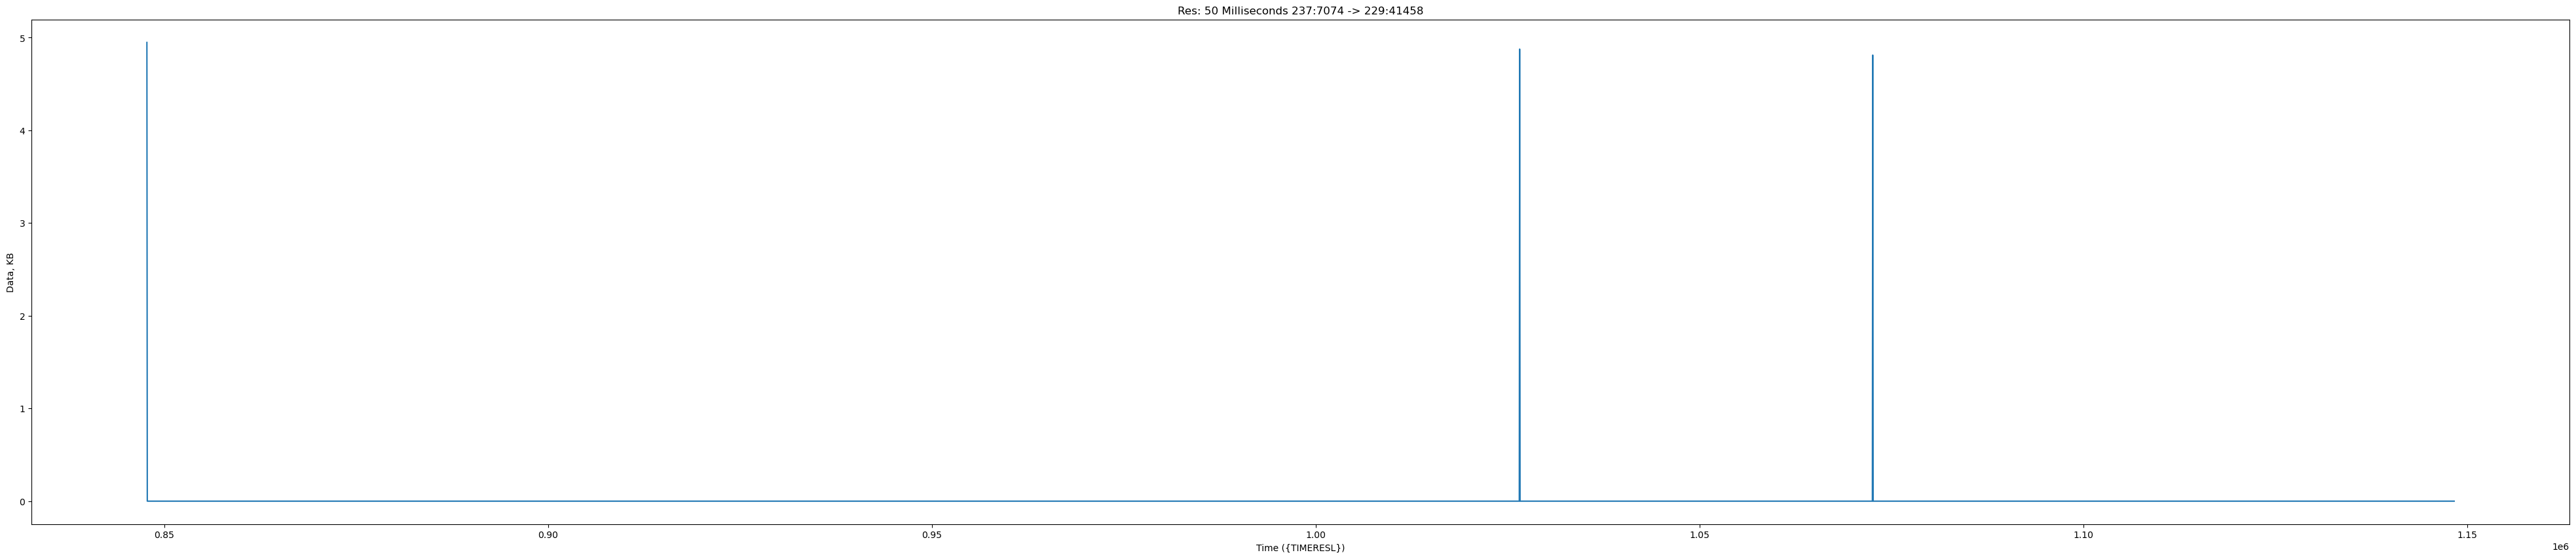

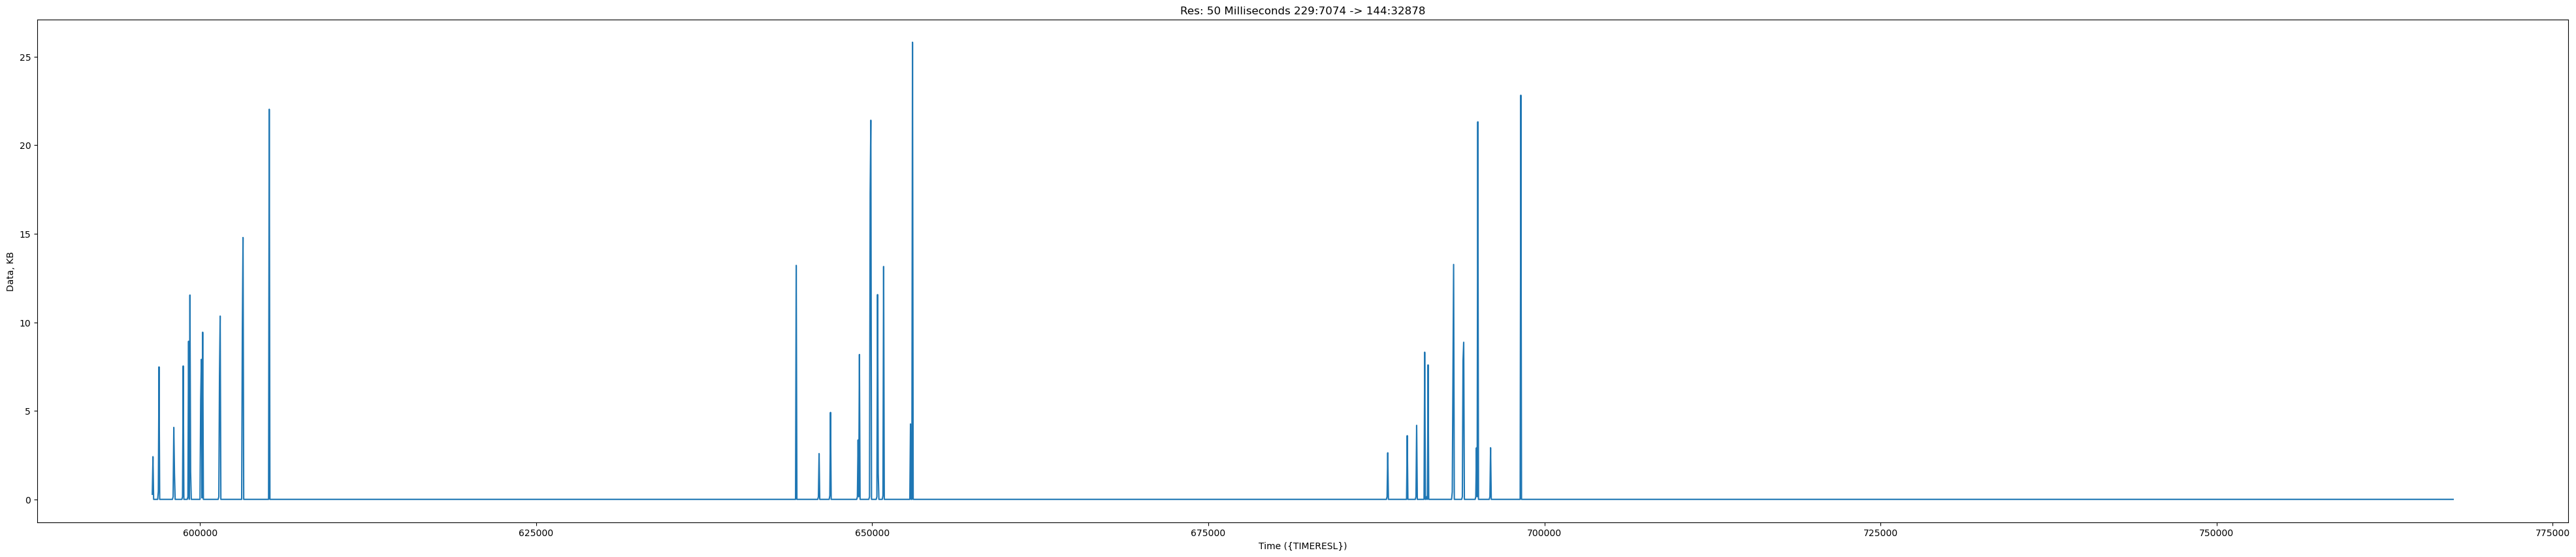

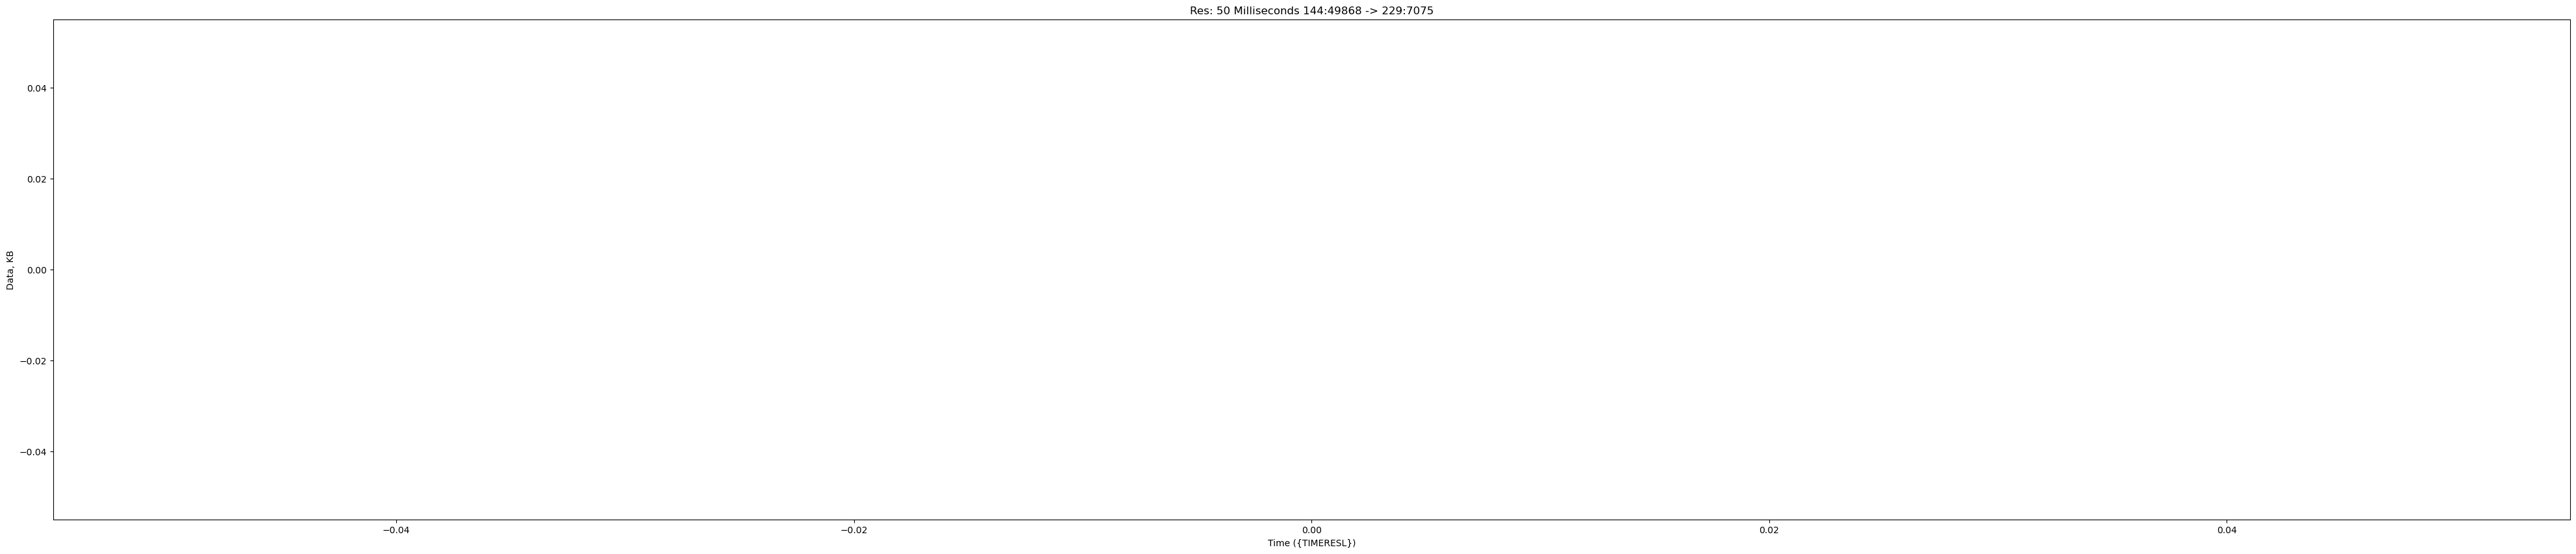

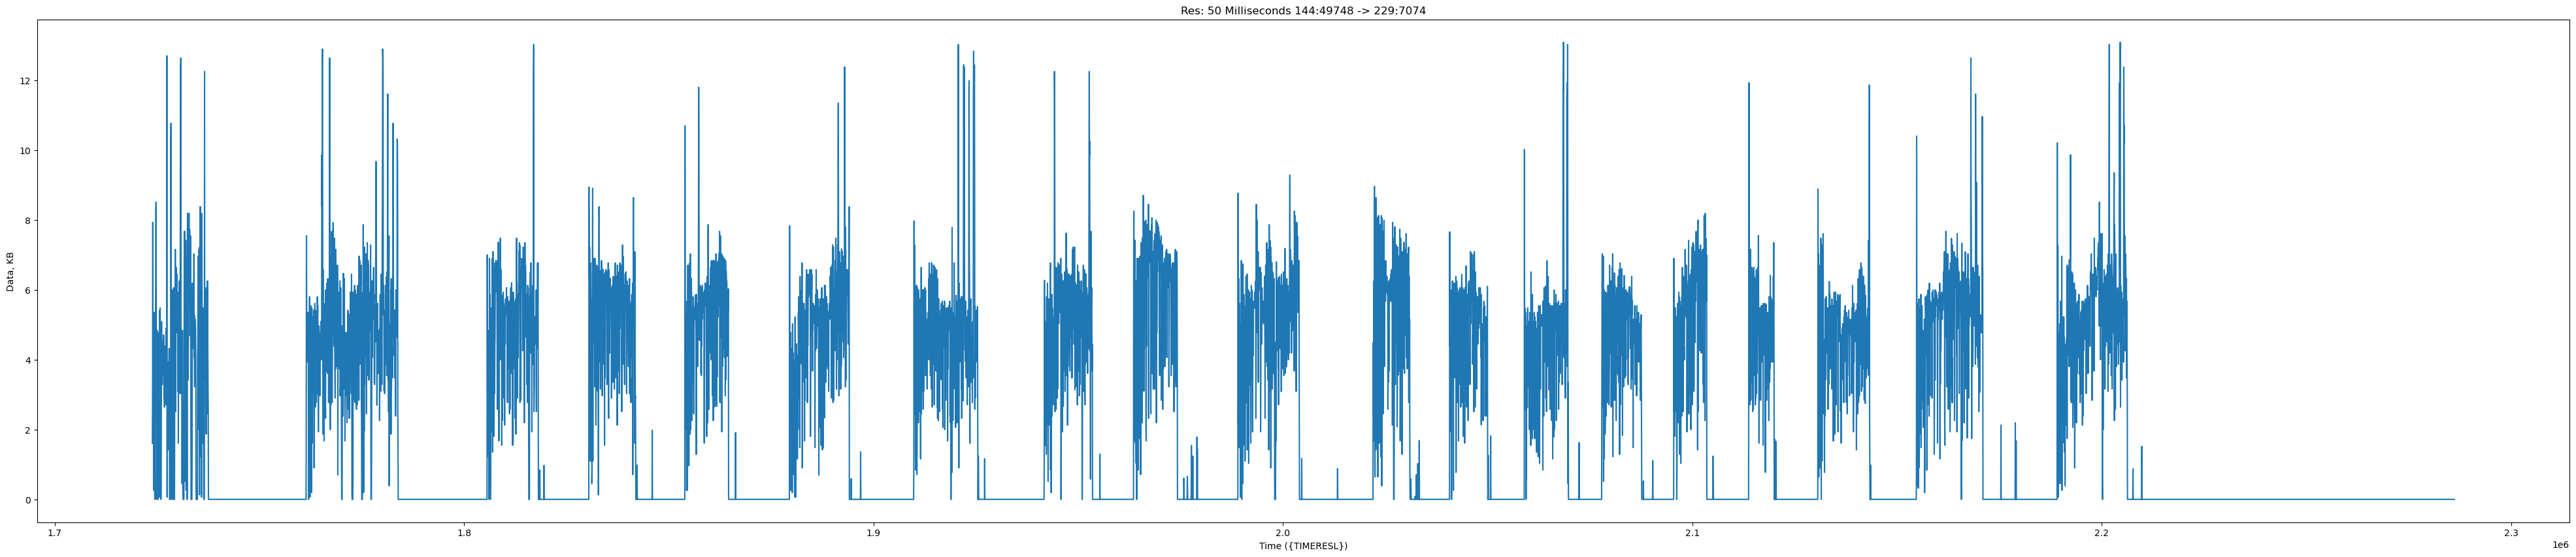

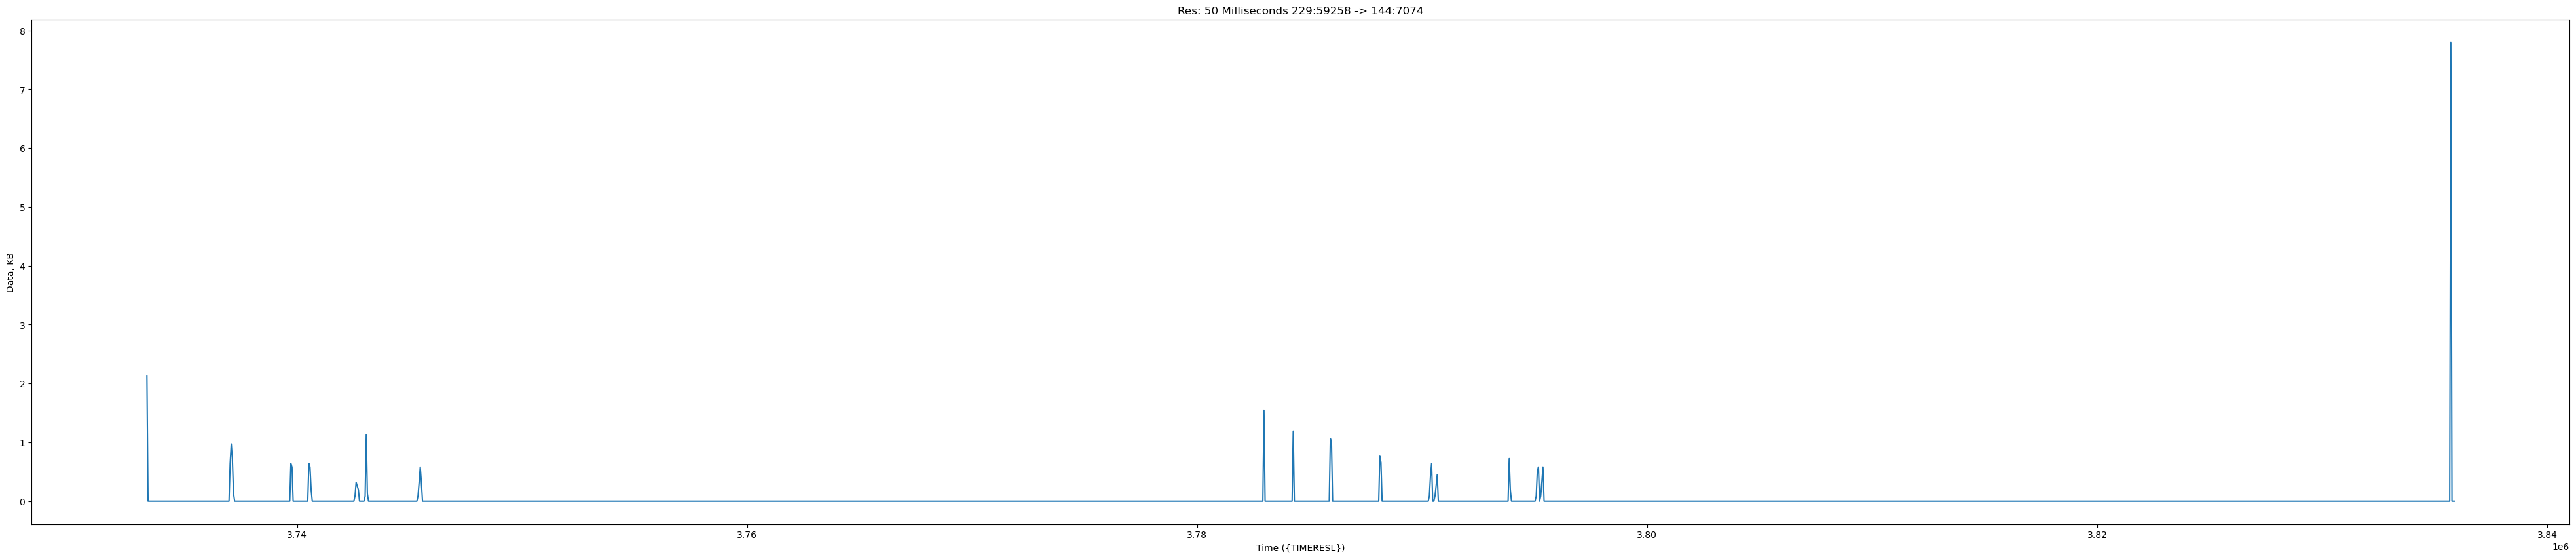

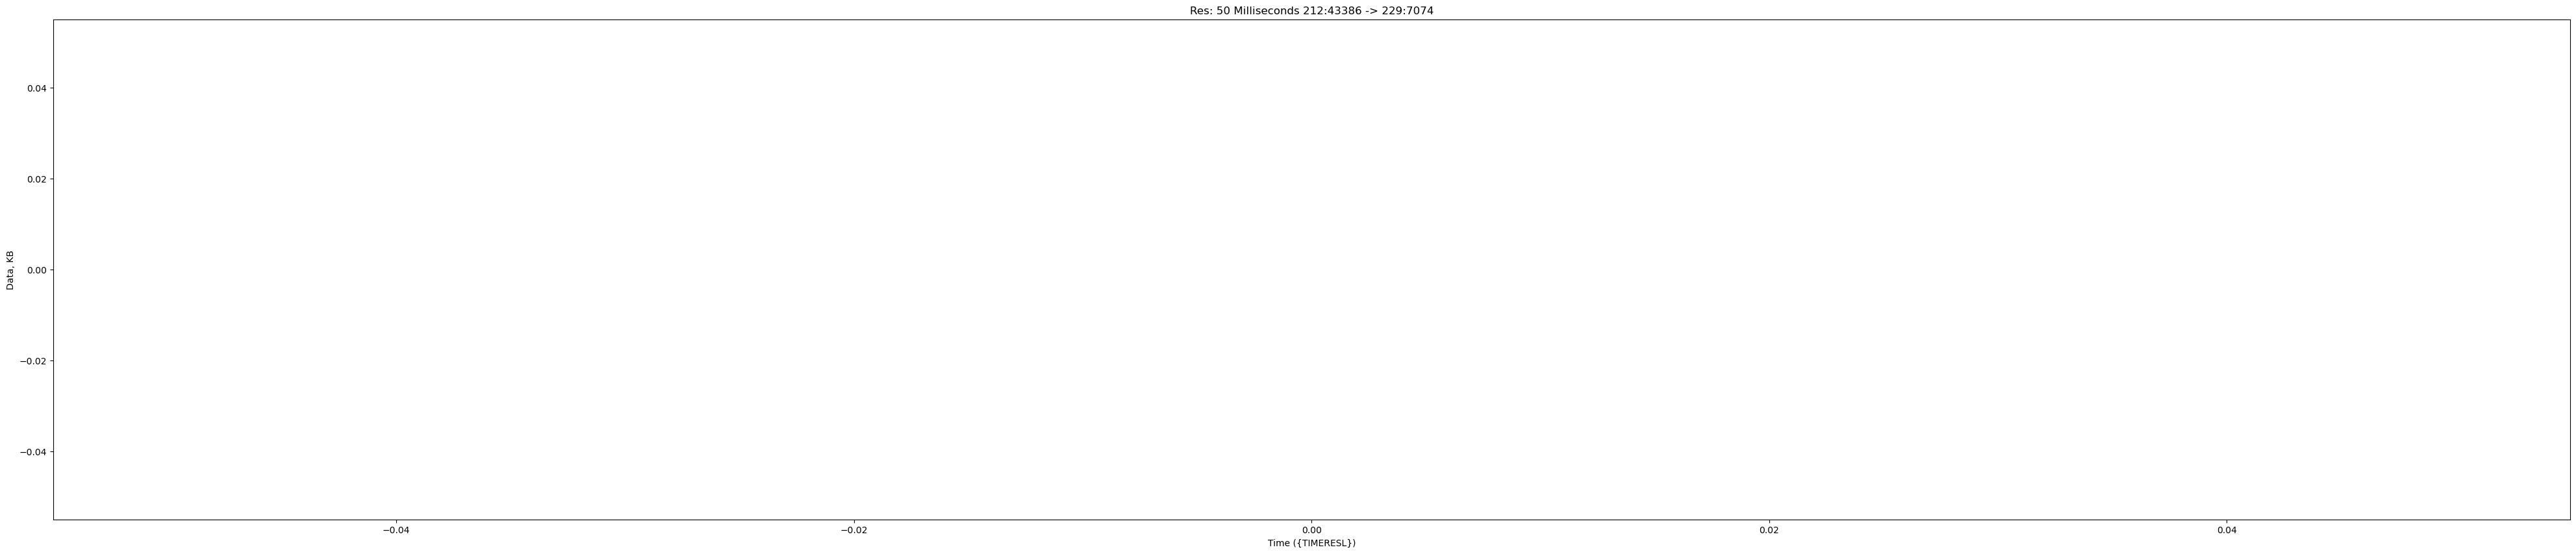

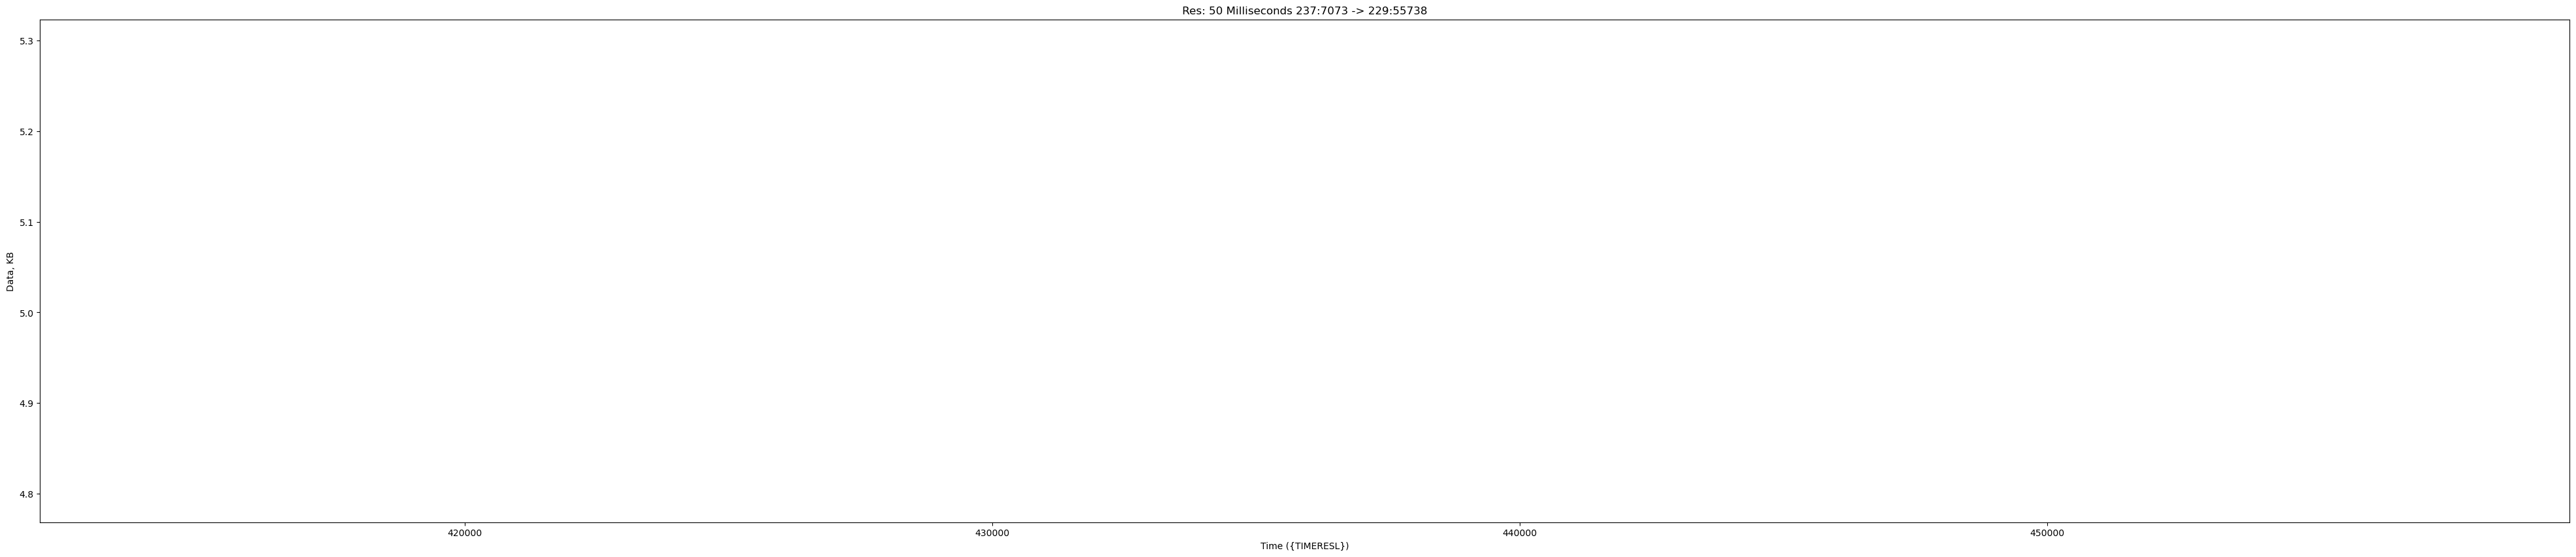

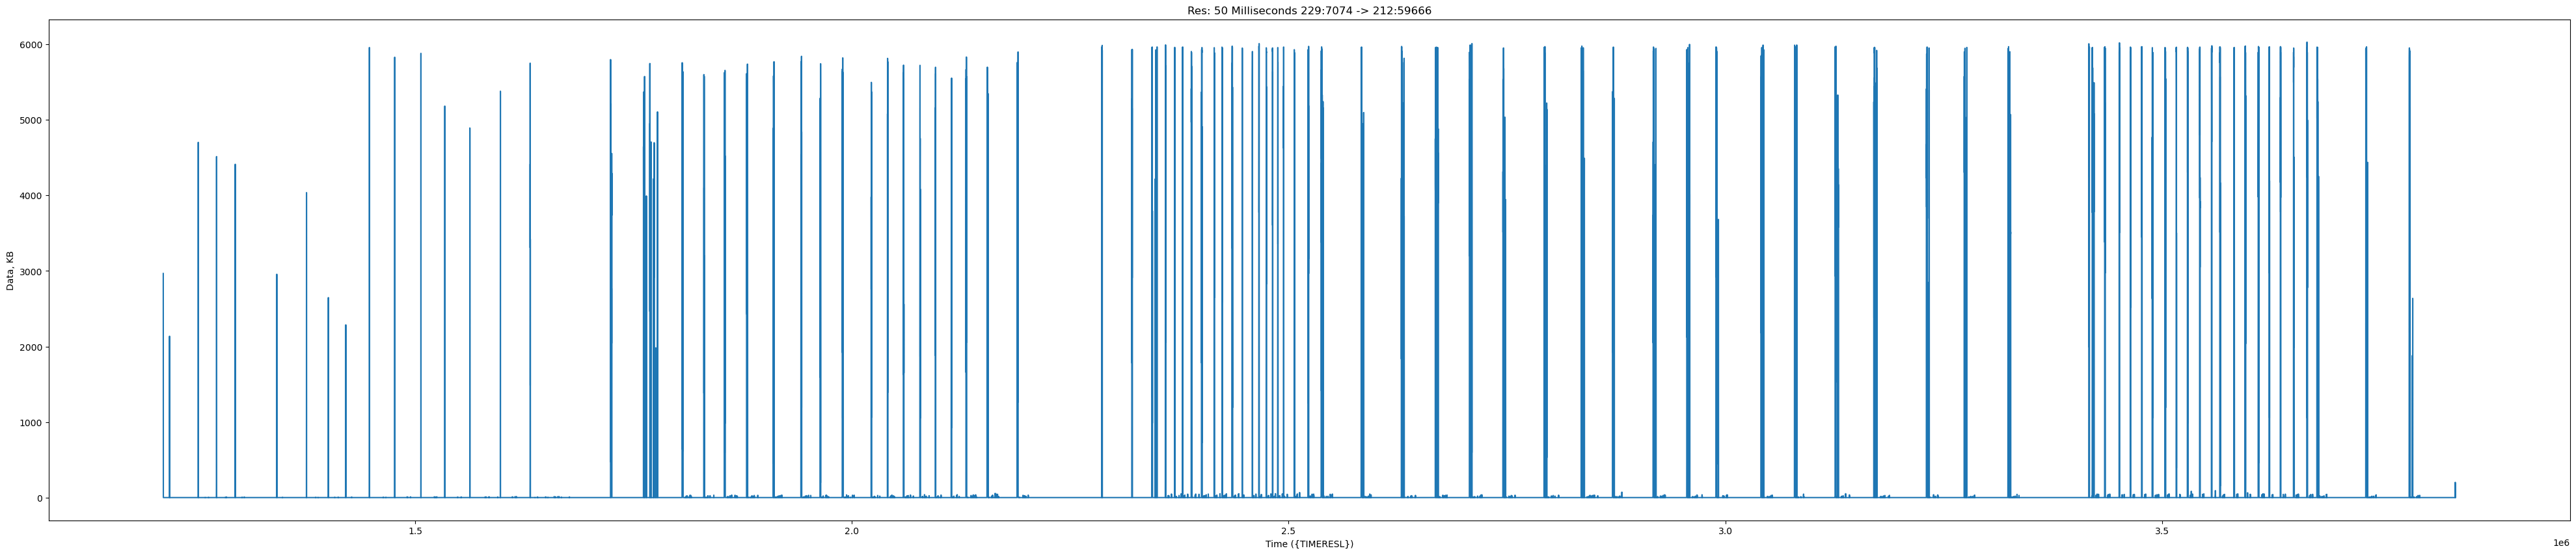

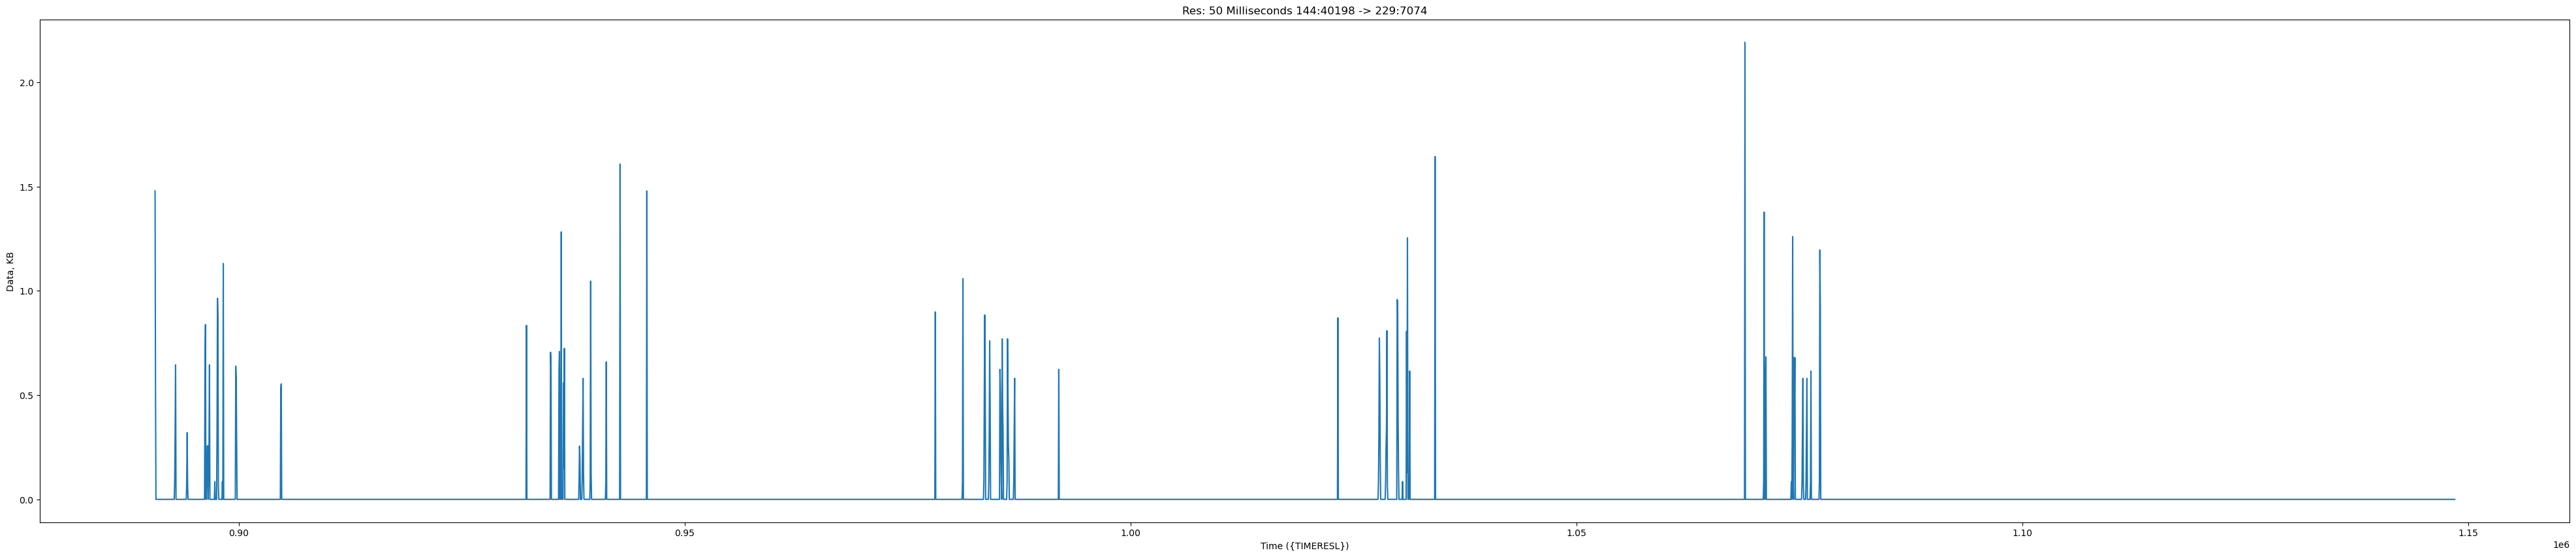

In [50]:
for sip, dip, sp, dp in l:
    s = 0
    print(sip, dip, sp, dp)
    dftt = df[(df['src_port'] == sp) & (df['dest_port'] == dp) & (df['src_ip'] == sip) & (df['dest_ip'] == dip)]
    ts = dftt['timestamp'].values
    vals = dftt['size'].values
    y = []
    x = []
    start, end = ts[0], ts[0] + RES
    while end < ts[-1]:
        in_ts = np.argwhere((start <= ts) & (ts <= end))
        if len(in_ts) > 1:
            new_s, new_end = in_ts[0][0], in_ts[-1][0]
            y.append(np.sum(vals[new_s:new_end]))
            x.append(start)
        else:
            x.append(start)
            y.append(0)
        start, end = start + RES, end + RES
    plt.figure(figsize=(50, 10))
    plt.title(f"Res: {RES} {TIMERES} {sip}:{sp} -> {dip}:{dp}")
    plt.xlabel("Time ({TIMERESL})")
    plt.ylabel("Data, KB")
    plt.plot(x, y)
plt.show()

In [53]:
l = list(set([(a[0], a[1]) for a in df[['src_ip', 'dest_ip']].values]))
print(l)

[(144, 229), (237, 229), (229, 212), (229, 237), (212, 229), (229, 144)]


144 229
237 229
229 212
229 237
212 229
229 144


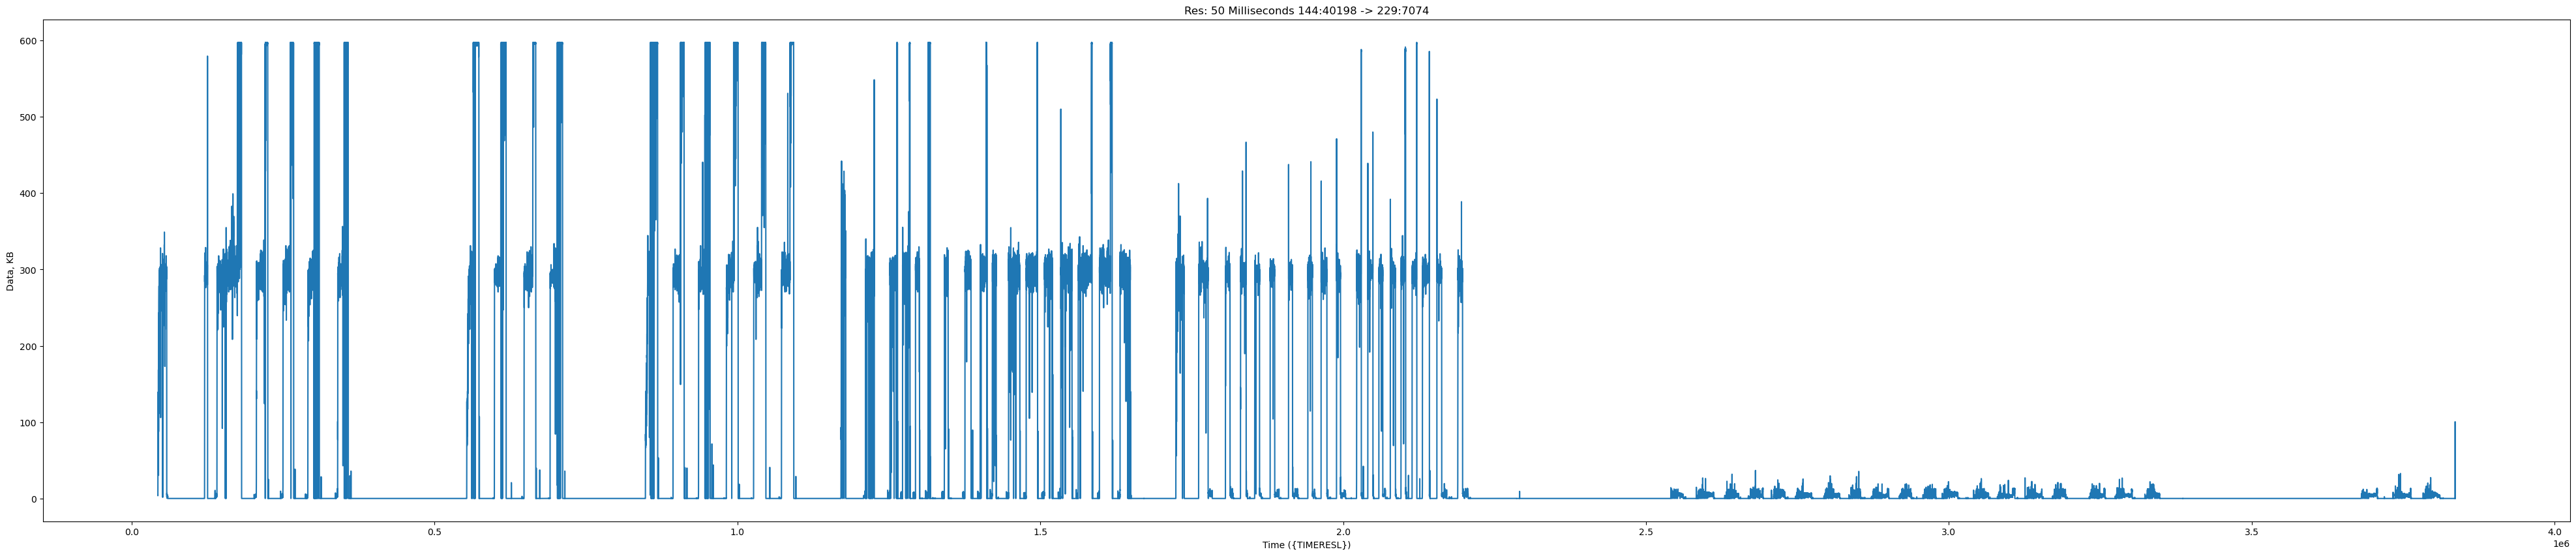

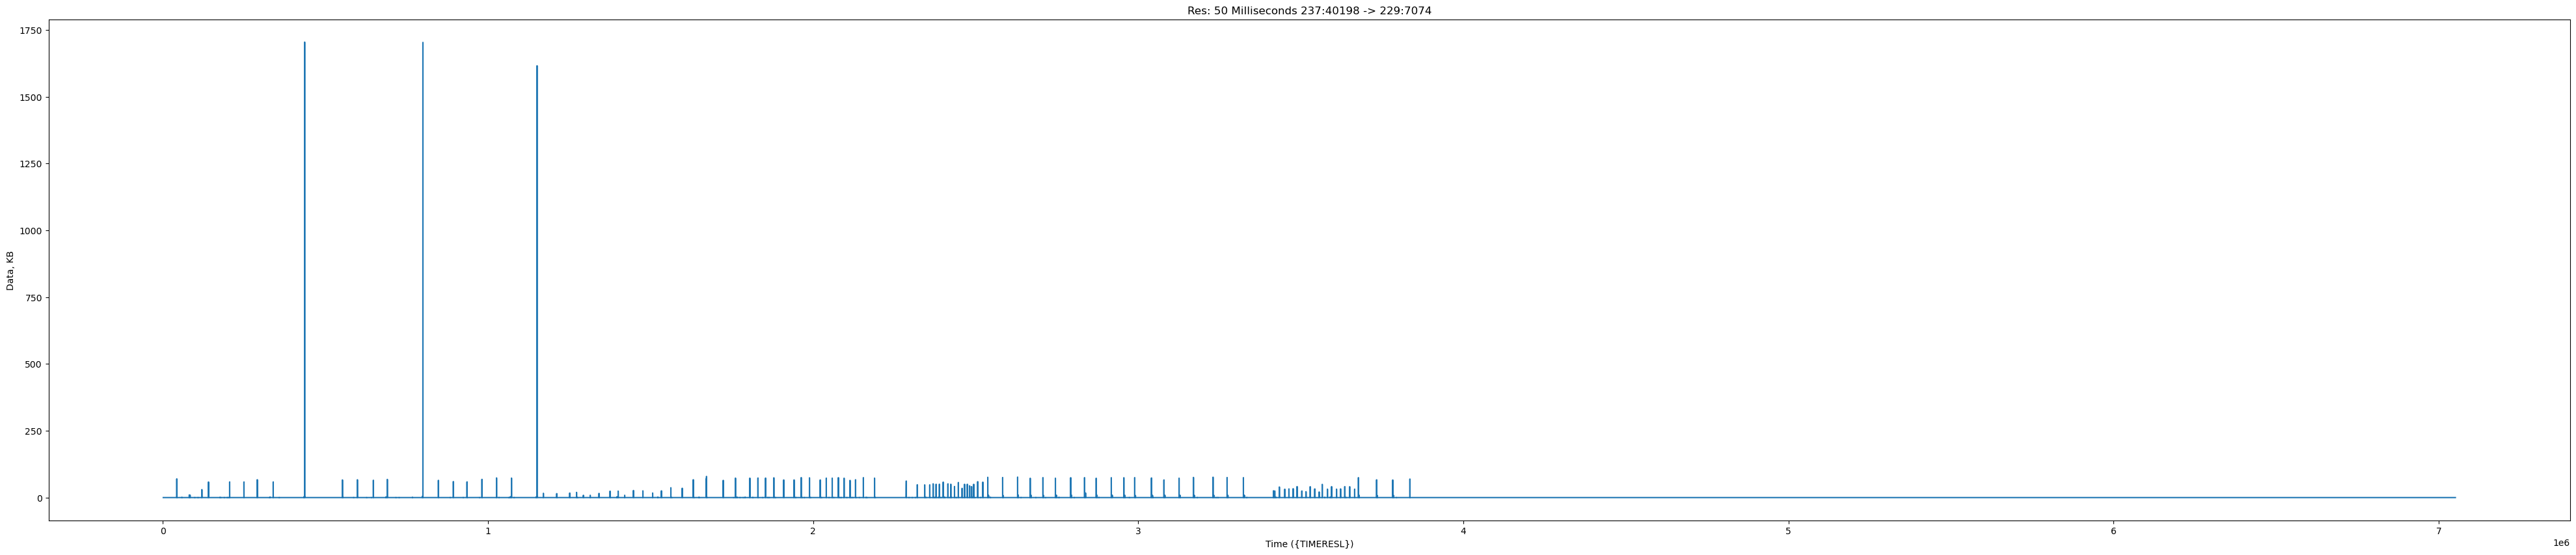

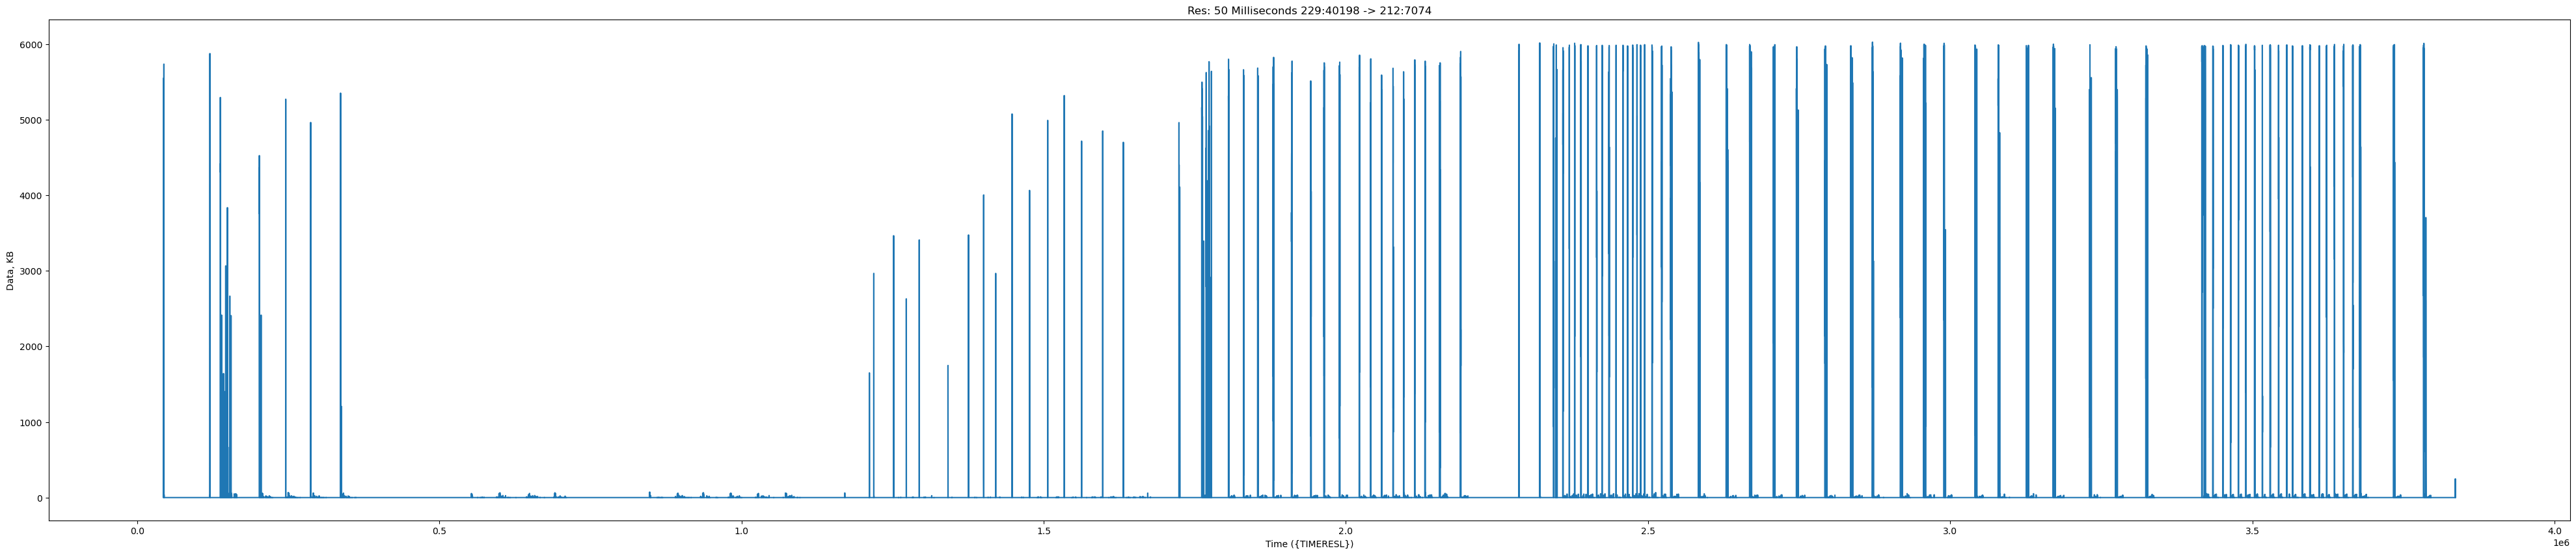

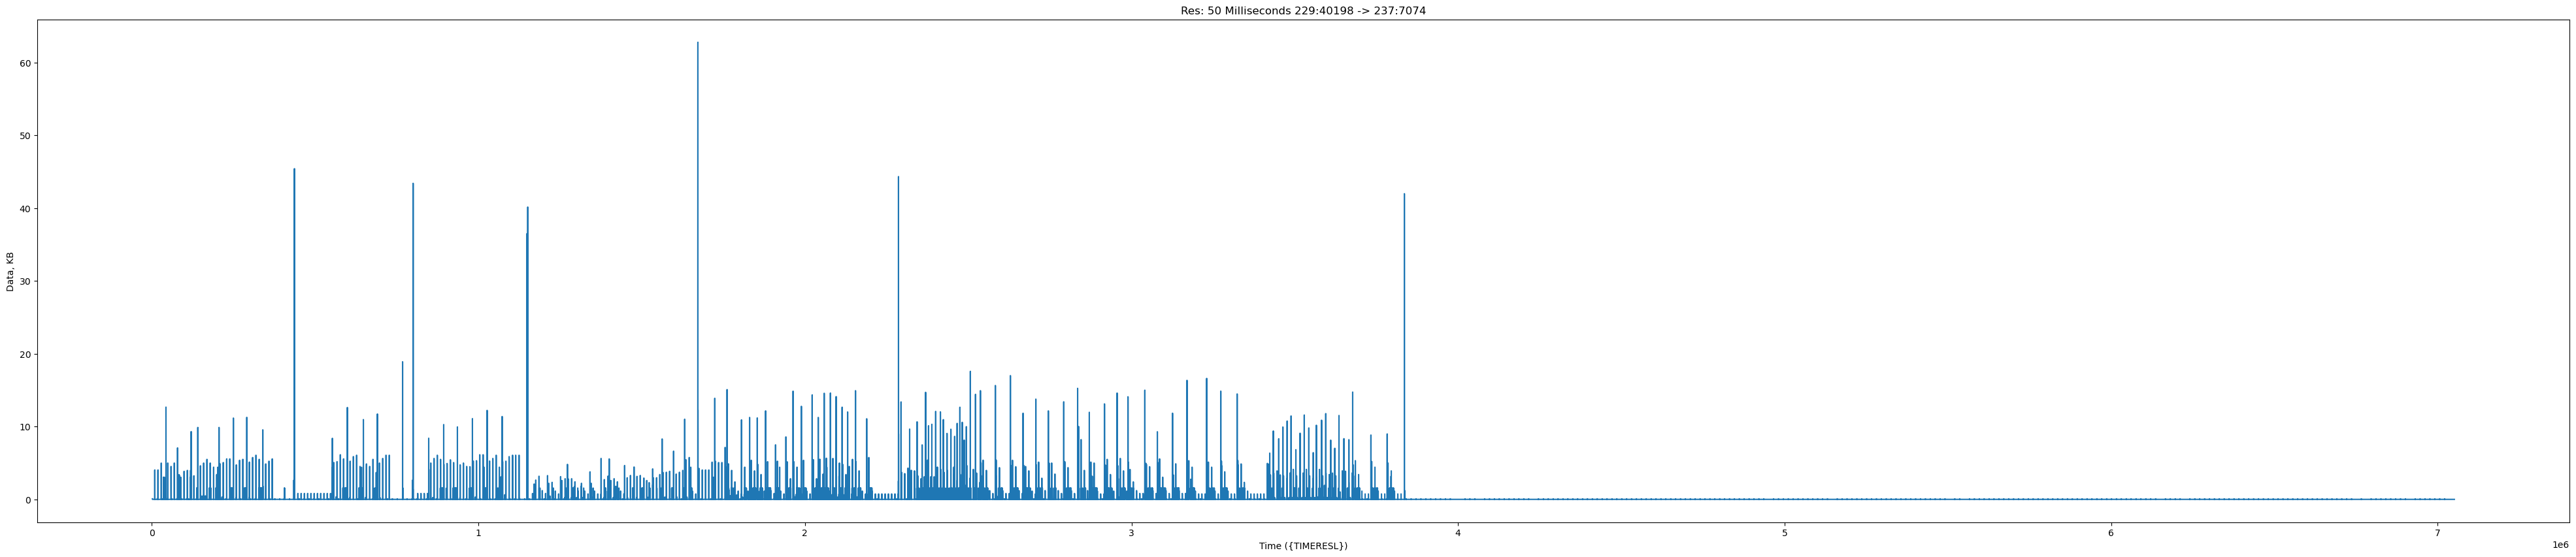

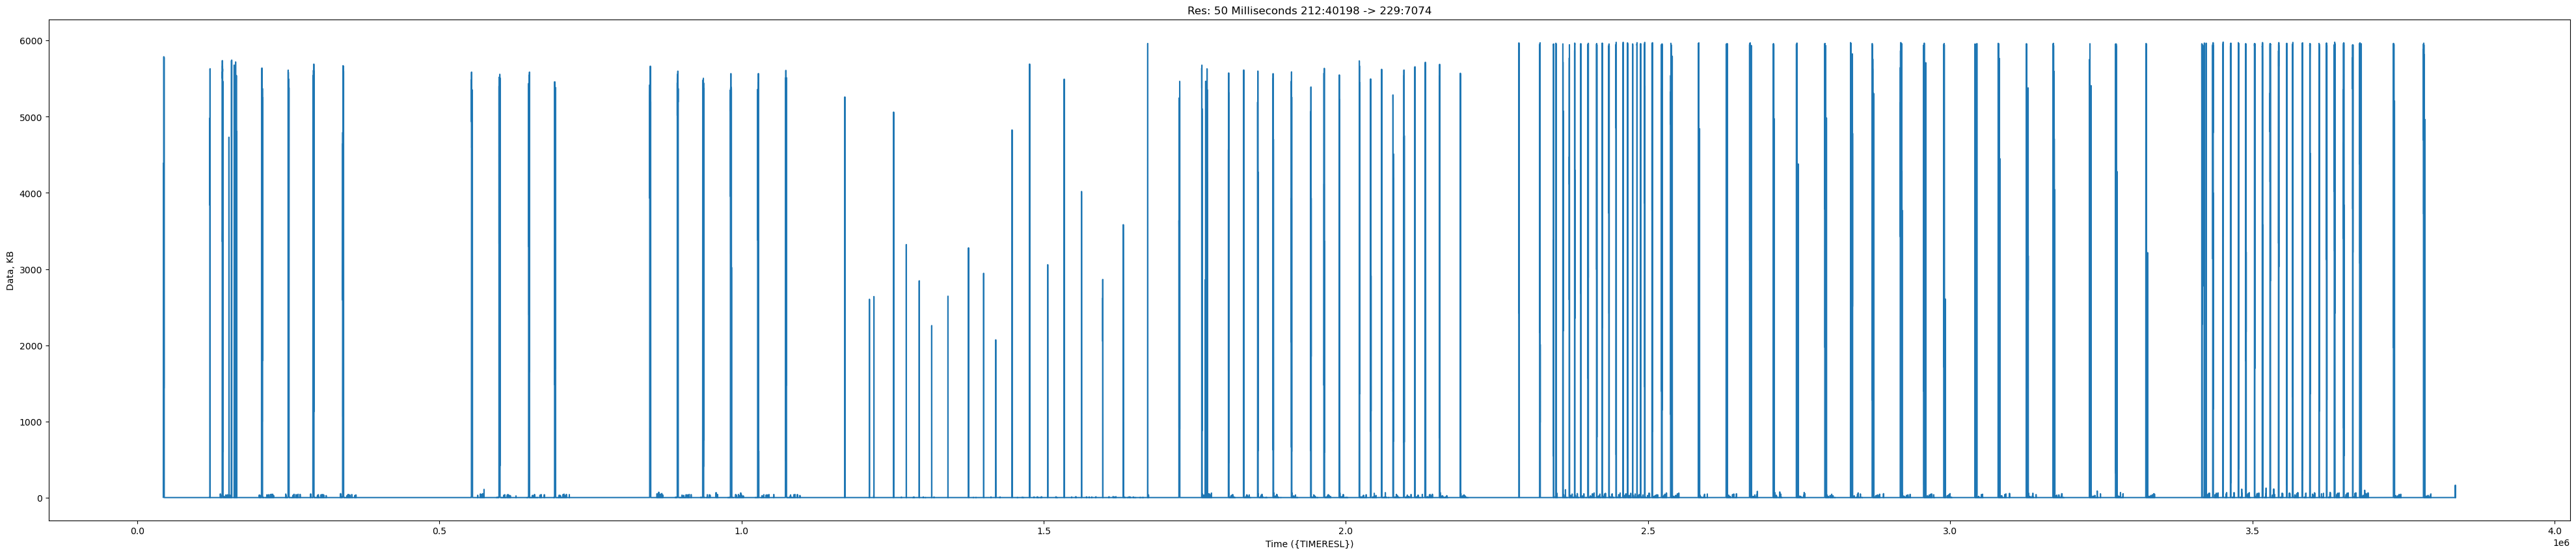

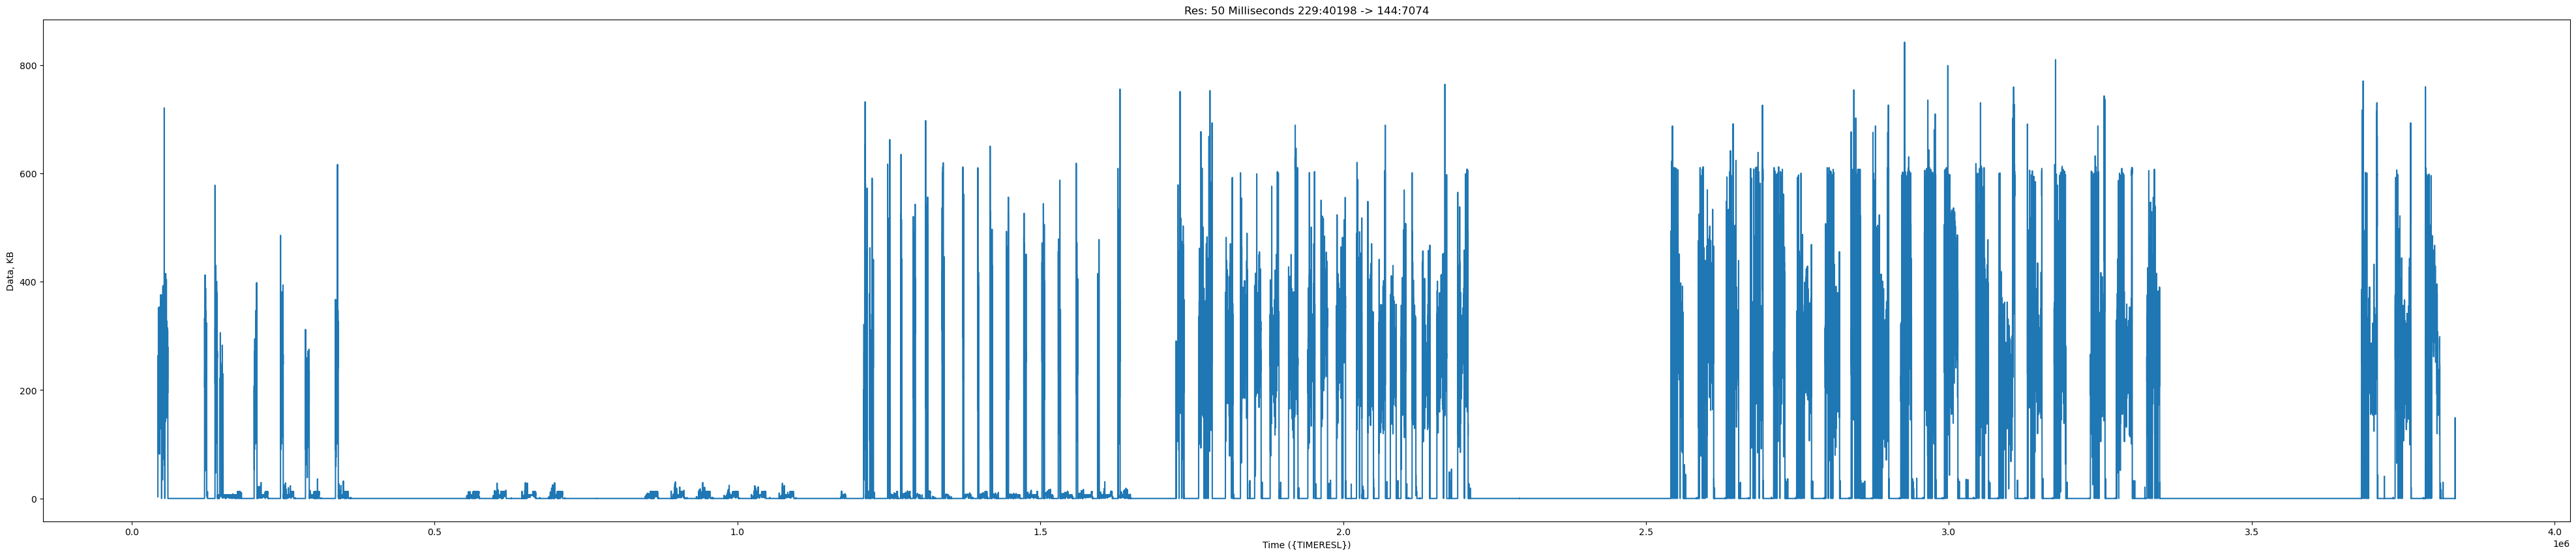

In [76]:
for sip, dip in l:
    s = 0
    print(sip, dip)
    dftt = df[(df['src_ip'] == sip) & (df['dest_ip'] == dip)]
    ts = dftt['timestamp'].values
    vals = dftt['size'].values
    y = []
    x = []
    start, end = ts[0], ts[0] + RES
    while end < ts[-1]:
        in_ts = np.argwhere((start <= ts) & (ts <= end))
        if len(in_ts) > 1:
            new_s, new_end = in_ts[0][0], in_ts[-1][0]
            y.append(np.sum(vals[new_s:new_end]))
            x.append(start)
            ts = ts[in_ts[-1][0]:]
            vals = vals[in_ts[-1][0]:]
        else:
            x.append(start)
            y.append(0)
        start, end = start + RES, end + RES
    plt.figure(figsize=(50, 10))
    plt.title(f"Res: {RES} {TIMERES} {sip} -> {dip}")
    plt.xlabel("Time ({TIMERESL})")
    plt.ylabel("Data, KB")
    plt.plot(x, y)
plt.show()

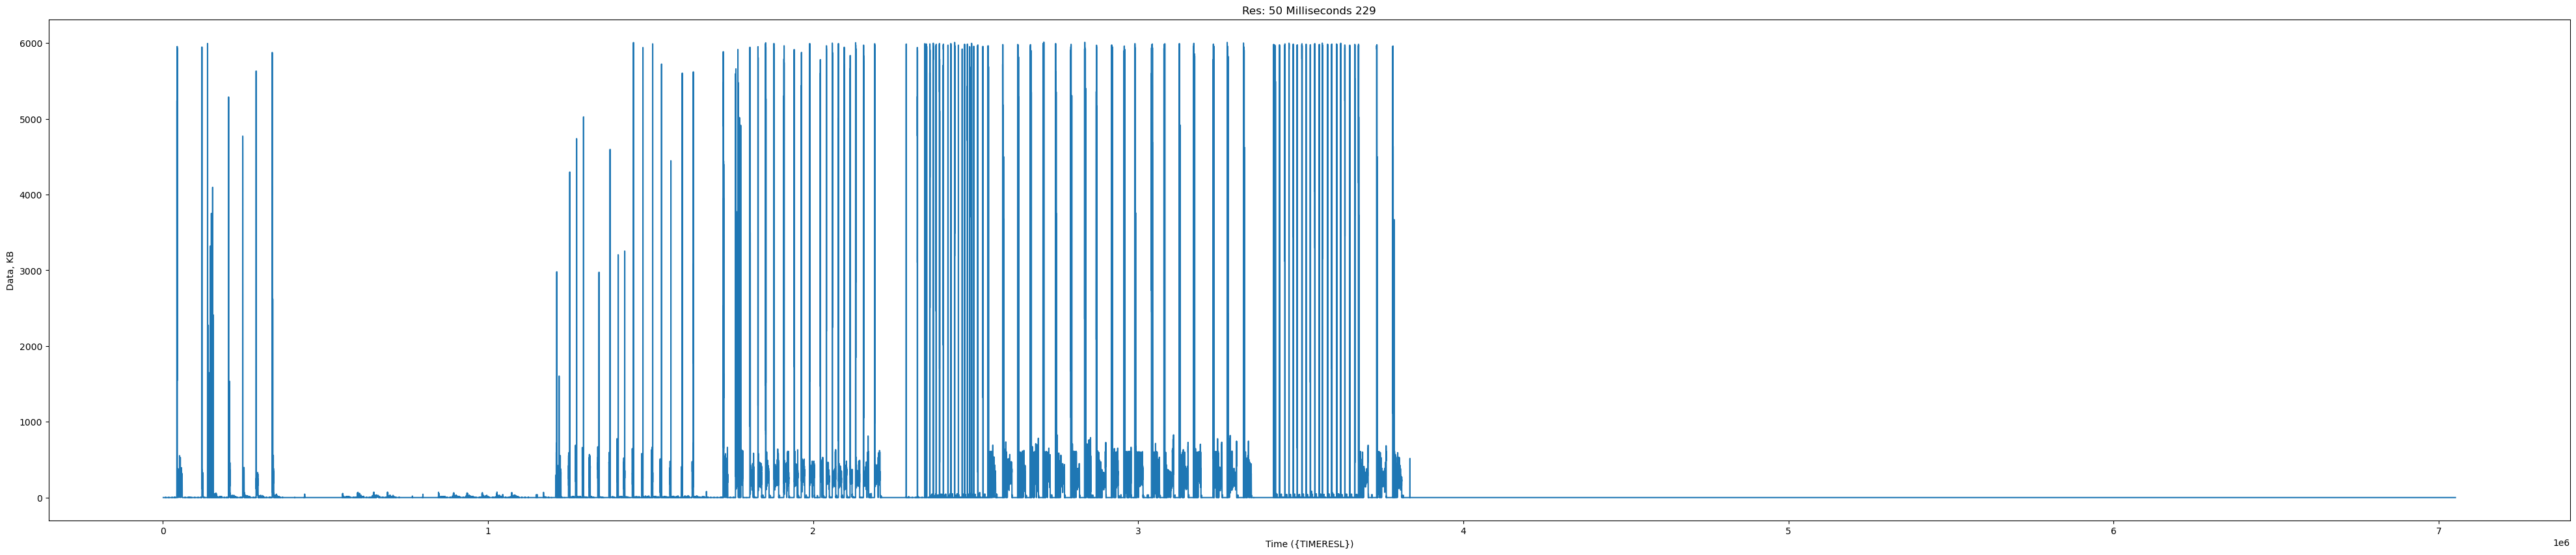

In [78]:
dftt = df[(df['src_ip'] == TARGET_IP)]
ts = dftt['timestamp'].values
vals = dftt['size'].values
y = []
x = []
start, end = ts[0], ts[0] + RES
while end < ts[-1]:
    in_ts = np.argwhere((start <= ts) & (ts <= end))
    if len(in_ts) > 1:
        new_s, new_end = in_ts[0][0], in_ts[-1][0]
        y.append(np.sum(vals[new_s:new_end]))
        x.append(start)
        ts = ts[in_ts[-1][0]:]
        vals = vals[in_ts[-1][0]:]
    else:
        x.append(start)
        y.append(0)
    start, end = start + RES, end + RES
plt.figure(figsize=(50, 10))
plt.title(f"Res: {RES} {TIMERES} {TARGET_IP}")
plt.xlabel("Time ({TIMERESL})")
plt.ylabel("Data, KB")
plt.plot(x, y)
plt.show()

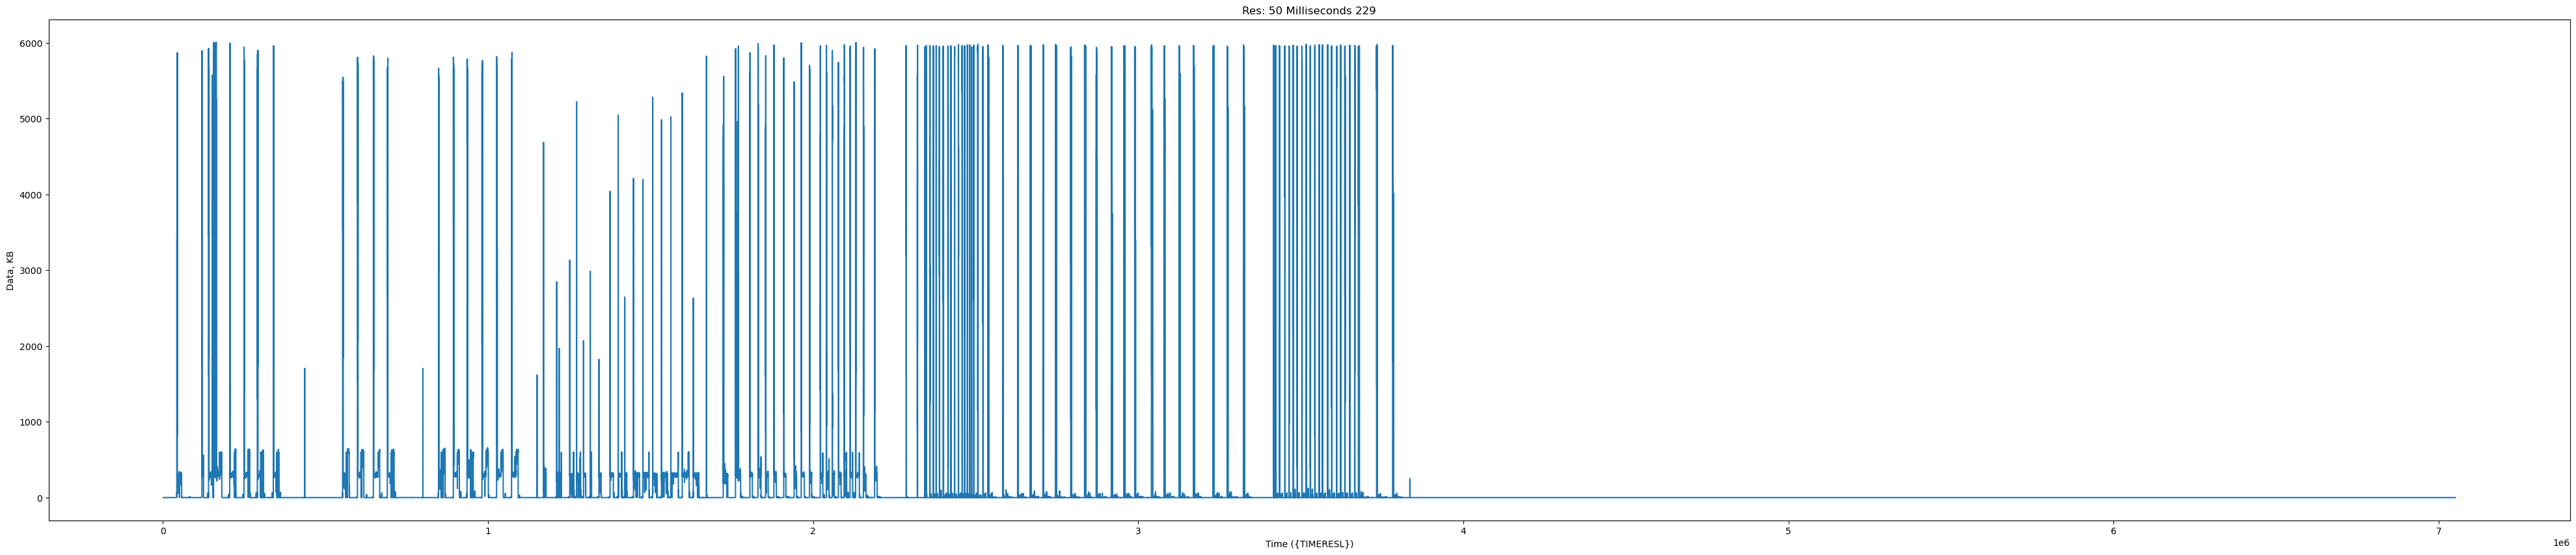

In [7]:
dftt = df[(df['dest_ip'] == TARGET_IP)]
ts = dftt['timestamp'].values
vals = dftt['size'].values
y = []
x = []
start, end = ts[0], ts[0] + RES
while end < ts[-1]:
    in_ts = np.argwhere((start <= ts) & (ts <= end))
    if len(in_ts) > 1:
        new_s, new_end = in_ts[0][0], in_ts[-1][0]
        y.append(np.sum(vals[new_s:new_end]))
        x.append(start)
        ts = ts[in_ts[-1][0]:]
        vals = vals[in_ts[-1][0]:]
    else:
        x.append(start)
        y.append(0)
    start, end = start + RES, end + RES
plt.figure(figsize=(50, 10))
plt.title(f"Res: {RES} {TIMERES} {TARGET_IP}")
plt.xlabel("Time ({TIMERESL})")
plt.ylabel("Data, KB")
plt.plot(x, y)
plt.show()

In [15]:
allocs_df = get_trace(ALLOCS, volumefactor=1, timefactor=MILLI_SECONDS)

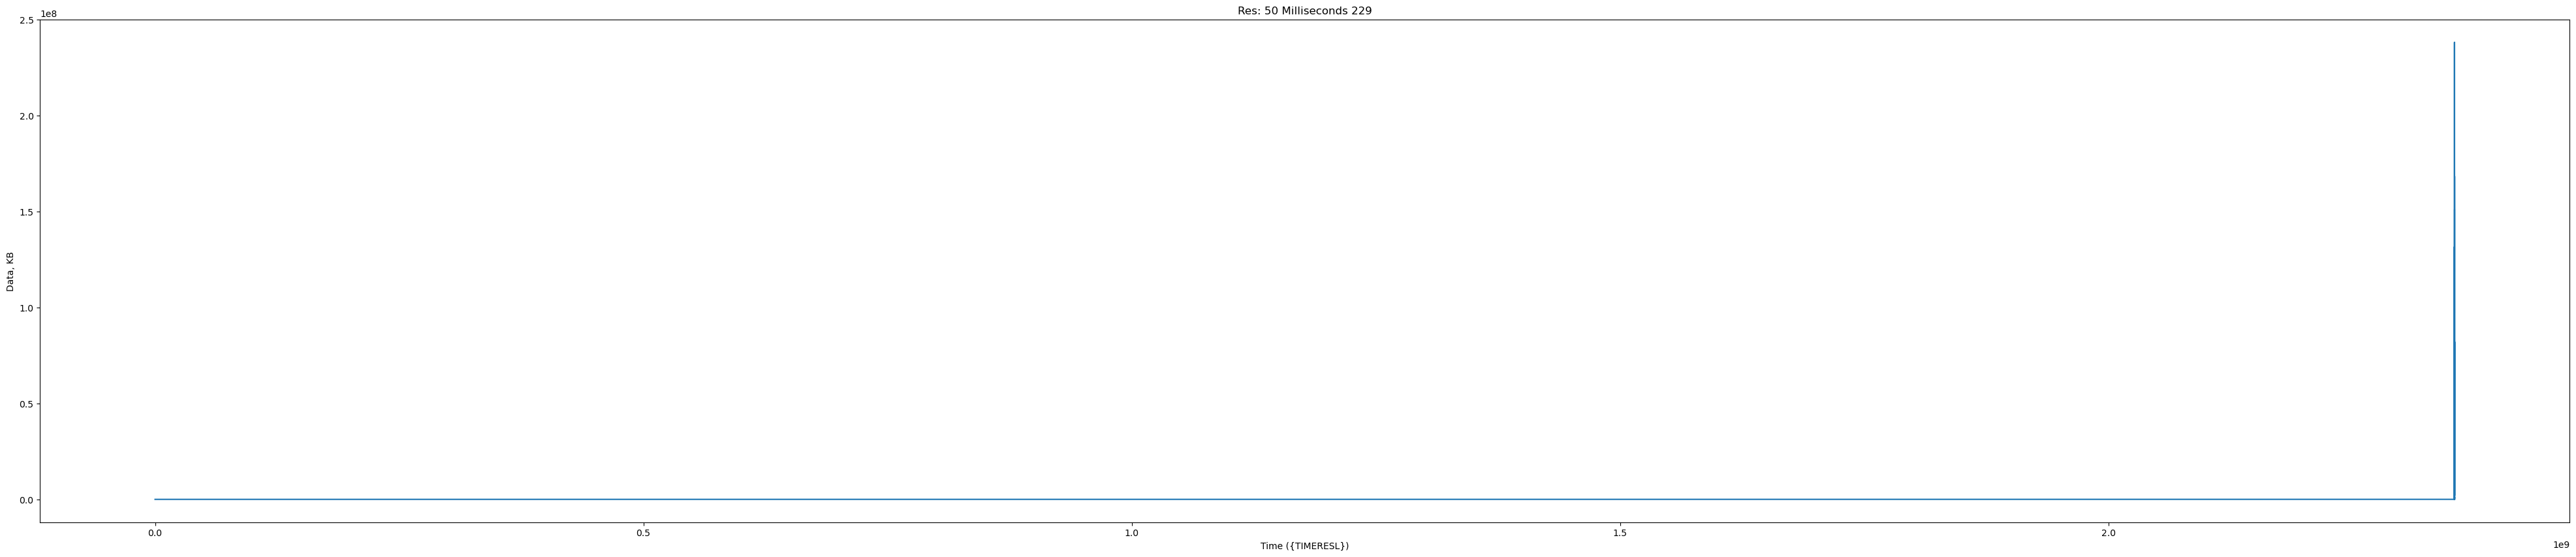

In [16]:
ts = allocs_df['timestamp'].values
vals = allocs_df['size'].values
y = []
x = []
start, end = ts[0], ts[0] + RES
while end < ts[-1]:
    in_ts = np.argwhere((start <= ts) & (ts <= end))
    if len(in_ts) > 1:
        new_s, new_end = in_ts[0][0], in_ts[-1][0]
        y.append(np.sum(vals[new_s:new_end]))
        x.append(start)
        ts = ts[in_ts[-1][0]:]
        vals = vals[in_ts[-1][0]:]
    else:
        x.append(start)
        y.append(0)
    start, end = start + RES, end + RES
plt.figure(figsize=(50, 10))
plt.title(f"Res: {RES} {TIMERES} {TARGET_IP}")
plt.xlabel("Time ({TIMERESL})")
plt.ylabel("Data, KB")
plt.plot(x, y)
plt.show()

In [22]:
reads_df = get_trace(READS, volumefactor=1, timefactor=MILLI_SECONDS)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
ts = reads_df['timestamp'].values
vals = reads_df['size'].values
y = []
x = []
start, end = ts[0], ts[0] + RES
while end < ts[-1]:
    in_ts = np.argwhere((start <= ts) & (ts <= end))
    if len(in_ts) > 1:
        new_s, new_end = in_ts[0][0], in_ts[-1][0]
        y.append(np.sum(vals[new_s:new_end]))
        x.append(start)
        ts = ts[in_ts[-1][0]:]
        vals = vals[in_ts[-1][0]:]
    else:
        x.append(start)
        y.append(0)
    start, end = start + RES, end + RES
plt.figure(figsize=(50, 10))
plt.title(f"Res: {RES} {TIMERES} {TARGET_IP}")
plt.xlabel("Time ({TIMERESL})")
plt.ylabel("Data, KB")
plt.plot(x, y)
plt.show()